# PREDIKSI HARGA LAPTOP DENGAN METODE SUPERVISED LEARNING REGRESSION

NAMA      : Fadhilah Aditya Akbar

NIM       : A11.2022.14130

KELOMPOK  : A11.4406

# DISCLAIMER

1. Dataset yang saya pakai usianya lebih dari 2 tahun, jadi untuk akurasinya datanya tidak bisa di bandingkan dengan harga sekarang,
   dikarenakan Laptop yang tersedia saat ini memiliki teknologi yang jauh lebih canggih dibandingkan dengan laptop di masa lalu. Misalnya
   peningkatan dalam prosesor, kapasitas penyimpanan, memori, dan fitur-fitur tambahan lainnya
2. Untuk RUN/Menjalankan prosesing dataset ini cukup menyita banyak waktu jadi saya sudah menyiapkan file export ke bentuk PDF & html

## Ringkasan Projek

Proyek ini bertujuan untuk mengembangkan model prediktif untuk memperkirakan harga laptop berdasarkan serangkaian fitur yang komprehensif seperti merek dan spesifikasi. Dengan memanfaatkan algoritma pembelajaran mesin, proyek ini berusaha mengungkap pola dan hubungan dalam dataset untuk menciptakan alat prediksi harga yang akurat. Melalui analisis data eksploratif, praproses, pemilihan fitur, dan pelatihan model, proyek ini menampilkan pendekatan sistematis untuk menyelesaikan masalah prediksi harga laptop, yang berkontribusi pada bidang pembelajaran mesin dan analisis data yang lebih luas.

### Permasalahan

Prediksi harga laptop, terutama ketika laptop datang langsung dari pabrik ke Pasar Elektronik/Toko, adalah tugas yang kritis dan penting. Kepanikan besar yang kita lihat pada tahun 2020 untuk mendukung pekerjaan dan pembelajaran jarak jauh tidak lagi ada. Di India, permintaan laptop melonjak setelah lockdown nasional, yang mengarah pada pengiriman 4,1 juta unit pada kuartal Juni 2021, tertinggi dalam lima tahun. Prediksi harga laptop yang akurat melibatkan pengetahuan ahli, karena harga biasanya tergantung pada banyak fitur dan faktor yang berbeda. Biasanya, yang paling signifikan adalah merek dan model, RAM, ROM, GPU, CPU, dan lain-lain. Dalam makalah ini, kami menerapkan berbagai metode dan teknik untuk mencapai presisi yang lebih tinggi dalam prediksi harga laptop bekas yang digunakan.

### Tujuan & Model Alur Penyelesaian

Untuk mendukung penerapan pembelajaran mesin menggunakan algoritma Decision Tree, tentu saja data sampel diperlukan. Dataset yang saya gunakan ini berisi data tentang berbagai laptop dan harga mereka berdasarkan konfigurasi. Data sampel diperoleh dari Kaggle.com.

Algoritma ini digunakan sebagai Decision Tree Classifier yang dapat digunakan untuk menghasilkan keputusan berdasarkan dataset sampel, dimulai dengan proses memilih atribut dengan gain tertinggi sebagai akar pohon, kemudian membuat cabang untuk setiap nilai, kemudian membagi kasus ke dalam cabang-cabang tersebut, lalu mengulangi proses untuk setiap cabang hingga semua kasus dalam cabang memiliki kelas yang sama.

Langkah-langkah 
1. Pengumpulan Data:
Data sampel dikumpulkan dari Kaggle.com, yang berisi informasi mengenai berbagai laptop beserta harga mereka. Data ini mencakup berbagai fitur seperti merek, model, RAM, ROM (HDD/SSD), GPU, CPU, layar IPS, dan layar sentuh.

2. Praproses Data:
Data yang diperoleh kemudian dibersihkan dan dipersiapkan untuk analisis lebih lanjut. Proses ini mencakup penanganan nilai yang hilang, pengkodean variabel kategorikal, dan normalisasi fitur numerik.

3. Pemilihan Fitur:
Fitur-fitur yang paling relevan dipilih untuk digunakan dalam model prediksi. Pemilihan ini didasarkan pada analisis gain informasi untuk memastikan bahwa hanya fitur yang memberikan kontribusi signifikan terhadap prediksi harga yang disertakan.

4. Pembentukan Model:
Algoritma Decision Tree diterapkan pada dataset yang sudah diproses. Algoritma C4.5 digunakan untuk membentuk pohon keputusan dengan memilih atribut dengan gain tertinggi sebagai akar dan membuat cabang untuk setiap nilai atribut tersebut.

5. Pelatihan Model:
Model Decision Tree dilatih menggunakan data sampel untuk memprediksi harga laptop. Proses ini melibatkan pembagian dataset menjadi data pelatihan dan data pengujian untuk mengevaluasi kinerja model.

6. Evaluasi Model:
Model yang telah dilatih kemudian dievaluasi menggunakan data pengujian untuk mengukur presisi dan akurasi prediksi harga. Indikator seperti mean squared error (MSE) dan koefisien determinasi (R²) digunakan untuk menilai kinerja model.

7. Penyempurnaan Model:
Berdasarkan hasil evaluasi, model dapat disempurnakan dengan mengoptimalkan parameter dan mencoba pendekatan lain jika diperlukan untuk meningkatkan presisi dan akurasi prediksi.

Dengan mengikuti metodologi ini, proyek ini bertujuan untuk mengembangkan model prediksi harga laptop yang akurat dan efisien menggunakan algoritma Decision Tree.
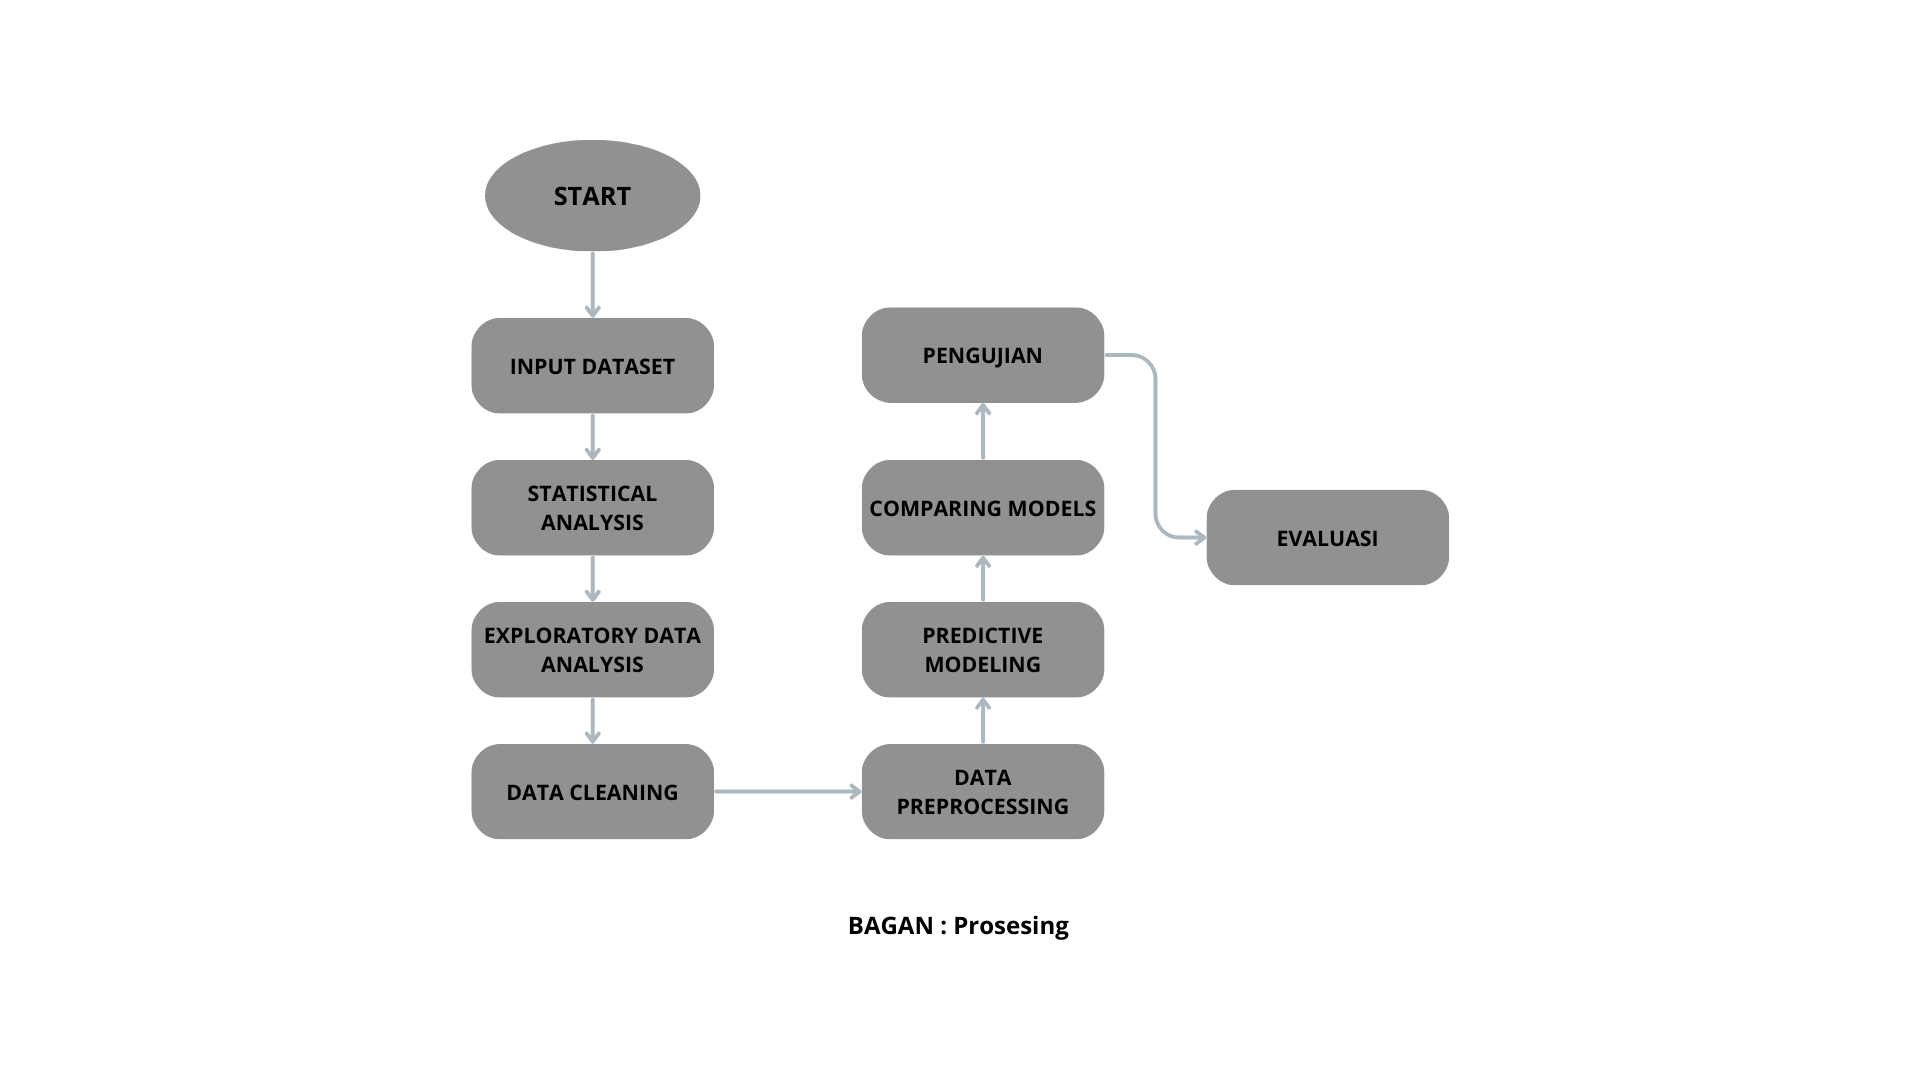
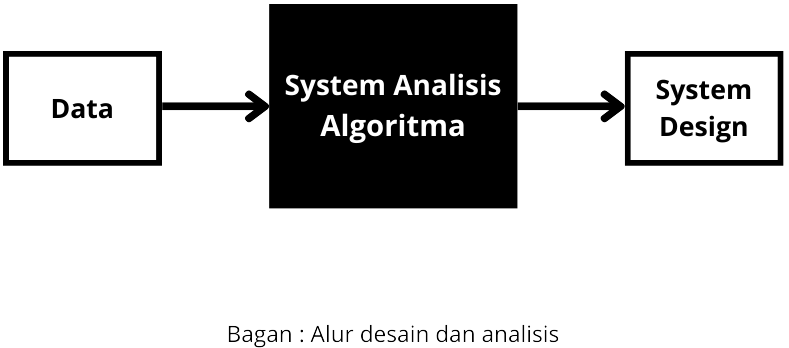

## IMPORTING LIBRARIES 

In [1]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRFRegressor
warnings.filterwarnings ( 'ignore' )
from sklearn.pipeline import Pipeline
pd.set_option ( "display.max_columns" , None )
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer, StandardScaler , OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error 

1. warnings
   Digunakan untuk memanipulasi peringatan yang dihasilkan oleh kode Python. Pada kode ini, warnings.filterwarnings('ignore') digunakan untuk
   mengabaikan semua peringatan.

2. %matplotlib inline
   Ini adalah magic function IPython yang memungkinkan plot Matplotlib ditampilkan langsung di notebook Jupyter.

3. numpy (np)
   Digunakan untuk operasi matematika dan perhitungan numerik pada array dan matriks.

4. pandas (pd)
   Digunakan untuk manipulasi data dan analisis data yang mudah, termasuk pembacaan dan penulisan data dalam berbagai format (CSV, Excel, SQL, dll).

5. seaborn (sns)
   Digunakan untuk visualisasi data statistik. Seaborn menyediakan antarmuka tingkat tinggi untuk membuat grafik yang menarik dan informatif.

6. matplotlib.pyplot (plt)
   Digunakan untuk membuat grafik dan visualisasi data. Ini adalah dasar dari banyak pustaka visualisasi data lainnya di Python.

7. xgboost.XGBRFRegressor

8. Model regresi yang menggunakan gradient boosting dan random forest dari pustaka XGBoost, yang sering digunakan untuk membangun model prediktif yang
   kuat.

9. sklearn.pipeline.Pipeline
   Digunakan untuk membuat alur kerja (pipeline) yang menyatukan beberapa langkah pemrosesan data dan model machine learning menjadi satu unit yang
   mudah digunakan.

10. sklearn.compose.ColumnTransformer
    Digunakan untuk menerapkan transformasi yang berbeda pada kolom yang berbeda dalam data secara efisien.

11. sklearn.preprocessing.QuantileTransformer
    Digunakan untuk mengubah fitur menjadi distribusi yang seragam atau normal.

12. sklearn.linear_model.LinearRegression, Lasso, Ridge
    Model regresi linear dasar, Lasso (Least Absolute Shrinkage and Selection Operator), dan Ridge Regression yang digunakan untuk regresi linier
    dengan regularisasi.

13. sklearn.model_selection.GridSearchCV, train_test_split
    GridSearchCV digunakan untuk melakukan pencarian hyperparameter yang optimal. train_test_split digunakan untuk membagi data menjadi set pelatihan
    dan pengujian.

14. sklearn.tree.DecisionTreeRegressor, ExtraTreeRegressor
    Model regresi berbasis pohon keputusan dan varian ekstranya.

15. sklearn.ensemble.AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
    Model regresi ensemble yang menggunakan metode boosting (AdaBoost, Gradient Boosting) dan Random Forest.

16. sklearn.preprocessing.LabelEncoder, MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder
    Alat untuk pra-pemrosesan data termasuk encoding label, skala data, normalisasi, standardisasi, dan encoding satu-hot.

17. sklearn.metrics.r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
    Metode evaluasi model regresi untuk mengukur kinerja model menggunakan berbagai metrik seperti R² score, mean absolute percentage error (MAPE),
    mean absolute error (MAE), dan mean squared error (MSE).

## IMPORTING DATA 

In [2]:
DF = pd.read_csv ( "LAPTOP_DATA.csv" )

DF

Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 12 columns]

## STATISTICAL ANALYSIS

### STATISTICAL SUMMARY

In [3]:
DF_Stats_Numeric = DF.describe ( )
DF_Stats_Numeric

Unnamed: 0       Inches          Price
count  1303.00000  1303.000000    1303.000000
mean    651.00000    15.017191   59870.042910
std     376.28801     1.426304   37243.201786
min       0.00000    10.100000    9270.720000
25%     325.50000    14.000000   31914.720000
50%     651.00000    15.600000   52054.560000
75%     976.50000    15.600000   79274.246400
max    1302.00000    18.400000  324954.720000

In [4]:
DF_Stats_Non_Numeric = DF.describe ( exclude = np.number )
DF_Stats_Non_Numeric

Company  TypeName   ScreenResolution                         Cpu   Ram  \
count     1303      1303               1303                        1303  1303   
unique      19         6                 40                         118     9   
top       Dell  Notebook  Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
freq       297       727                507                         190   619   

           Memory                    Gpu       OpSys Weight  
count        1303                   1303        1303   1303  
unique         39                    110           9    179  
top     256GB SSD  Intel HD Graphics 620  Windows 10  2.2kg  
freq          412                    281        1072    121

In [5]:
DF.info ( ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### DROPPING THE UNIQUE COLUMN

In [6]:
DF.drop ( columns = [ 'Unnamed: 0' ] , inplace = True )
DF

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 11 columns]

## (EDA)EXPLORATORY DATA ANALYSIS

### EXTRACTING COLUMNS 

Dari Kolom Resolusi Layar:

1. HD, 4K dan HD+

2. Panel IPS

       * IPS adalah singkatan dari "In-Plane Switching," yang merujuk pada jenis teknologi yang digunakan pada layar perangkat seperti laptop, monitor, dan smartphone.

       * Panel IPS pada ponsel meningkatkan sudut pandang dan akurasi warna dengan mengatur piksel untuk mengurangi distorsi saat dilihat dari sisi yang berbeda.

       * Meskipun panel IPS (In-Plane Switching) umum digunakan dan menawarkan kelebihan seperti reproduksi warna yang lebih baik dan sudut pandang yang lebih luas, teknologi layar lainnya seperti OLED dan AMOLED juga digunakan di banyak smartphone.

Dari Kolom CPU:
* Intel, Samsung, dan AMD
  
Dari Memori:

SSD, HDD, Hybrid, Flash Storage
* Dari GPU:

Intel, AMD, Nvidia
* Dari Piksel dan Inci:

Kita dapat menghitung Piksel Per Inci (Pixels Per Inch)


In [7]:
DF [ 'TouchScreen' ] = DF.ScreenResolution.apply ( lambda x : 1 if 'Touchscreen' in x else 0 )
DF [ 'HD_4K' ] = DF.ScreenResolution.apply ( lambda x : 1 if '4K' in x or 'HD' in x or 'HD+' in x else 0 )
DF [ 'CPU_Types' ] = DF.Cpu.apply ( lambda x : 'Samsung' if 'Samsung' in x else ( 'Intel' if 'Intel' in x else ( 'AMD' if 'AMD' in x else 'Intel' ) ) )
DF [ 'Memory_Types' ] = DF.Memory.apply ( lambda x : 'Flash Storage' if 'Flash Storage' in x else ( 'HDD' if 'HDD' in x else ( 'SSD' ) ) )
DF [ 'GPU_Types' ] = DF.Gpu.apply ( lambda x : 'AMD' if 'AMD' in x else ( 'Nvidia' if 'Nvidia' in x else ( 'Intel' ) ) )
DF [ 'CPU_Frequency' ] = DF.Cpu.str.extract (  r'(\d+GHz)' , expand = True )[0].str.replace ( 'GHz' , '' ).astype ( 'int64' )

In [8]:
DF_Original = DF
DF = DF_Original.iloc [ : , [ 0 , 1 , 2 , 5 , 8 , 9 , 10 , 11 , 12 , 13 , 14] ]
Pixels = DF_Original.ScreenResolution.str.extract ( r'(\d+x\d+)', expand = True  )[0].str.replace ( 'x' , ' ' ).tolist()
Pixels = list( map( lambda x : [ int ( x [ 0 ] ), int( x [ 1 ] ) ], [ i.split ( ) for i in Pixels ] ) )
DF [ 'Length' ] = [ x [ 0 ] for x in Pixels ]
DF [ 'Width' ] = [ x [ 1 ] for x in Pixels ]
DF [ 'PPI' ] = np.sqrt ( DF.Length ** 2 + DF.Width ** 2 ) / DF.Inches

### DATA VISUALIZATION

#### BASIC LINE PLOTS

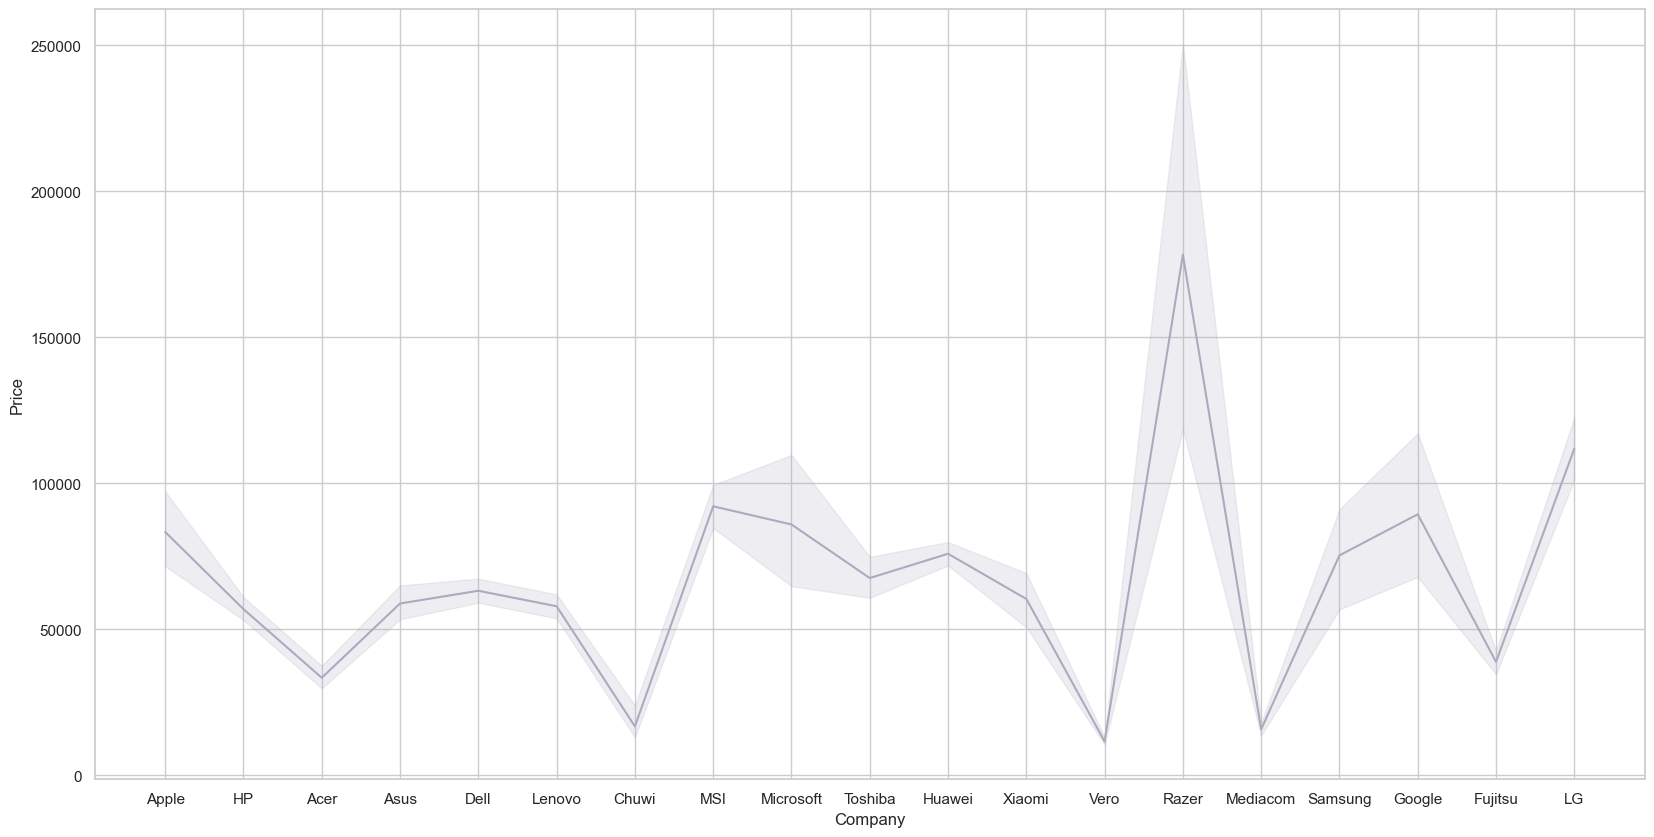

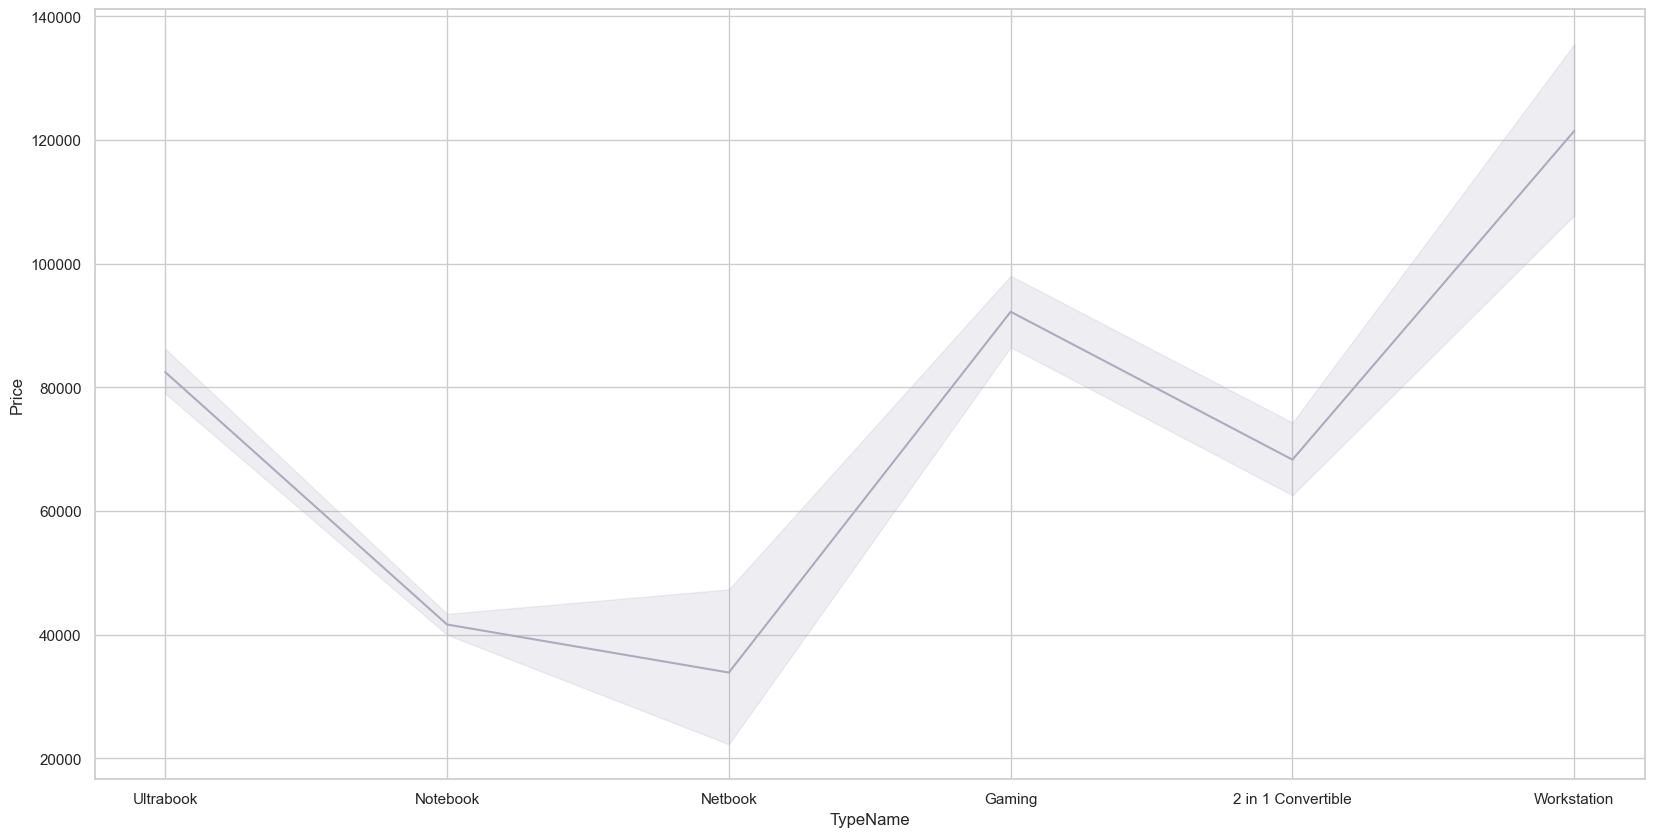

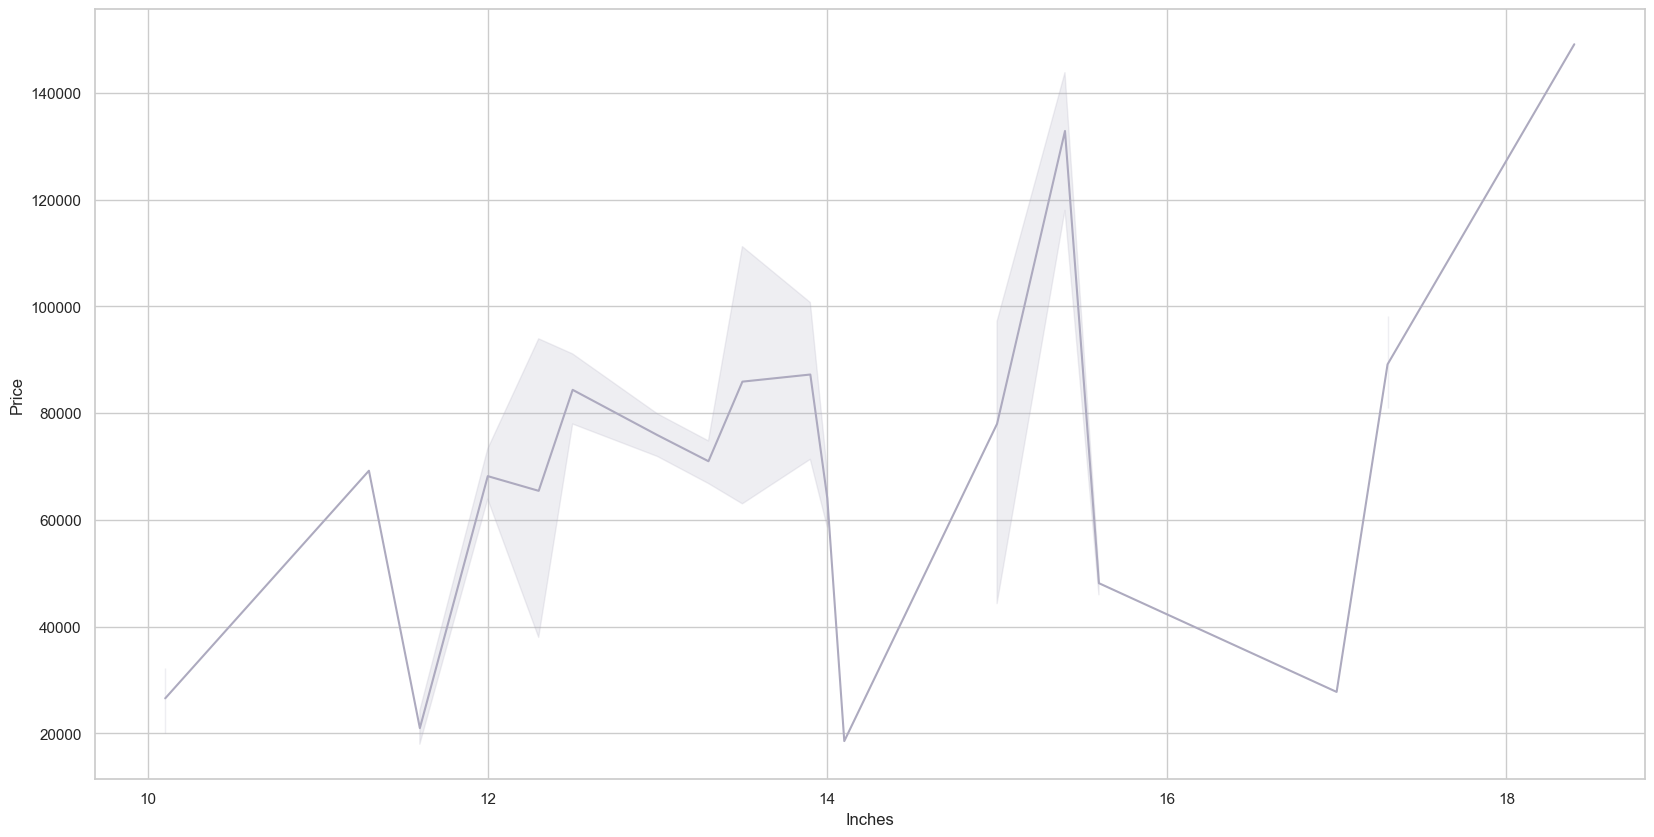

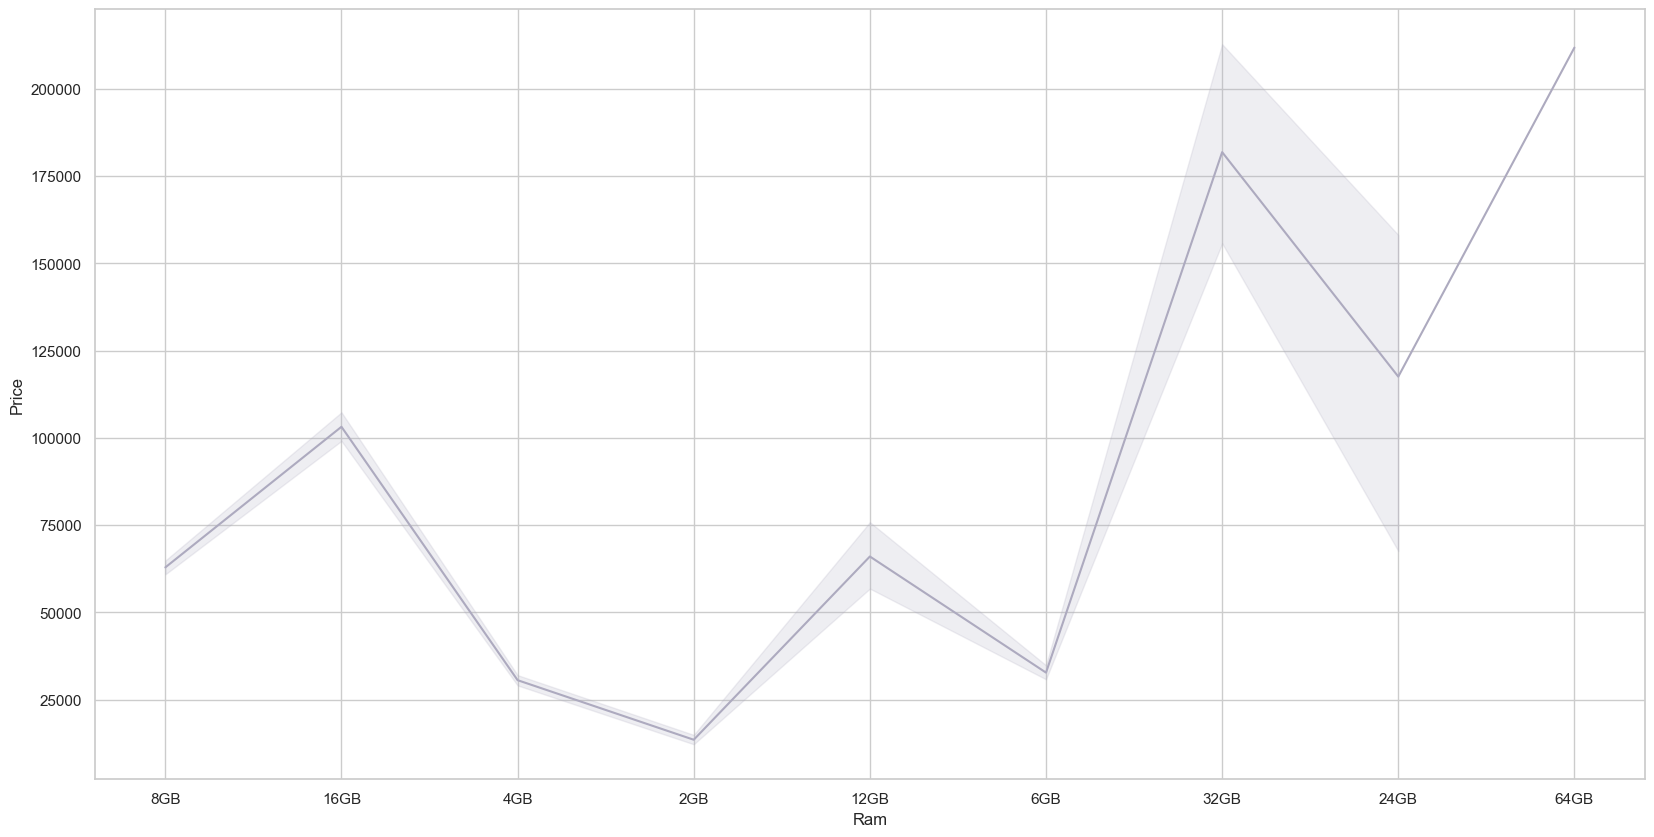

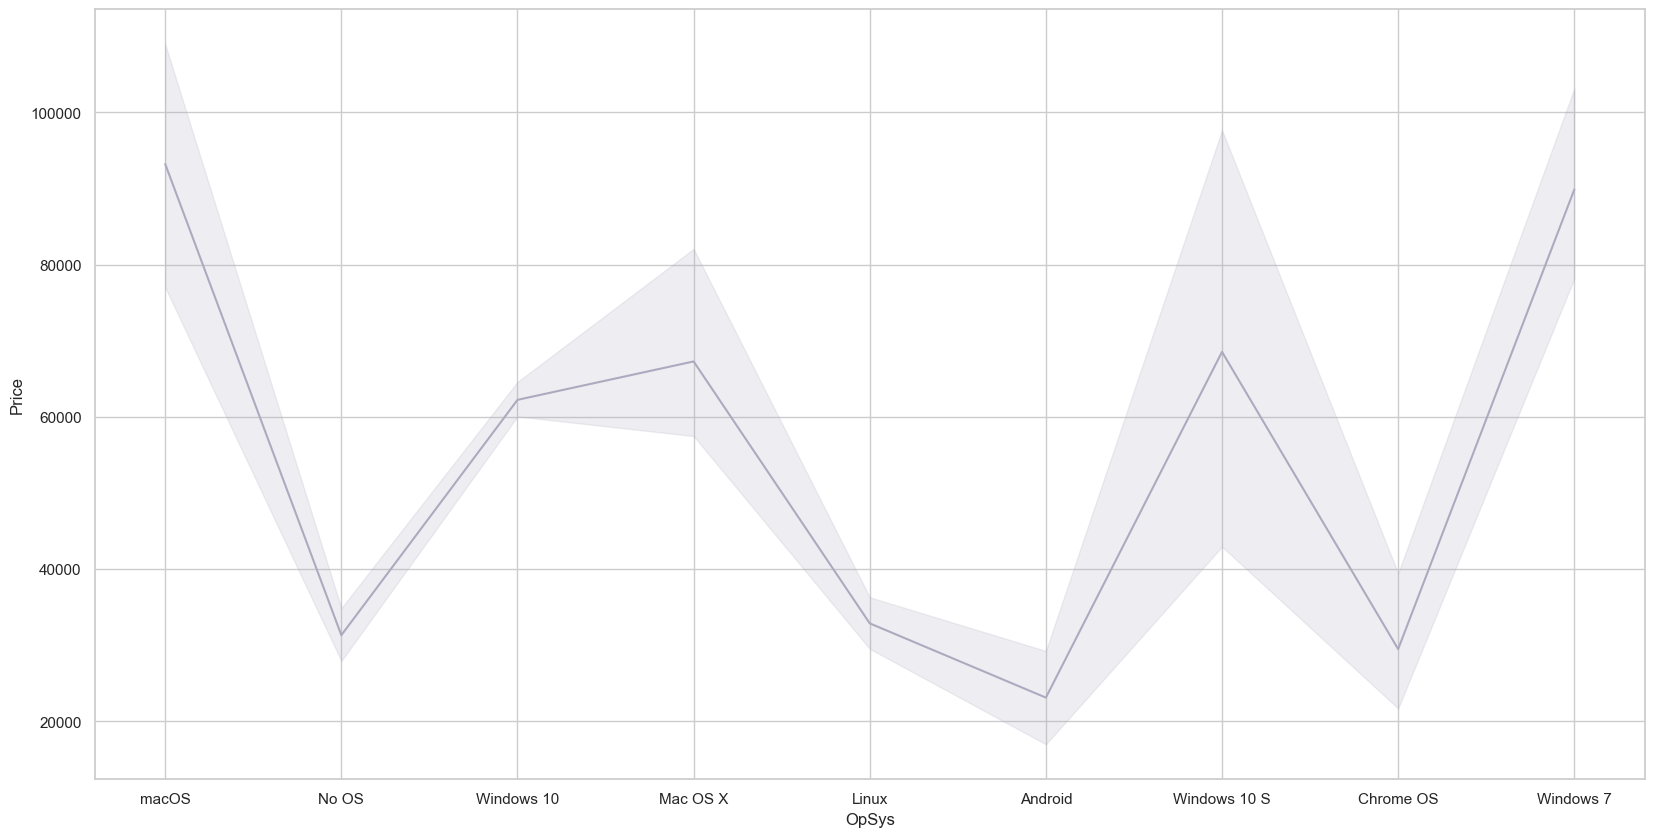

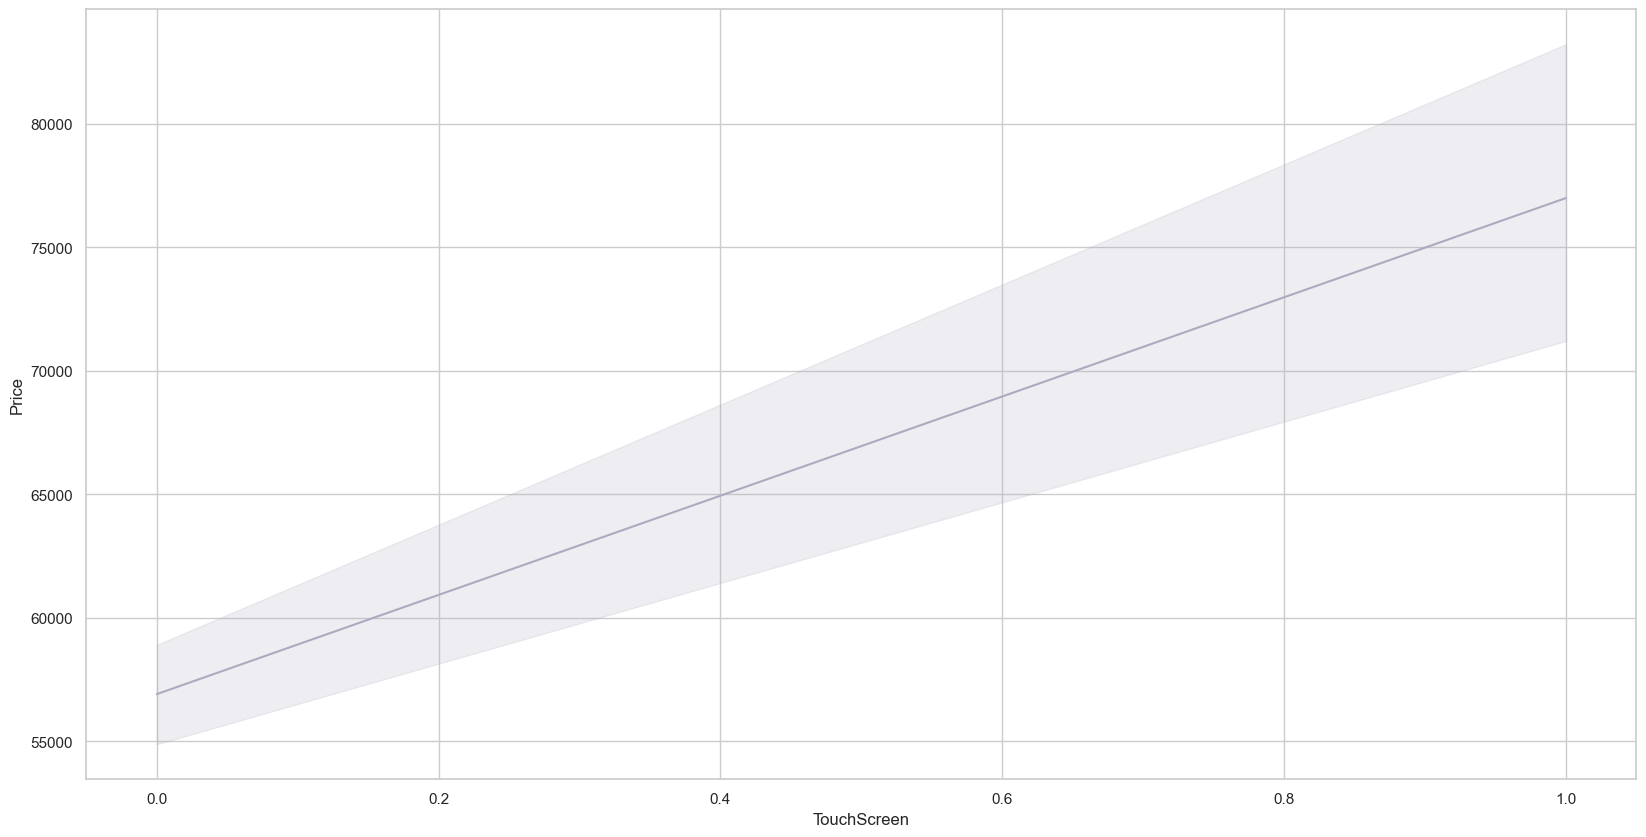

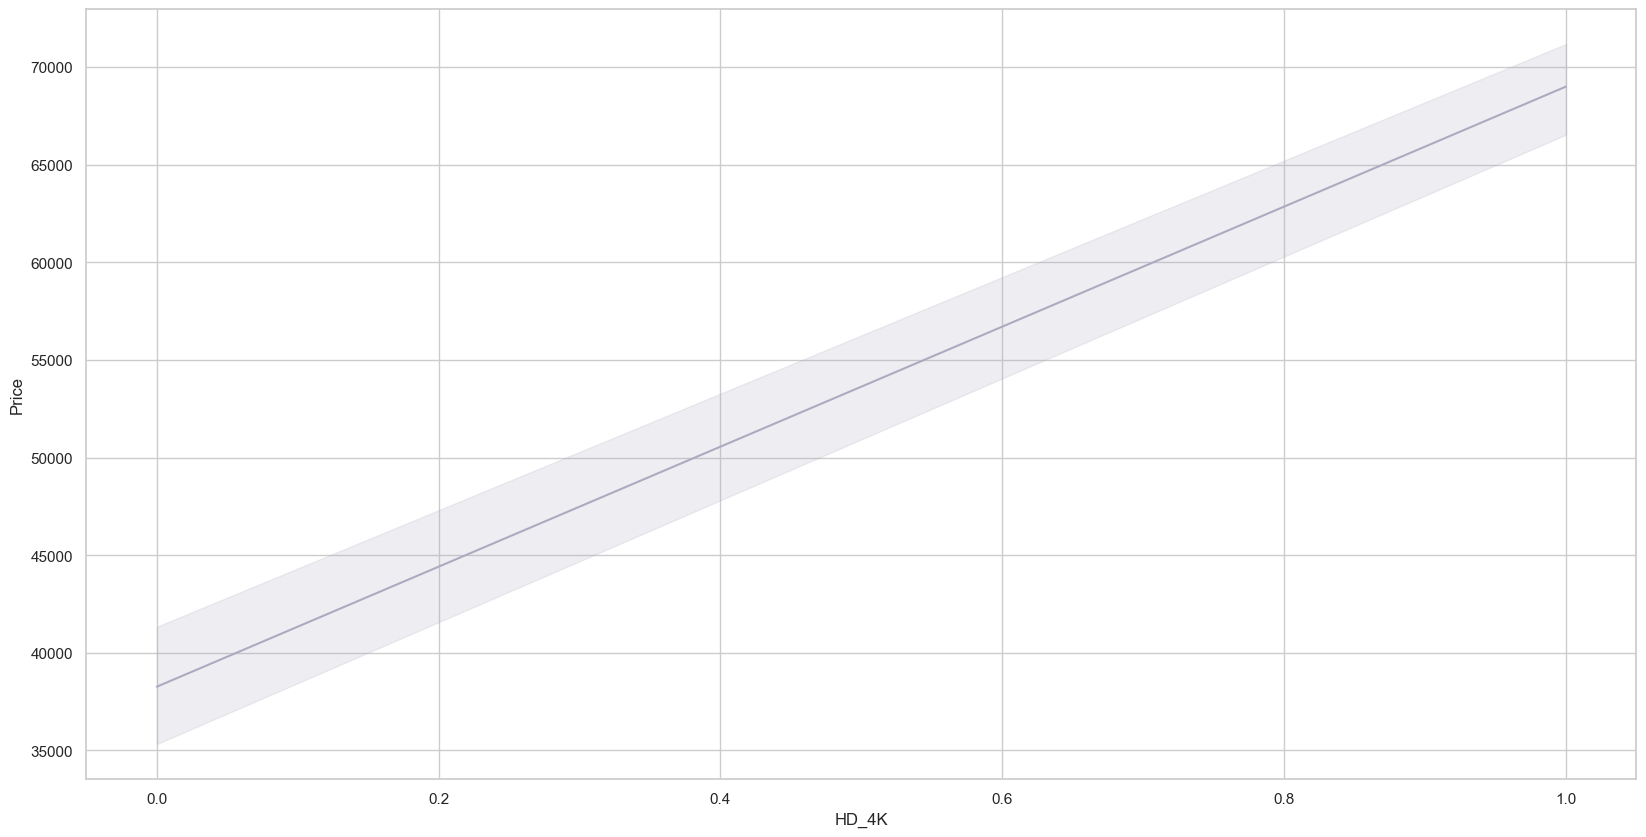

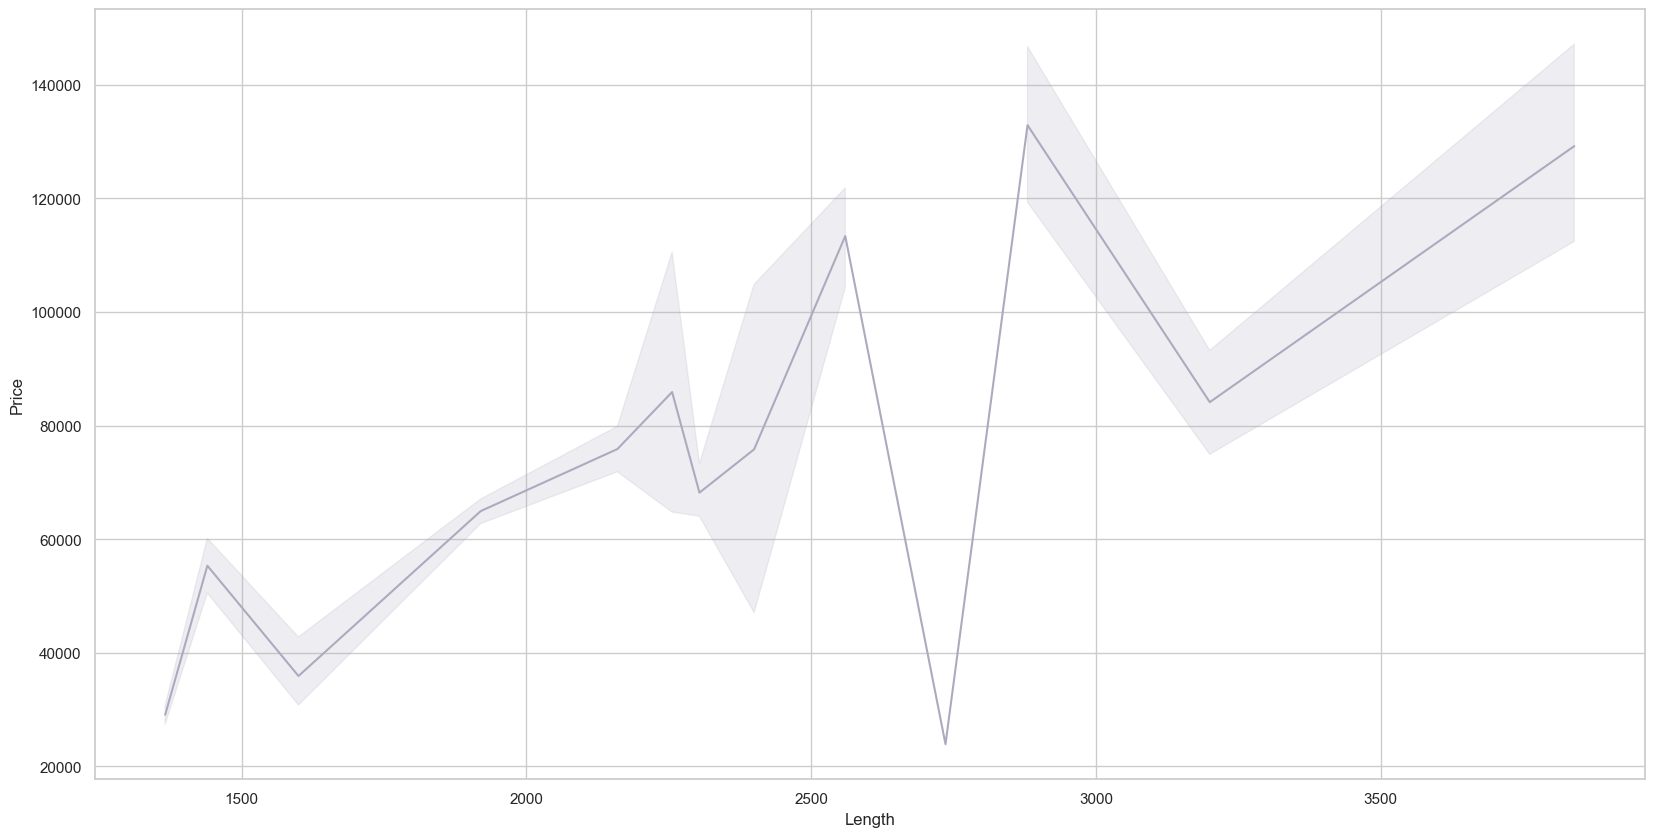

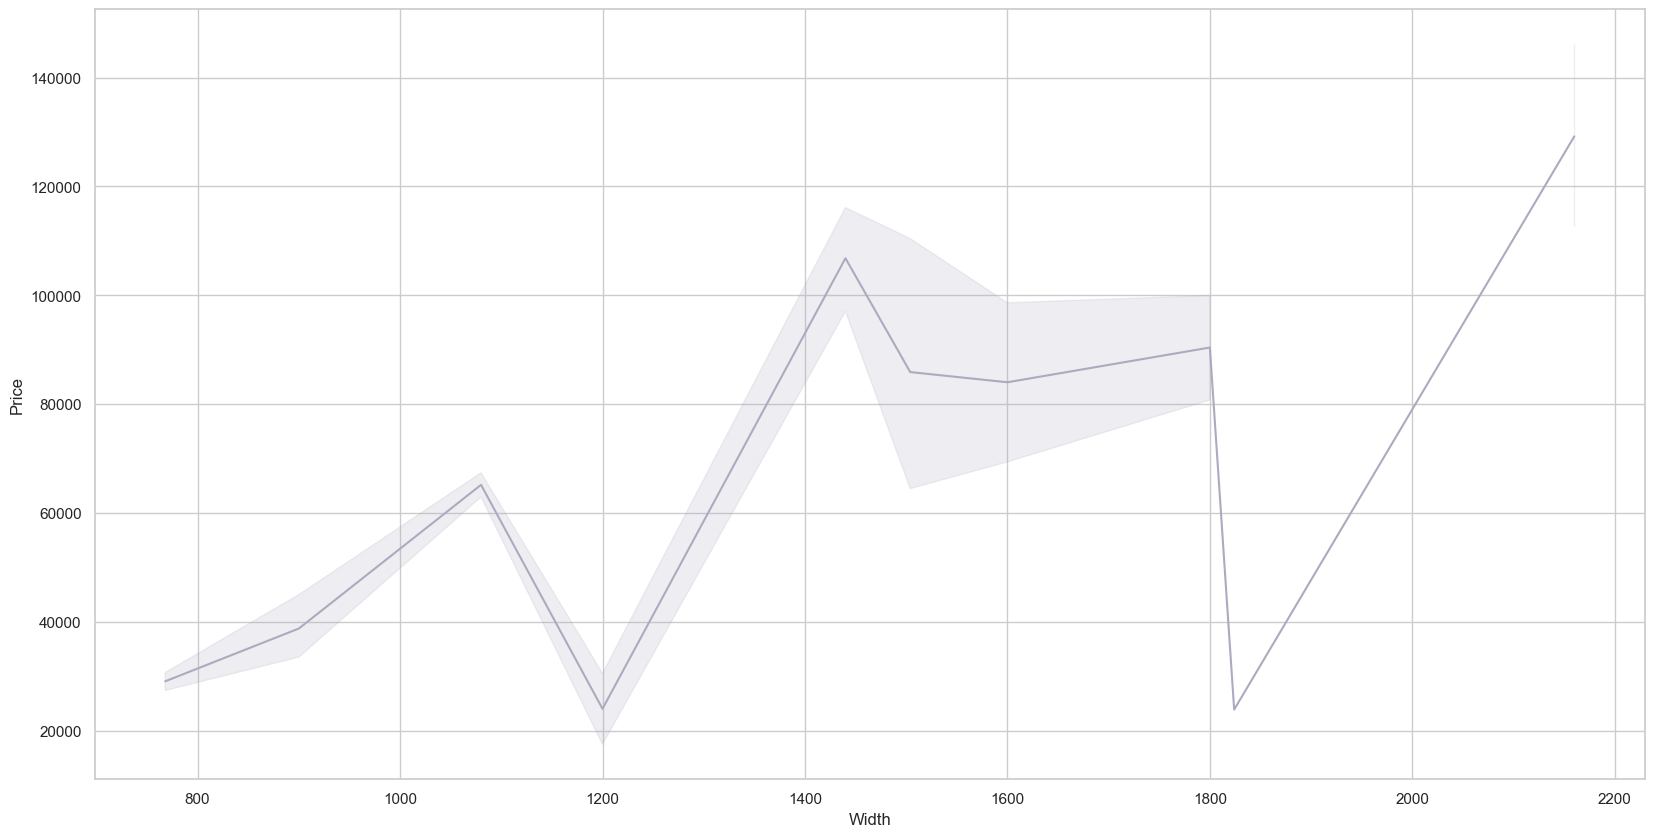

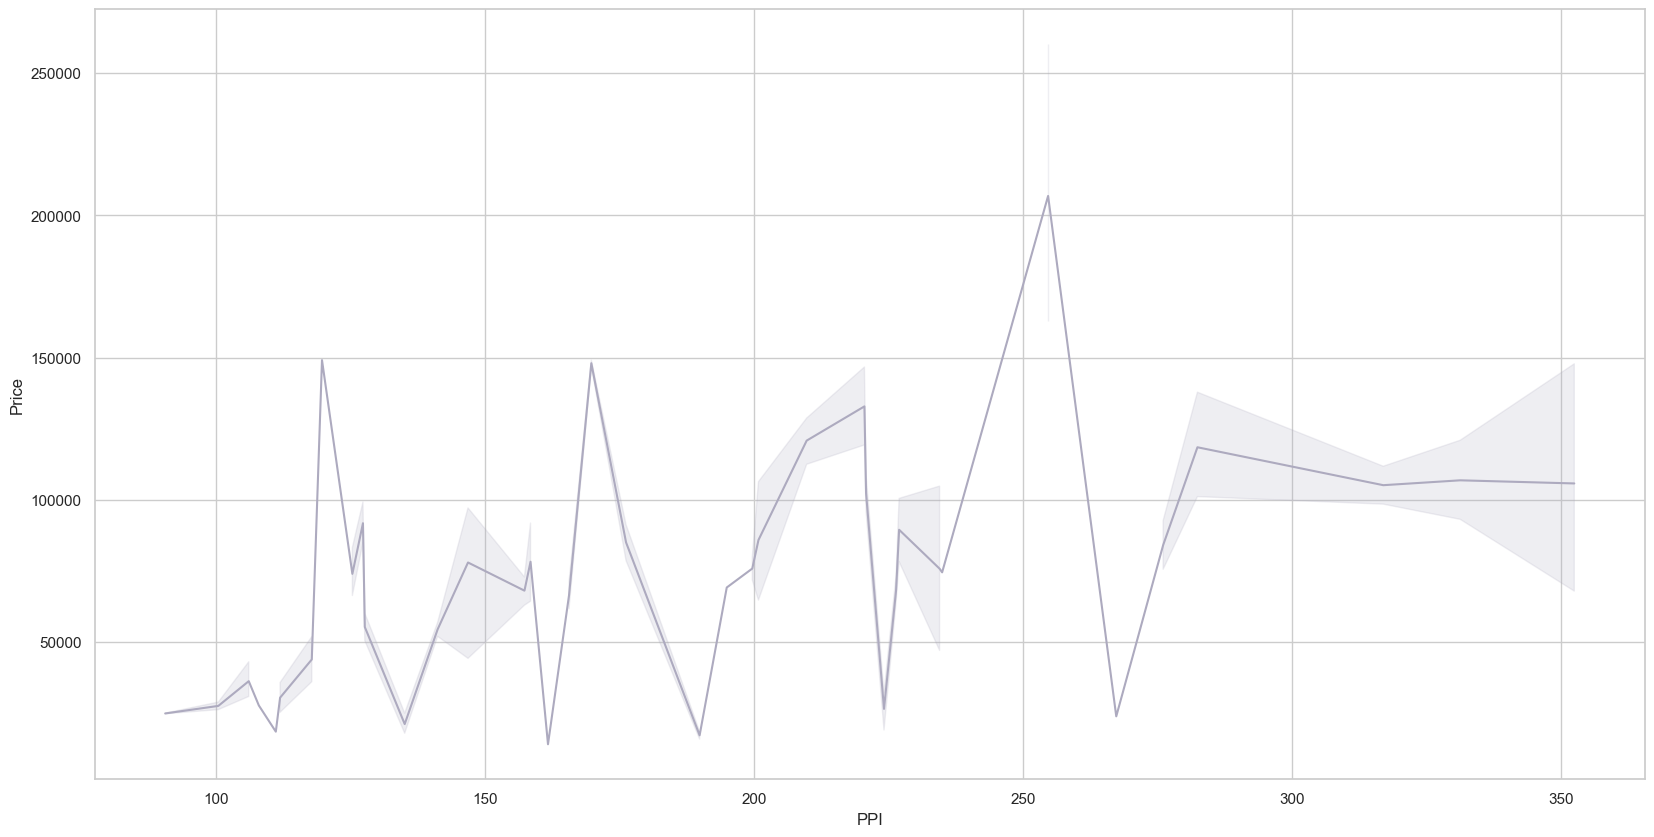

In [9]:
sns.set ( style = "whitegrid" )
for i in DF.drop ( columns = [ 'Price' , 'Weight' , 'CPU_Types' , 'Memory_Types' ]  ) :
    plt.figure ( figsize = ( 20 , 10 ) )
    sns.lineplot ( x = DF [ i ].sort_values ( ) , y = DF.Price , color = '#ADAABF' , markers = '*'  )
    plt.show()

dari analisis diatas kita dapat ambil kesimpulan bahwa terdapat alasan yang berkontribusi pada biaya tinggi yaitu karena:

1. Komponen Kinerja Tinggi

    * Ketiga laptop dilengkapi dengan komponen yang kuat dan berkinerja tinggi.

    * Mereka memiliki prosesor canggih, jumlah RAM yang besar (32 GB), dan kartu grafis kelas atas.

    * Spesifikasi kinerja tinggi ini berkontribusi signifikan terhadap biaya keseluruhan laptop.

2. Ukuran dan Resolusi Layar Besar

    * Laptop-laptop tersebut memiliki ukuran layar yang lebih besar dan menawarkan layar beresolusi tinggi, termasuk teknologi panel 4K dan IPS.

    * Layar yang lebih besar dan beresolusi lebih tinggi seringkali mengakibatkan biaya produksi yang lebih tinggi.

3. Penggunaan Khusus

    * Laptop Razer adalah laptop gaming, laptop Lenovo adalah workstation dengan grafis Nvidia Quadro.

    * Laptop khusus sering dilengkapi dengan komponen premium yang disesuaikan untuk tugas-tugas tersebut, yang mengarah pada biaya yang lebih tinggi.

4. Penyimpanan yang Memadai

    * laptop dilengkapi dengan kapasitas penyimpanan yang besar (512 GB SSD, 1 TB SSD, 256 GB SSD).

    * Drive penyimpanan yang lebih besar dan lebih cepat dapat meningkatkan biaya laptop.

5. Desain dan Kualitas Bangun Premium

    * Laptop mahal sering kali mengutamakan bahan premium, kualitas bangunan, dan estetika desain.

    * Faktor-faktor ini berkontribusi pada biaya produksi yang lebih tinggi dan, akibatnya, harga jual yang lebih tinggi.

6. Reputasi Merek

    * Merek seperti Razer, Lenovo, dan HP sudah mapan dan memiliki reputasi kuat di industri laptop.

    * Merek premium dapat menetapkan harga lebih tinggi karena kepercayaan pelanggan, kualitas yang dirasakan, dan pengenalan merek.

7. Fitur Canggih

    * Laptop-laptop ini menawarkan fitur-fitur canggih seperti grafis Nvidia, prosesor Intel Xeon, resolusi tinggi dan 4K, serta kemajuan teknologi lainnya.

8. Segmen Pasar Terbatas

    * Laptop-laptop ini melayani pasar tertentu seperti gaming, pekerjaan profesional, dan tugas berat.
    * Target audiens yang terbatas memungkinkan produsen untuk menetapkan harga laptop ini dengan harga premium.

#### OPERATING SYSTEM AND  SIZE DISTRIBUTION

<Axes: xlabel='OpSys', ylabel='Inches'>

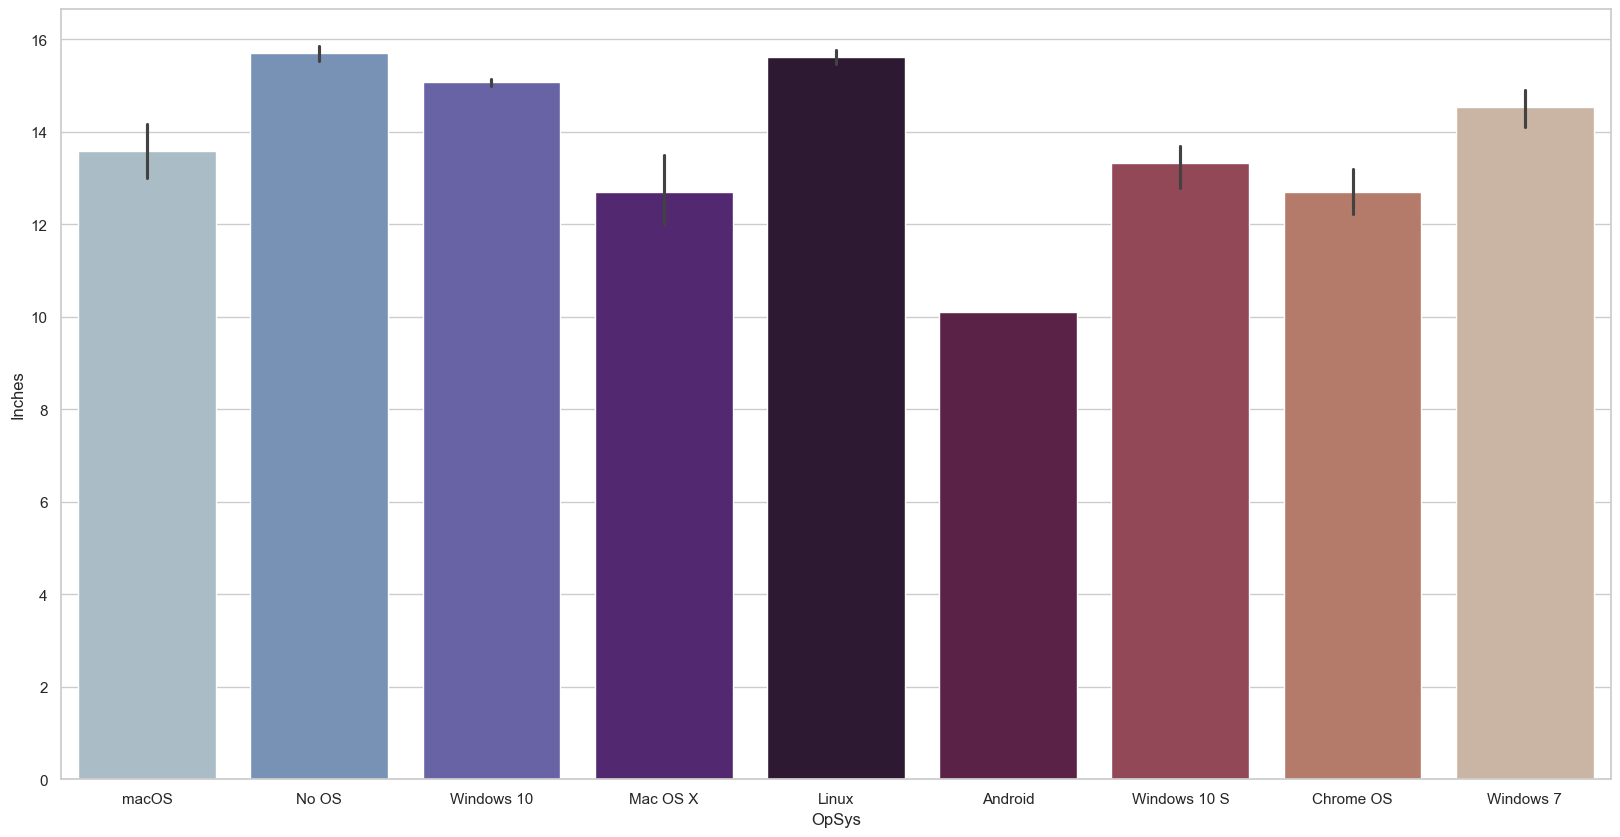

In [10]:
sns.set ( style = "whitegrid" )

plt.figure ( figsize = ( 20 , 10 ) )

sns.barplot ( y = DF.Inches , x = DF[ 'OpSys' ] , palette = 'twilight' )

Dengan menggunakan dataset yang telah direkayasa fitur, kita sekarang dapat memplot grafik dan menghitung tabel untuk memvisualisasikan bagaimana setiap fitur berkaitan dengan variabilitas harga laptop. Dengan menggunakan metode barplot yang diimpor dari Matplotlib, kita dapat menguji dan memverifikasi hipotesis atau pendapat awal kita tentang bagaimana beberapa fitur akan memengaruhi penetapan harga laptop. Berikut adalah ilustrasi pemetaan barplot untuk fitur TypeName (jenis laptop):

1. Laptop terbesar memiliki sistem operasi berikut:
* Windows 10
* Linux
* Mac OS
  Berikut beberapa alasan di balik sistem operasi dan ukurannya:

    - Korelasi antara ukuran laptop dan sistem operasi dapat dikaitkan dengan beberapa faktor yang sesuai dengan preferensi pengguna, skenario penggunaan, dan tren pasar.

    - Laptop yang lebih besar sering dikaitkan dengan kemampuan kinerja yang lebih tinggi, menjadikannya cocok untuk tugas-tugas yang membutuhkan banyak sumber daya seperti pengembangan perangkat lunak, desain grafis, dan pengeditan video.

    - Sistem operasi seperti Windows 10, Linux, dan Mac OS lebih disukai karena kemampuan multitasking yang kuat, memungkinkan pengguna menjalankan beberapa aplikasi secara bersamaan.

    - Linux sangat dapat disesuaikan, membuatnya populer di kalangan pengguna yang paham teknologi yang ingin menyesuaikan sistem operasi mereka dengan kebutuhan khusus. Laptop yang lebih besar menawarkan lebih banyak ruang untuk konfigurasi dan kustomisasi yang lebih canggih.

2. Laptop terkecil memiliki sistem operasi berikut:
* Android
* Mac OS X
* Chrome OS
  Laptop yang lebih kecil, sering kali ultrabook atau perangkat kompak, mengutamakan portabilitas dan kenyamanan.

    - Laptop-laptop ini dirancang untuk pengguna yang membutuhkan komputasi saat bepergian, seperti pelajar, pelancong, dan individu yang menghadiri pertemuan.

    - Android digunakan pada perangkat konvertibel dan tablet, meningkatkan interaksi berbasis sentuhan dan integrasi aplikasi seluler.

    - Pengguna yang menghargai transisi yang mulus antara perangkat seluler dan laptop mereka mungkin memilih Android.

    - Chrome OS dioptimalkan untuk komputasi berbasis cloud, di mana pengguna mengandalkan aplikasi web dan penyimpanan online.

    - Laptop yang lebih kecil, terutama yang menjalankan Chrome OS, sering kali melayani konsumen yang hemat anggaran yang memprioritaskan keterjangkauan dan tugas-tugas komputasi dasar.

#### PRICE DISTRIBUTION

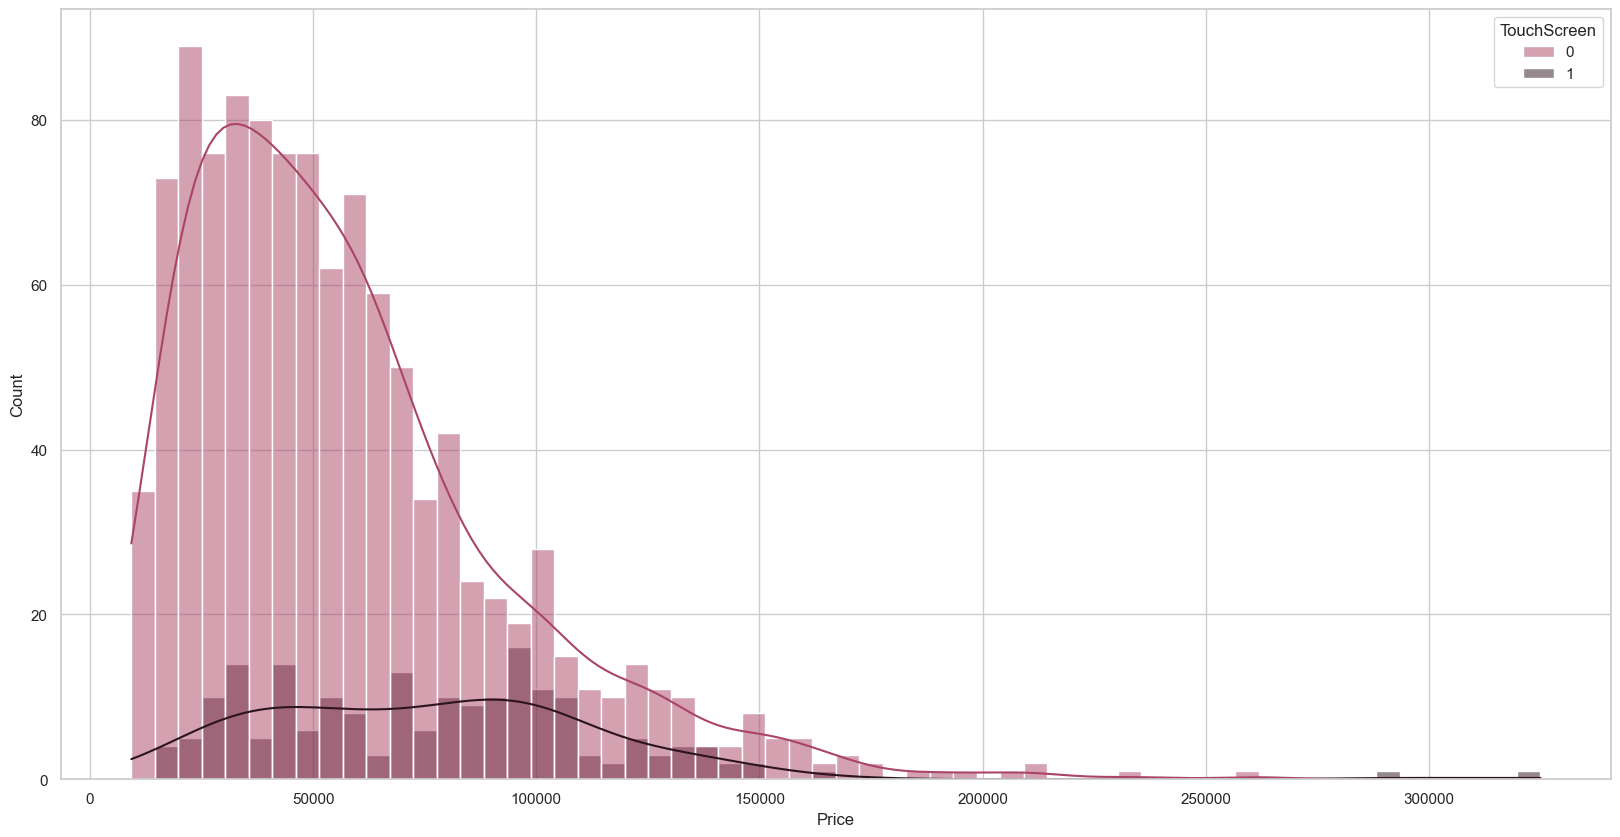

In [11]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( data = DF_Original , x = DF_Original.Price , kde = True , hue = 'TouchScreen' , palette = [ '#AA4465', '#2C1320' ] , bins = 60 );

* Puncak distribusi sekitar 50.000 menunjukkan bahwa proporsi signifikan dari laptop memiliki harga yang terkonsentrasi di sekitar nilai ini.
* Penurunan bertahap dari distribusi menuju harga yang lebih tinggi mengimplikasikan bahwa ketika harga laptop meningkat di atas puncak ini, frekuensi laptop dengan harga lebih tinggi tersebut menurun.
* Mayoritas laptop berada dalam kisaran harga yang terjangkau (sekitar 50.000), sementara lebih sedikit laptop yang termasuk dalam segmen premium atau harga yang lebih tinggi.
* Fitur layar sentuh memiliki harga yang sedikit lebih tinggi dibandingkan laptop tanpa layar sentuh.
* Namun, seiring dengan peningkatan harga dan penurunan jumlah laptop dalam kumpulan data, tren serupa terlihat dalam ketersediaan fitur layar sentuh.
* Pola distribusi ini bisa jadi disebabkan oleh produsen yang menargetkan basis konsumen yang lebih luas untuk laptop dengan layar sentuh dengan membuatnya lebih terjangkau.

#### RAM DISTRIBUTION

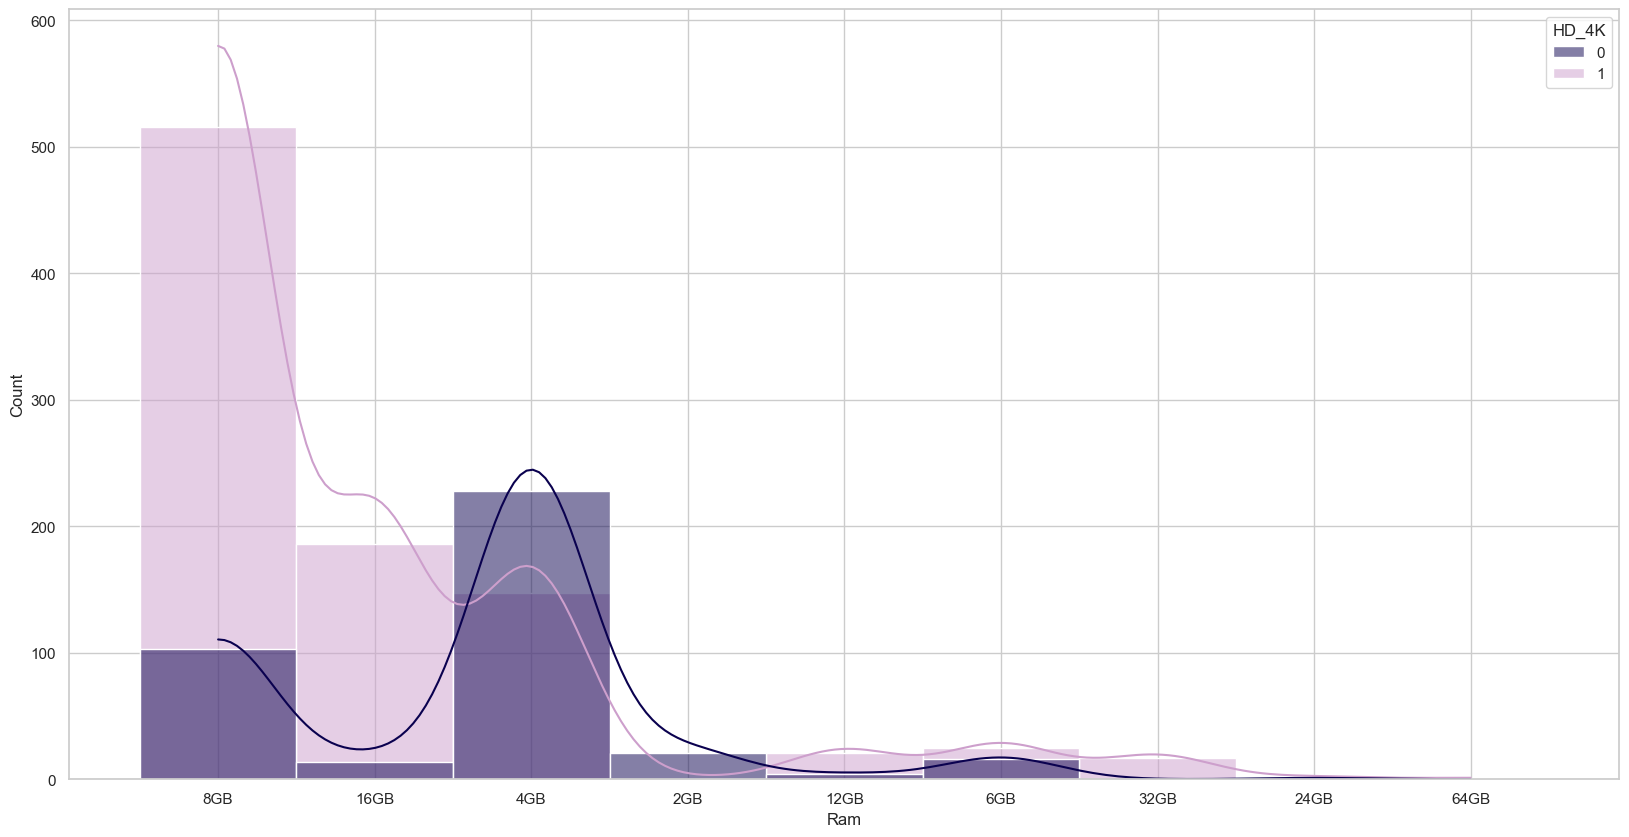

In [12]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( data = DF_Original , x = DF_Original.Ram , kde = True , hue =  'HD_4K' , palette = [ '#0A014F', '#CD9FCC' ] );

* RAM pada laptop yang memiliki HD atau HD+ atau 4K adalah:

1. 8 GB

2. 16 GB

    - Laptop dengan kualitas tampilan lebih tinggi (HD/HD+/4K) cenderung memiliki opsi RAM yang lebih besar (8 GB atau 16 GB).

    - Ini bisa menunjukkan bahwa laptop dengan kualitas tampilan yang lebih baik sering dirancang untuk tugas-tugas yang membutuhkan kinerja lebih tinggi, yang pada gilirannya mungkin memerlukan lebih banyak RAM.

* RAM pada laptop yang tidak memiliki HD atau HD+ atau 4K adalah:

1. 2 GB

2. 12 GB

3. 6 GB

4. 32 GB

5. 24 GB

6. 64 GB

    - Korelasi antara kualitas tampilan yang lebih tinggi dan ukuran RAM yang lebih besar menunjukkan bahwa laptop dengan tampilan yang lebih baik sering dioptimalkan untuk kinerja yang lebih baik dan pengalaman pengguna yang lebih baik.

    - Laptop dengan resolusi tampilan yang lebih rendah (tidak HD atau 4K) mungkin mengalokasikan sebagian besar anggaran dan sumber daya mereka ke komponen lain, seperti RAM dan prosesor.

    - Alokasi ini dapat meningkatkan kinerja sistem secara keseluruhan, memungkinkan multitasking yang lebih lancar dan responsivitas yang lebih baik.

#### TOUCHSCREEN

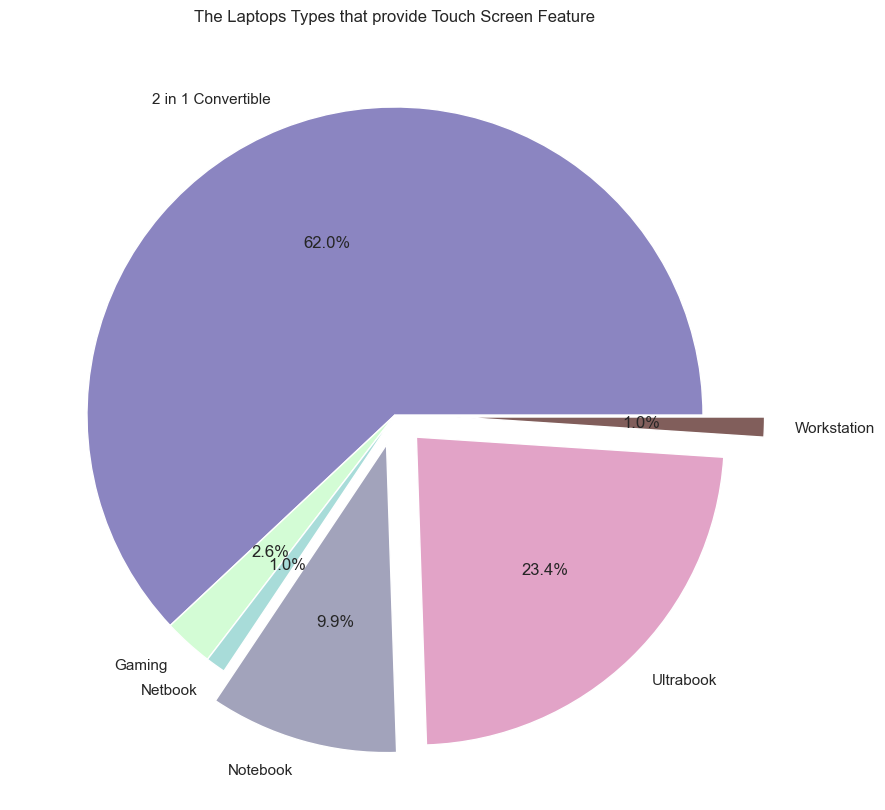

In [13]:
Data = DF.groupby ( by = ['TypeName']  ).sum ( ).reset_index ( ).loc [ : , ['TouchScreen', 'TypeName'] ]
Colors = [ '#8B85C1' , '#D3FCD5' , '#A8DCD9' , '#A2A3BB' , '#E2A3C7'  , '#815E5B' ,  '#7A6F9B' ]
plt.figure ( figsize = ( 20 , 10 ) )
plt.pie ( x = Data.TouchScreen , autopct = '%1.1f%%', colors = Colors , explode = [ 0 , 0 , 0 , 0.1 , 0.1 , 0.2 ] , labels = list(Data.TypeName.unique ( ))) ;
plt.title ( "The Laptops Types that provide Touch Screen Feature" );

#### SIZE DISTRIBUTION WRT CPU TYPES

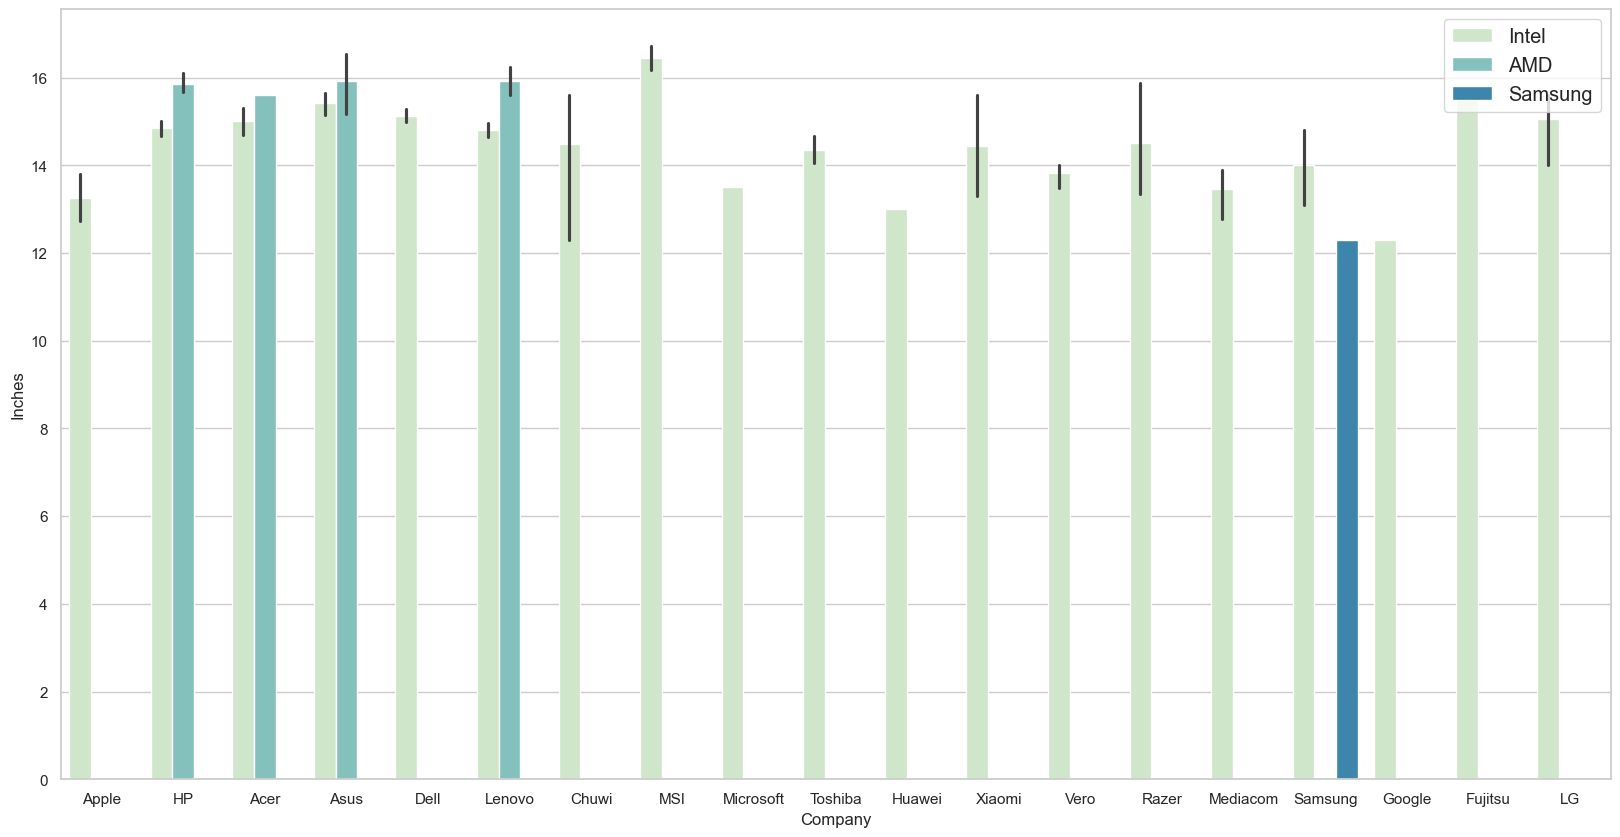

In [14]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.barplot ( x = 'Company' , y = 'Inches' , hue = 'CPU_Types' , data = DF_Original , palette = 'GnBu' )
plt.legend ( loc = 'upper right' , fontsize = 'large' )
plt.show ( )

* Prosesor Intel:

    - Laptop dengan prosesor Intel cenderung memiliki ukuran layar diagonal yang melebihi 12 inci.

    - MSI memimpin dalam memproduksi laptop terbesar yang menggunakan prosesor Intel, yang terutama terlihat pada laptop yang berorientasi pada gaming.

    - Mayoritas produsen laptop dari berbagai merek lebih memilih prosesor Intel, menekankan adopsi yang luas.

* Prosesor AMD:

    - HP, Acer, dan Lenovo menonjol karena mengintegrasikan prosesor AMD dalam laptop mereka, sering kali bertepatan dengan ukuran layar yang lebih besar.

    - Produsen ini menunjukkan pendekatan ganda dengan menawarkan laptop dengan prosesor Intel dan AMD.

    - Terutama, laptop yang didukung oleh prosesor AMD sering kali lebih besar dibandingkan dengan laptop yang menggunakan prosesor Intel.

    - Laptop yang lebih besar dengan ruang internal lebih banyak dapat mengakomodasi prosesor dengan kinerja lebih tinggi dan kebutuhan daya yang lebih besar, seperti prosesor AMD.

* Prosesor Samsung:

    - Lini laptop Samsung mencakup model yang didukung oleh prosesor buatan Samsung dan prosesor Intel.

### OUTLIERS

#### DETECTING OUTLIERS

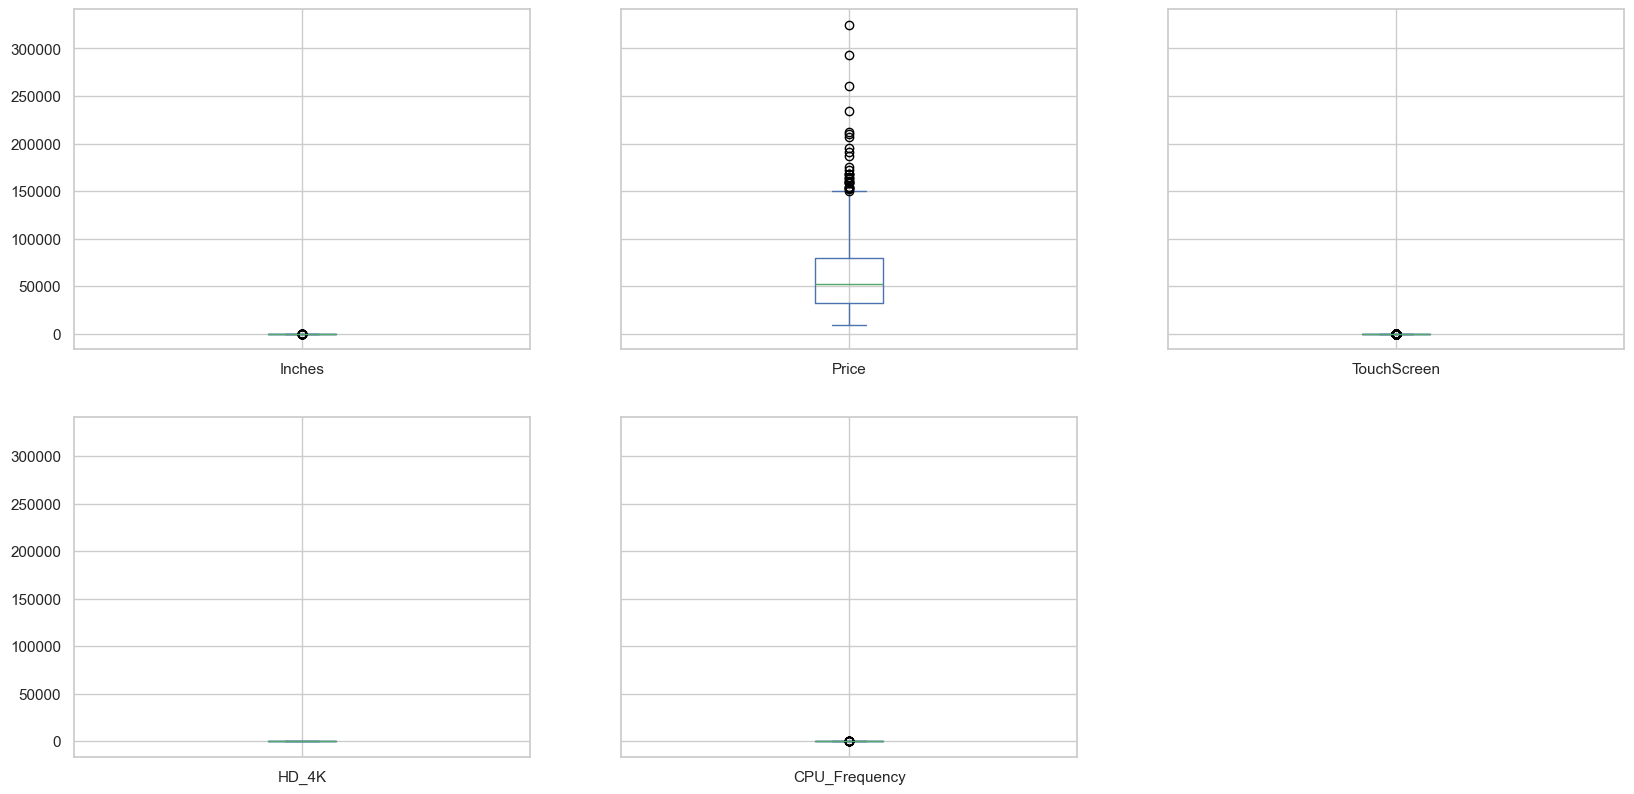

In [15]:
DF_Original.select_dtypes ( np.number ).plot ( kind = 'box' , subplots = True , layout = ( 3 , 3 ) , figsize = ( 20 , 15 ) , sharex = True , sharey = True );

Alasan di Balik Outlier

1. Outlier Luxury Laptop :

    * Outlier terjadi karena laptop mewah yang dibuat dengan bahan berkualitas tinggi dan fitur canggih.

    * Laptop ini menargetkan pasar unik yang menghargai atribut luar biasa di luar yang biasa.

    * Bahan premium dan teknologi mutakhir meningkatkan harga, membuatnya menonjol sebagai outlier.

2. Outlier Gaming dan Performa Tinggi:

    * Outlier juga muncul dari laptop gaming dan perangkat berkinerja tinggi.

    * Laptop-laptop ini unggul dalam gaming dan tugas-tugas yang membutuhkan sumber daya besar seperti pengeditan video.

    * Prosesor yang kuat, kartu grafis, dan solusi pendinginan yang robust meningkatkan biaya dan harga.

    * Para gamer dan profesional yang bersedia membayar lebih untuk performa terbaik mendorong kemunculan outlier ini.

#### TREATING OUTLIERS

In [16]:
Mean = DF.Price.mean ( )
Std_Dev = DF.Price.std ( )
Threshold = 3
Lower_Limit = Mean - Threshold * Std_Dev
Upper_Limit = Mean + Threshold * Std_Dev
DF [ 'Price' ] = DF [ 'Price' ].apply ( lambda x : Lower_Limit if x < Lower_Limit else ( Upper_Limit if x > Upper_Limit else x ) )

In [17]:
DF['Price']  = pd.DataFrame ( np.log1p ( DF [ [ 'Price' ] ] ) )
DF.Ram = DF.Ram.str.replace ( 'GB' , '' ).astype ( 'int64' )
DF.Weight = DF.Weight.str.replace ( 'kg' , '' ).astype ( 'float64' )

In [18]:
DF['Weight']  = pd.DataFrame ( np.log1p ( DF [ [ 'Weight' ] ] ) )
DF['PPI']  = pd.DataFrame ( np.log1p  ( DF [ [ 'PPI' ] ] ) )

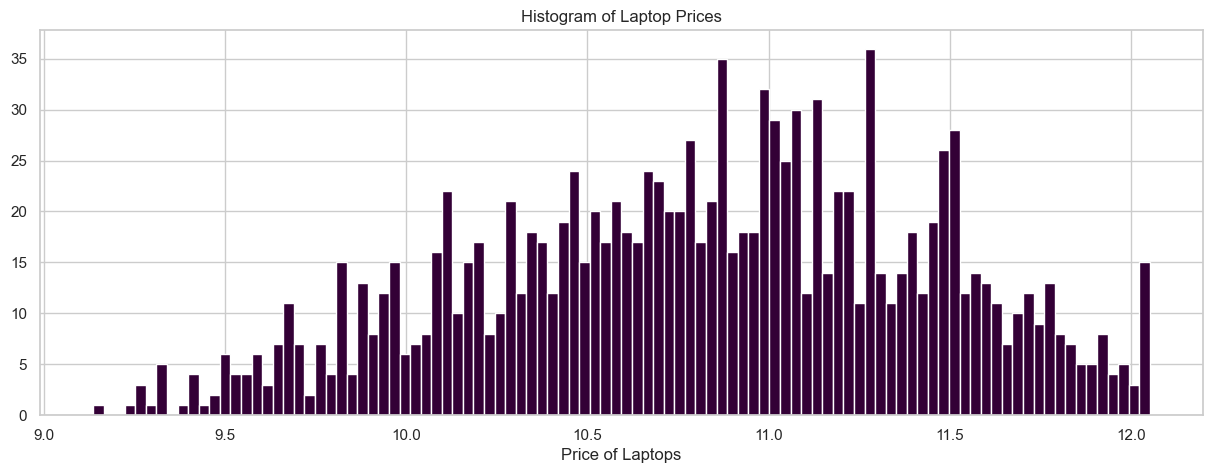

In [19]:
plt.figure ( figsize = ( 15 , 5 ) )
DF.Price.hist ( bins = 100 , color = '#330036' );
plt.xlabel ( "Price of Laptops" )
plt.title ( "Histogram of Laptop Prices" );

## DATA CLEANING

### NULL VALUES

In [20]:
print ( 'Nilai-nilai kosong dalam Data Set adalah sebagai berikut: \n' )
DF.isnull ( ).sum ( ) [ DF.isnull ( ).sum ( ) > 0 ]

Nilai-nilai kosong dalam Data Set adalah sebagai berikut: 



Series([], dtype: int64)

### CATEGORICAL COLUMNS 

In [21]:
DF.select_dtypes ( 'object' )

Company            TypeName       OpSys CPU_Types   Memory_Types
0      Apple           Ultrabook       macOS     Intel            SSD
1      Apple           Ultrabook       macOS     Intel  Flash Storage
2         HP            Notebook       No OS     Intel            SSD
3      Apple           Ultrabook       macOS     Intel            SSD
4      Apple           Ultrabook       macOS     Intel            SSD
...      ...                 ...         ...       ...            ...
1298  Lenovo  2 in 1 Convertible  Windows 10     Intel            SSD
1299  Lenovo  2 in 1 Convertible  Windows 10     Intel            SSD
1300  Lenovo            Notebook  Windows 10     Intel  Flash Storage
1301      HP            Notebook  Windows 10     Intel            HDD
1302    Asus            Notebook  Windows 10     Intel            HDD

[1303 rows x 5 columns]

In [22]:
Categorical_Columns = DF.select_dtypes ( 'object' ).columns.to_list ( )
Categorical_Columns

['Company', 'TypeName', 'OpSys', 'CPU_Types', 'Memory_Types']

In [23]:
for i in DF.loc [ : , Categorical_Columns ] :  
    print ( "\n--------------------------------------------------------------------------\n" , "Column => " , i )
    display ( DF [ i ].value_counts ( ) )


--------------------------------------------------------------------------
 Column =>  Company


Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64


--------------------------------------------------------------------------
 Column =>  TypeName


TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64


--------------------------------------------------------------------------
 Column =>  OpSys


OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64


--------------------------------------------------------------------------
 Column =>  CPU_Types


CPU_Types
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64


--------------------------------------------------------------------------
 Column =>  Memory_Types


Memory_Types
SSD              653
HDD              575
Flash Storage     75
Name: count, dtype: int64

### CORRELATION 

In [24]:
numeric_DF = DF.select_dtypes(include=[np.number])

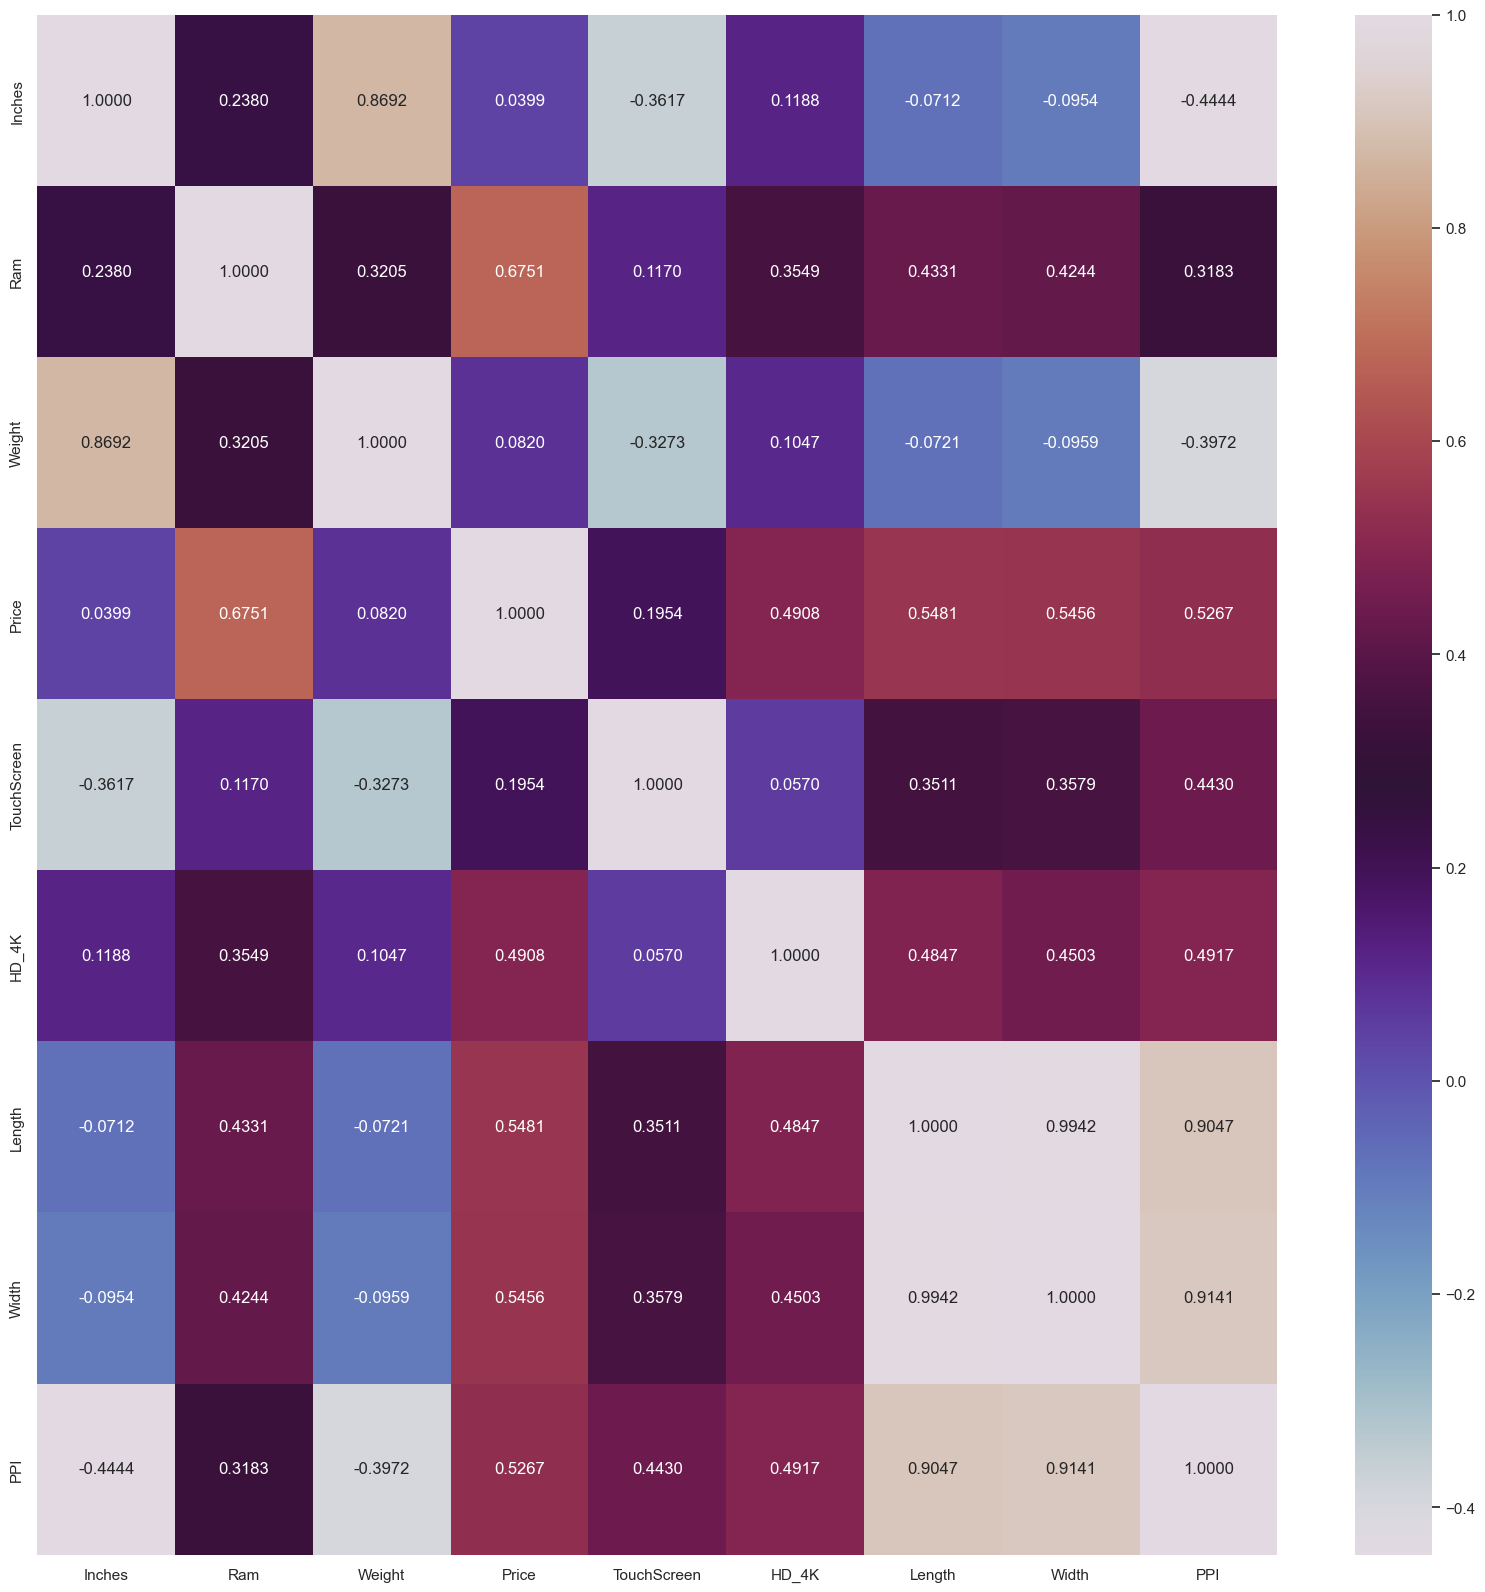

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data=numeric_DF.corr(), cmap='twilight', annot=True, fmt='0.4f')
plt.show()

In [26]:
numeric_cols = DF.select_dtypes(include=[np.number]).columns
correlation_matrix = DF[numeric_cols].corr()
correlation_matrix = correlation_matrix.where((correlation_matrix > 0.2) | (correlation_matrix < -0.2), '-')
print(correlation_matrix)

               Inches       Ram    Weight     Price TouchScreen     HD_4K  \
Inches            1.0  0.237993  0.869212         -   -0.361735         -   
Ram          0.237993       1.0  0.320475  0.675133           -   0.35487   
Weight       0.869212  0.320475       1.0         -   -0.327295         -   
Price               -  0.675133         -       1.0           -  0.490754   
TouchScreen -0.361735         - -0.327295         -         1.0         -   
HD_4K               -   0.35487         -  0.490754           -       1.0   
Length              -  0.433121         -  0.548136    0.351066  0.484739   
Width               -  0.424437         -  0.545568     0.35793  0.450274   
PPI         -0.444368  0.318253 -0.397236  0.526693    0.442987  0.491712   

               Length     Width       PPI  
Inches              -         - -0.444368  
Ram          0.433121  0.424437  0.318253  
Weight              -         - -0.397236  
Price        0.548136  0.545568  0.526693  
TouchScre

Beberapa korelasi yang dapat diperhatikan adalah antara:

1. Fitur Layar Sentuh dan Jenis Laptop (-0.417188)
Laptop dengan fitur layar sentuh mungkin lebih umum dikaitkan dengan jenis laptop yang berorientasi pada konsumen (misalnya, Ultrabook, Convertible) yang mengutamakan interaktivitas dan pengalaman pengguna, sementara laptop tanpa layar sentuh mungkin lebih condong ke jenis yang lebih berorientasi pada bisnis (misalnya, Workstation, laptop Bisnis).

2. Layar Sentuh dan Ukuran Laptop (-0.361735)
Korelasi negatif antara layar sentuh dan ukuran laptop menunjukkan bahwa laptop yang lebih kecil (misalnya, Ultrabook) lebih mungkin memiliki kemampuan layar sentuh. Hal ini mungkin disebabkan oleh keinginan untuk portabilitas dan kenyamanan dalam faktor bentuk yang lebih kecil.

3. Berat dan Ukuran Laptop (0.827631)
Korelasi positif yang kuat antara berat dan ukuran laptop menunjukkan bahwa laptop yang lebih besar cenderung lebih berat. Hal ini kemungkinan disebabkan oleh komponen dan bahan tambahan yang dibutuhkan untuk layar yang lebih besar dan perangkat keras yang lebih kuat.

4. Berat dan RAM Laptop (0.383874)
Korelasi antara berat dan RAM menunjukkan bahwa laptop dengan lebih banyak RAM (yang dapat meningkatkan kinerja) mungkin juga memiliki berat yang sedikit lebih tinggi karena peningkatan komponen perangkat keras yang diperlukan untuk mengakomodasi memori tambahan.

5. Resolusi HD, HD+, dan 4K dan RAM Laptop (0.35487)
Laptop dengan layar resolusi lebih tinggi (HD, HD+, 4K) mungkin memerlukan lebih banyak RAM untuk menangani pemrosesan data visual yang meningkat dan multitasking yang terkait dengan konten resolusi tinggi.

6. Jenis Memori dan Harga Laptop (0.385761)
Jenis memori yang digunakan dalam laptop (misalnya, SSD, HDD) mungkin mempengaruhi kinerja dan kemampuannya secara keseluruhan, yang pada gilirannya dapat mempengaruhi harga laptop. Laptop dengan harga lebih tinggi mungkin menggunakan teknologi memori yang lebih baru dan lebih cepat.

7. Harga dan RAM Laptop (0.701592)
Korelasi positif antara harga dan RAM menunjukkan bahwa laptop dengan lebih banyak RAM cenderung memiliki harga yang lebih tinggi. Hal ini kemungkinan karena jumlah RAM yang lebih besar dapat meningkatkan kinerja dan kemampuan multitasking, membuat laptop lebih cocok untuk tugas dan aplikasi yang menuntut.

## DATA PREPROCESSING 

In [27]:
Train , Test = train_test_split ( DF , random_state = 42 )
Train_X = Train.drop ( columns = [ 'Price' , 'Inches' , 'Length' , 'Width' , 'HD_4K' ] )
Train_Y = Train.Price
Test_X = Test.drop (  columns = [ 'Price' , 'Inches' , 'Length' , 'Width' , 'HD_4K' ] )
Test_Y = Test.Price
print ( "Ukuran atau dimensi dari data set adalah: \n" )
print ( "Train : {}\n\nTest : {}\n".format ( Train.shape , Test.shape ) )
print ( "Train X : {}\n\nTrain Y : {}\n\nTest X : {}\n\nTest Y : {}\n".format ( Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape ) )

Ukuran atau dimensi dari data set adalah: 

Train : (977, 14)

Test : (326, 14)

Train X : (977, 9)

Train Y : (977,)

Test X : (326, 9)

Test Y : (326,)



In [28]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)

## PREDICTIVE MODELING

### LINEAR REGRESSION 

In [29]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)
Step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(drop='first'), Columns)], remainder='passthrough')
Step2 = LinearRegression ( )
Pipeline_LR = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )
Pipeline_LR.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step2', LinearRegression())])

#### PREDICTION & PERFORMANCE EVALUATION 

 Koefisien determinasi (R-Squared) mengukur proporsi varians dalam variabel dependen yang dijelaskan oleh variabel independen dalam model regresi.
    
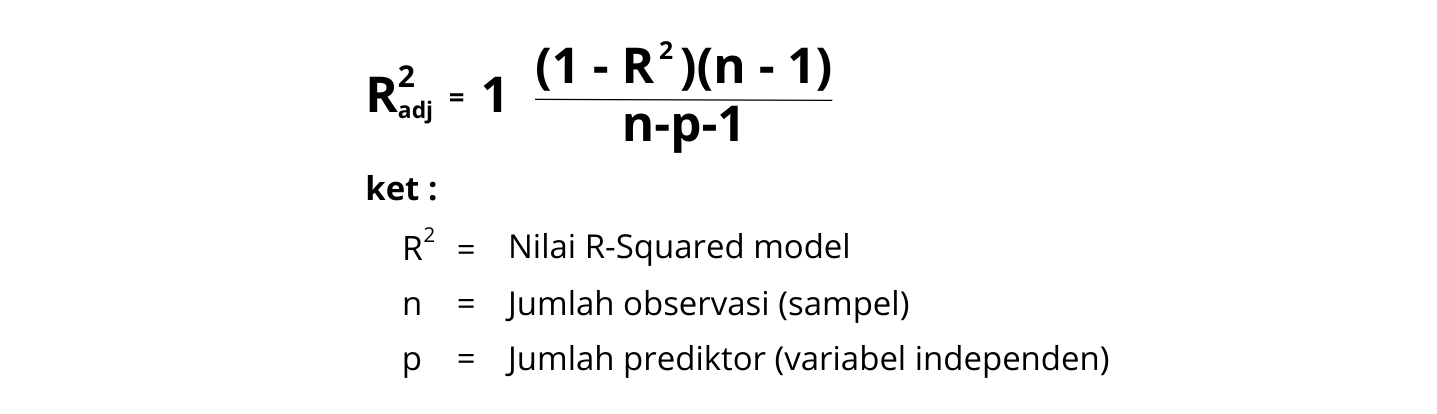

R-Squared yang disesuaikan (atau R2 yang disesuaikan) adalah ukuran statistik yang menyesuaikan nilai R-Squared dengan memperhitungkan jumlah prediktor (variabel independen) dalam model regresi. Ini memberikan penalti untuk inklusi prediktor yang tidak diperlukan yang mungkin tidak berkontribusi secara signifikan dalam menjelaskan variasi pada variabel dependen, memberikan penilaian yang lebih realistis tentang kekuatan penjelasan model sambil mempertimbangkan kompleksitas model.

In [30]:
Y_LR = Pipeline_LR.predict ( Test_X )
R2_LR = r2_score ( Test_Y , Y_LR ) * 100
N = Train_X.shape[0] 
P = Train_X.shape[1]
print ( "Nilai R2 atau Koefisien Determinasi adalah: " , R2_LR )
Adjusted_R2_LR = 1 - ( ( 1 - R2_LR ) * ( N - 1 ) / ( N - 1 - P ) )
MSE_LR = mean_squared_error ( Test_Y , Y_LR )
RMSE_LR = np.sqrt ( MSE_LR )
MAPE_LR = mean_absolute_percentage_error ( Test_Y , Y_LR ) * 100
MAE_LR = mean_absolute_error ( Test_Y , Y_LR )
print ( "\nNilai R2 yang Disesuaikan adalah: " , Adjusted_R2_LR )

Nilai R2 atau Koefisien Determinasi adalah:  73.0892658319165

Nilai R2 yang Disesuaikan adalah:  73.76021039498501


In [31]:
LR_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] ,         
           'Values' : [ R2_LR , Adjusted_R2_LR , MSE_LR , RMSE_LR , MAPE_LR , MAE_LR ] }
LR_Performance_Metrics = pd.DataFrame ( LR_PM )
LR_Performance_Metrics

Performance Metric     Values
0                 R2  73.089266
1        Adjusted_R2  73.760210
2                MSE   0.095278
3               RMSE   0.308672
4               MAPE   2.198295
5                MAE   0.238868

#### CHECKING FOR ASSUMPTIONS

##### NORMAL DISTRIBUTION

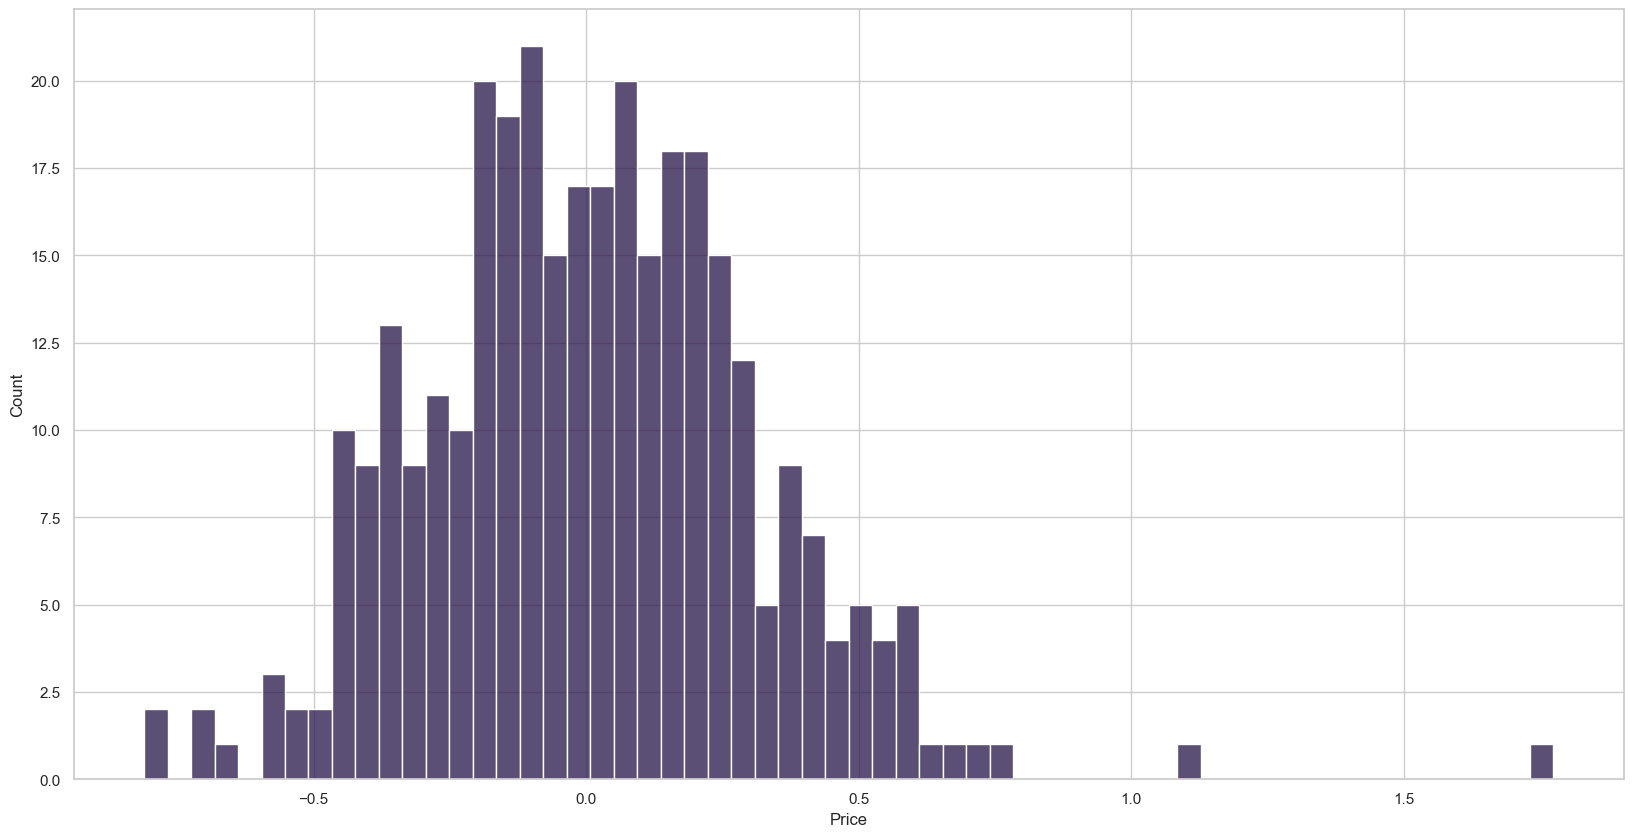

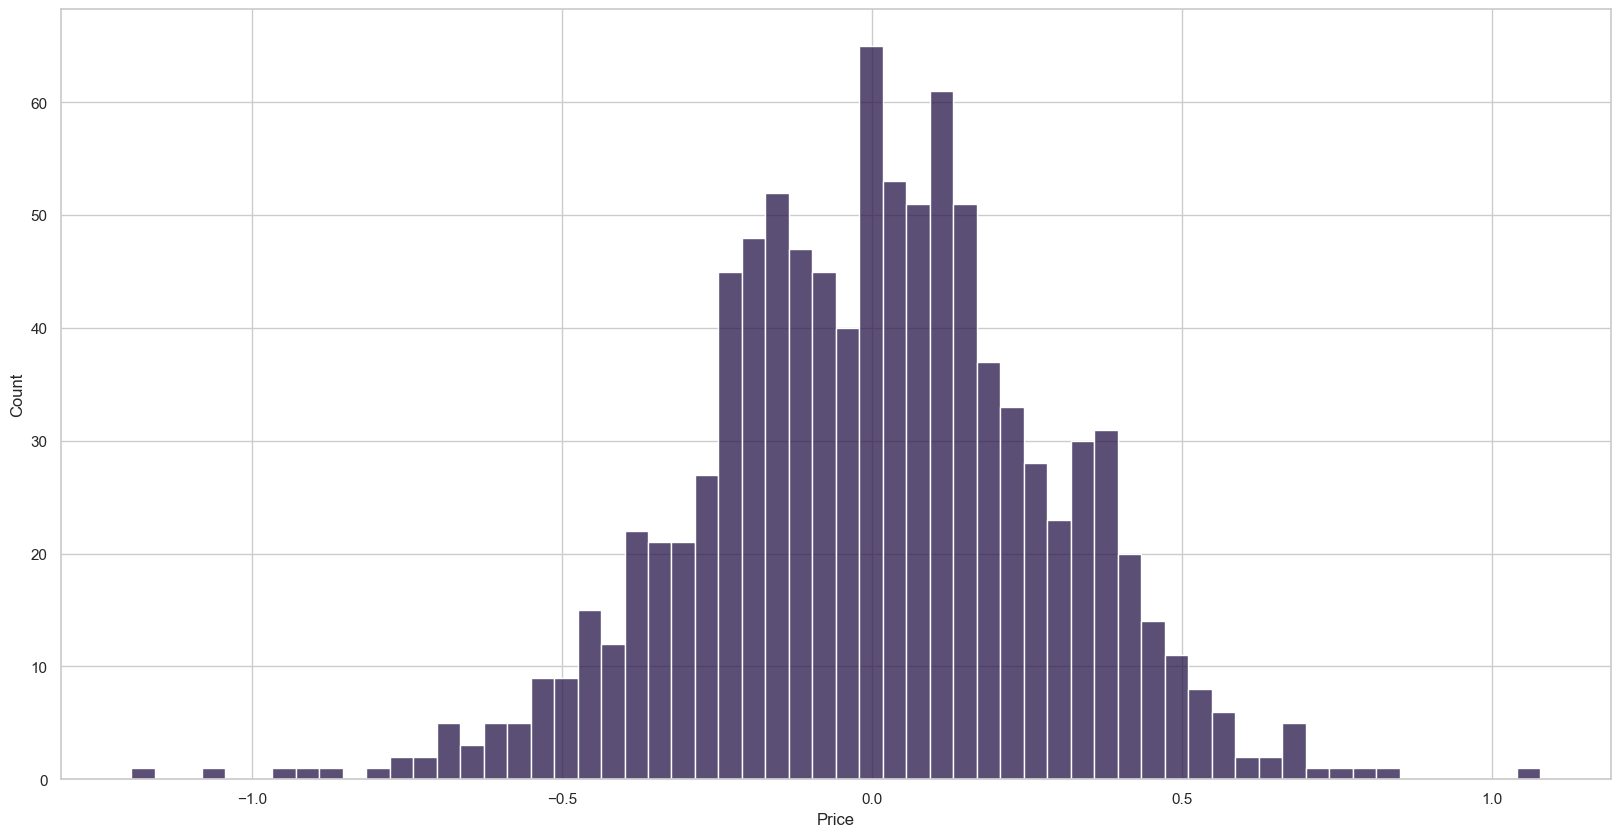

In [32]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_LR - Test_Y ) , bins = 60 , color = '#261447' )
Y_Train_LR = Pipeline_LR.predict ( Train_X )
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_Train_LR - Train_Y ) , bins = 60 , color = '#261447' );

    SKEWNESS & KURTOSIS

In [33]:
# Kemiringan dari distribusi normal adalah 0
Error_Train = Train_Y - Y_Train_LR 
print ( "Nilai skewness dari data latih adalah: ", np.round ( Error_Train.skew ( ) , 2 ) )
# Kurtosis dari distribusi normal adalah 3
print ( "\nNilai kurtosis dari data latih adalah: ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah:  0.17

Nilai kurtosis dari data latih adalah:  3.57


-- INFERENSI --

* KEMIRINGAN
Nilai kemiringan 0,174 menunjukkan kemiringan positif yang sangat kecil, yang mengindikasikan bahwa ada beberapa nilai yang lebih besar yang menarik ekor distribusi ke kanan.

Namun, nilai kemiringan ini cukup dekat dengan nol, menunjukkan bahwa penyimpangan dari simetri adalah minimal.

* KURTOSIS
Nilai kurtosis 3,566 lebih besar dari 3. Ini menunjukkan bahwa distribusi memiliki ekor yang relatif berat dan lebih tajam (leptokurtik) dibandingkan dengan distribusi normal.

Nilai kurtosis yang lebih tinggi mengindikasikan bahwa ada lebih banyak titik data di ekor distribusi dibandingkan dengan distribusi normal.

In [34]:
# Kemiringan dari distribusi normal adalah 0
Error_Test = Test_Y - Y_LR 
print ( "Nilai skewness dari data latih adalah: ", np.round ( Error_Test.skew ( ) , 2 ) )
# Kurtosis dari distribusi normal adalah 3
print ( "\nNilai kurtosis dari data latih adalah: ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah:  -0.67

Nilai kurtosis dari data latih adalah:  6.0


-- INFERENSI --

KEMIRINGAN
Nilai kemiringan -0,6635 menunjukkan bahwa distribusi data uji Anda sedikit miring ke kiri.

KURTOSIS
Nilai kurtosis 5,9640 menunjukkan bahwa distribusi data uji Anda adalah leptokurtik, yang berarti memiliki ekor yang lebih berat dan lebih tajam dibandingkan dengan distribusi normal.

##### HOMOSCEDASTICITY  

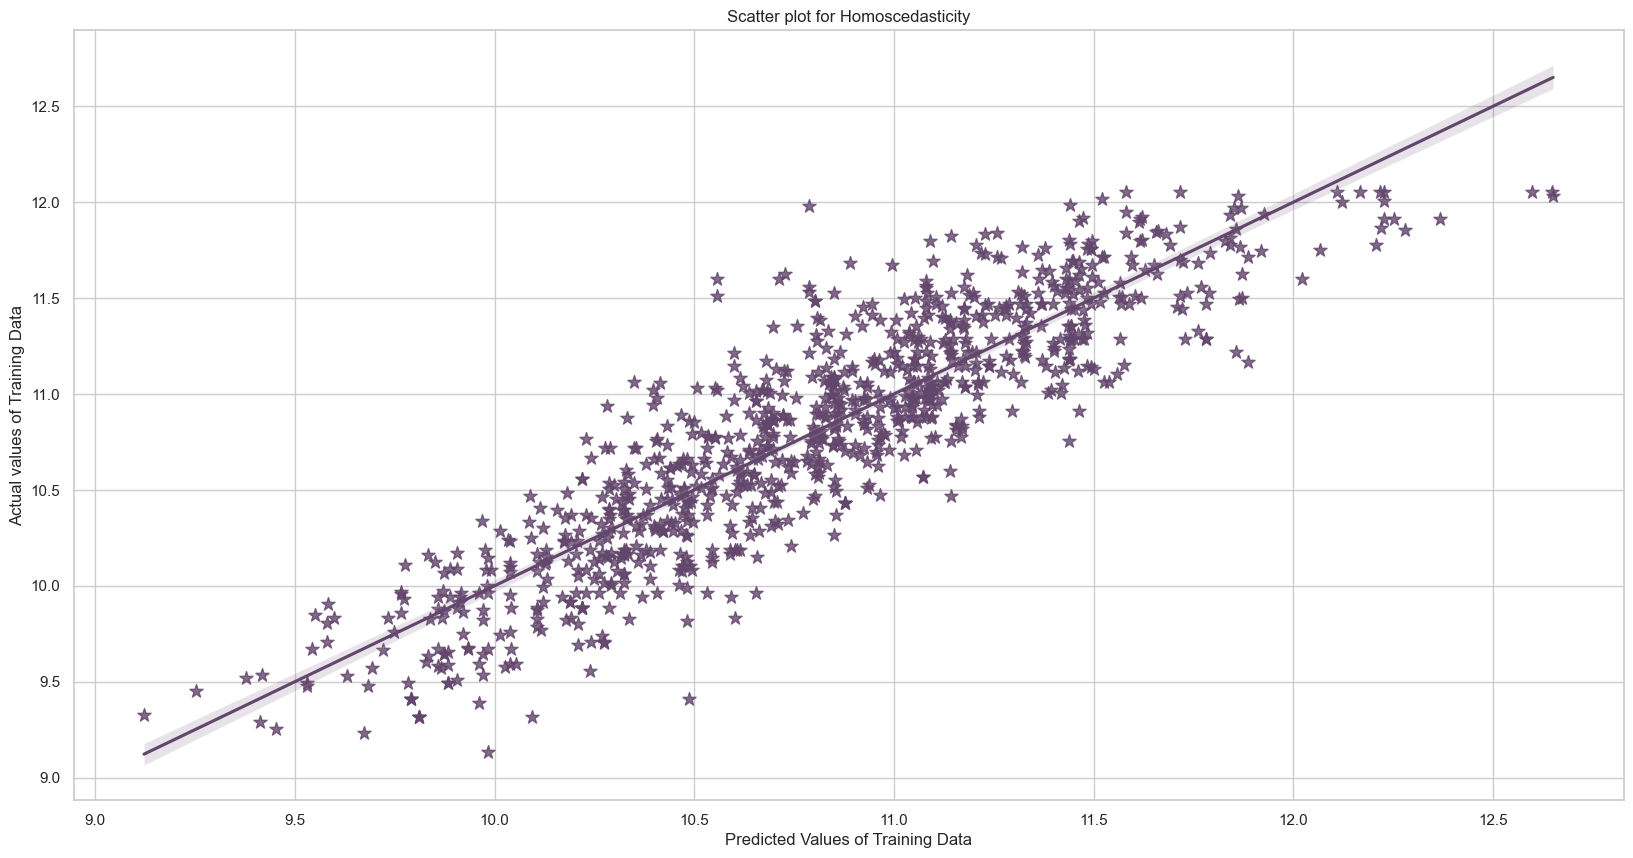

In [35]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_Train_LR , y = Train_Y , color = '#62466B' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Training Data" );
plt.ylabel ( "Actual values of Training Data" );
plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

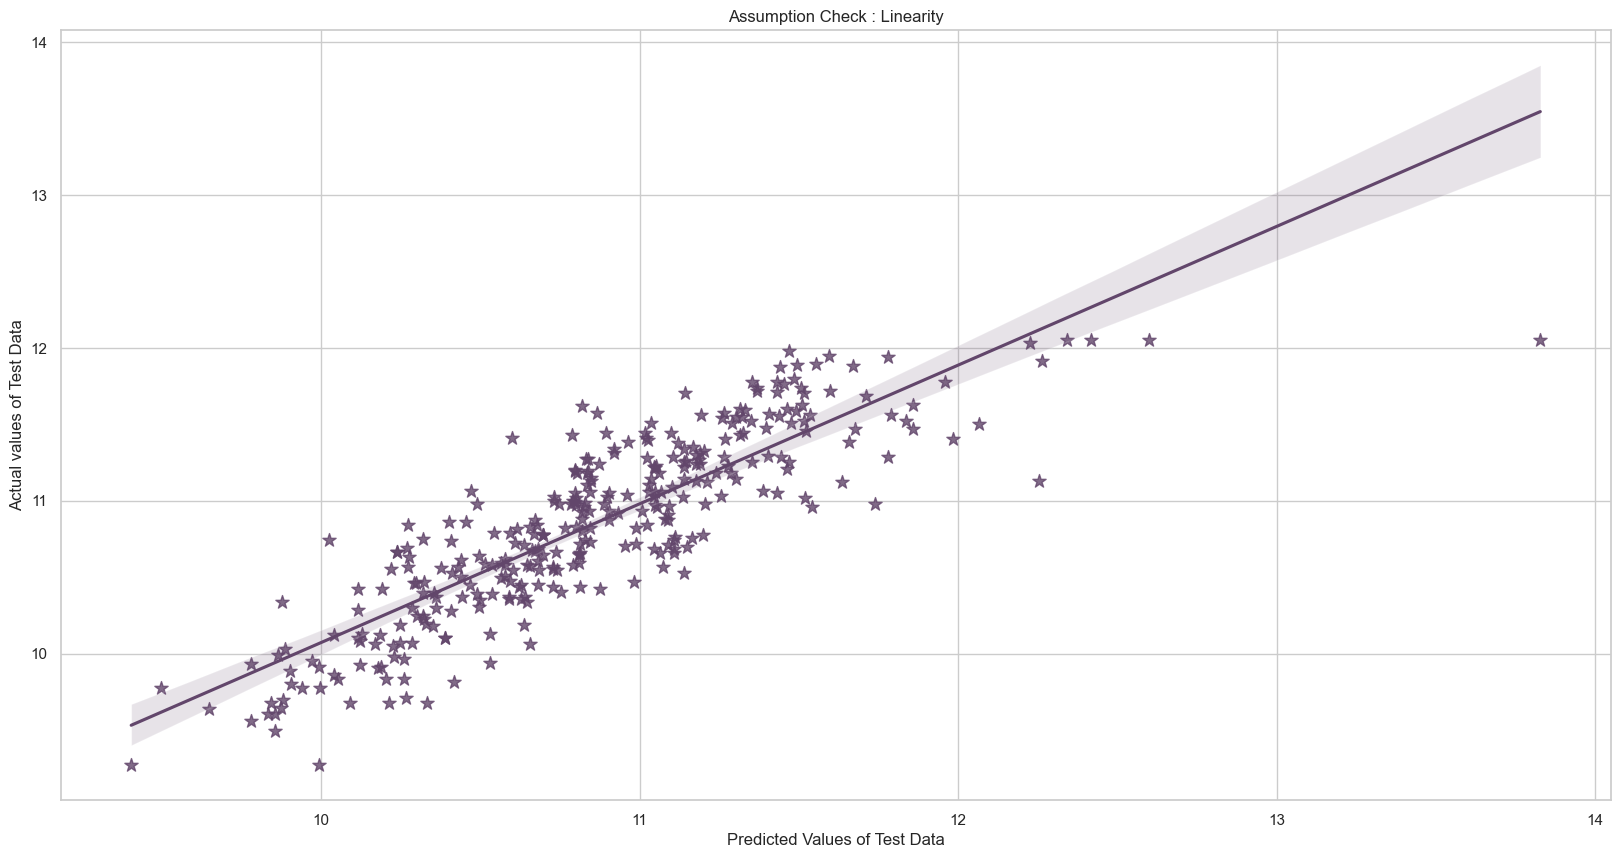

In [36]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_LR , y = Test_Y , color = '#62466B' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Test Data" );
plt.ylabel ( "Actual values of Test Data" );
plt.title ( "Assumption Check : Linearity" );

### RIDGE REGRESSION 

In [37]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)
Step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(drop='first'), Columns)], remainder='passthrough')
R = Ridge ( )
Parameters = { 'alpha' : [ 1.0 , 2.0 , 3.0 ] , 'max_iter' : [ 100 , 200 , 500 ] }
Step2 = GridSearchCV ( estimator = R , param_grid = Parameters , cv = 5 )
Pipeline_R = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )
Pipeline_R.fit ( Train_X , Train_Y )
Parameters = Step2.best_params_
Step3 = Ridge ( **Parameters )
Pipeline_R = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )
Pipeline_R.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3', Ridge(max_iter=100))])

In [38]:
Y_R = Pipeline_R.predict ( Test_X )
R2_R = r2_score ( Test_Y , Y_R ) * 100
N = Train_X.shape[0] 
P = Train_X.shape[1]
print ( "Nilai R2 atau Koefisien Determinasi adalah: " , R2_R )
Adjusted_R2_R = 1 - ( ( 1 - R2_R ) * ( N - 1 ) / ( N - 1 - P ) )
MSE_R = mean_squared_error ( Test_Y , Y_R )
RMSE_R = np.sqrt ( MSE_R )
MAPE_R = mean_absolute_percentage_error ( Test_Y , Y_R ) * 100
MAE_R = mean_absolute_error ( Test_Y , Y_R )
print ( "\nNilai R² yang Disesuaikan adalah: " , Adjusted_R2_R )

Nilai R2 atau Koefisien Determinasi adalah:  72.45370969066059

Nilai R² yang Disesuaikan adalah:  73.1187390466233


In [39]:
R_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] ,        
           'Values' : [ R2_R , Adjusted_R2_R , MSE_R , RMSE_R , MAPE_R , MAE_R ] }
R_Performance_Metrics = pd.DataFrame ( R_PM )
R_Performance_Metrics

Performance Metric     Values
0                 R2  72.453710
1        Adjusted_R2  73.118739
2                MSE   0.097529
3               RMSE   0.312296
4               MAPE   2.214893
5                MAE   0.240673

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

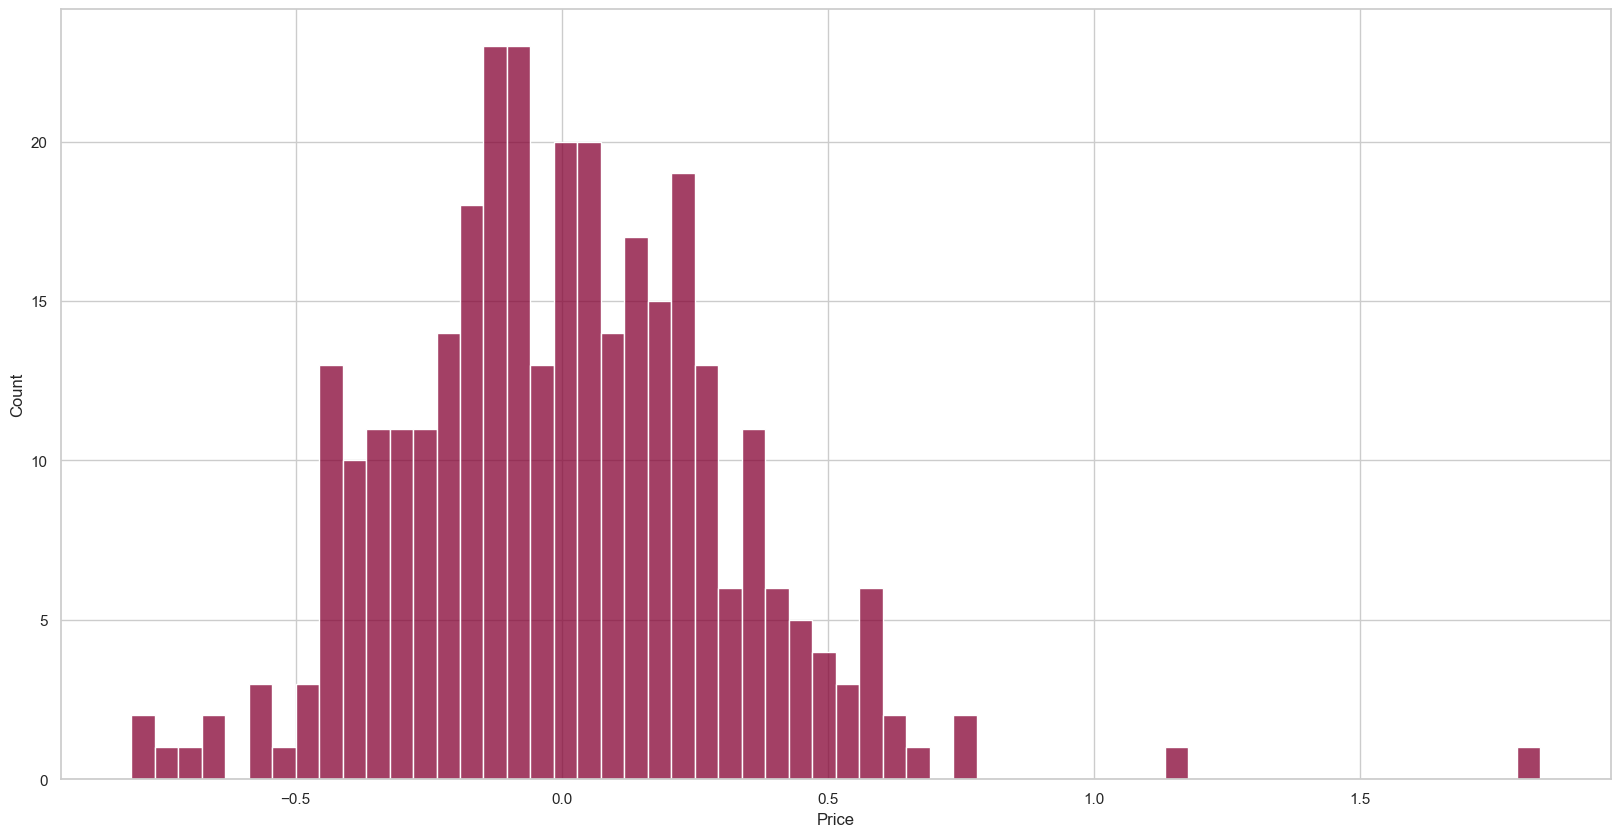

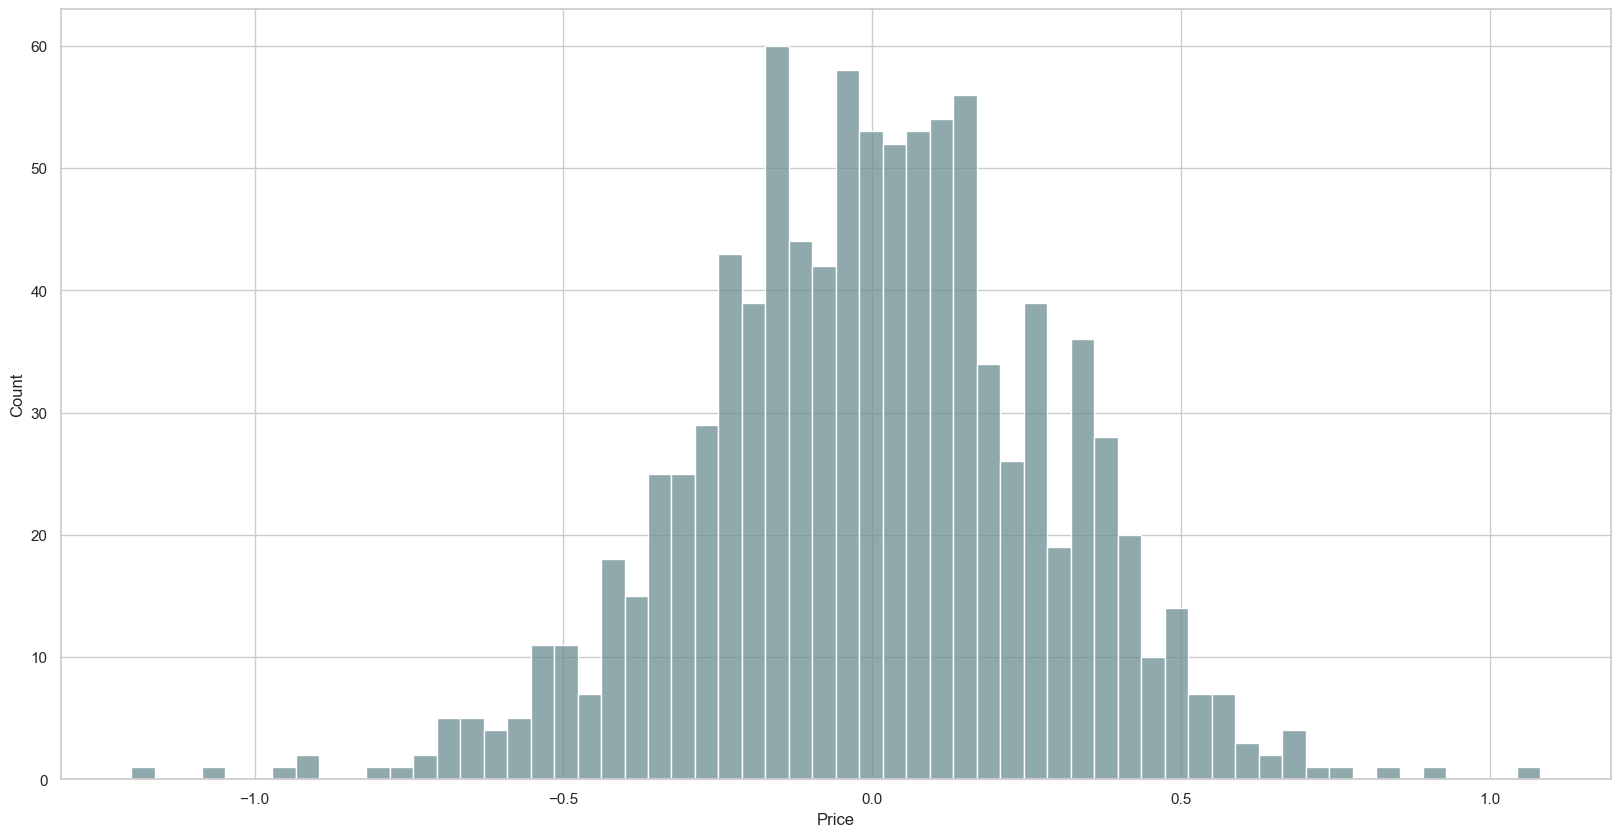

In [40]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_R - Test_Y ) , bins = 60 , color = '#840032' )
Y_Train_R = Pipeline_R.predict ( Train_X )
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_Train_R - Train_Y ) , bins = 60 , color = '#6A8D92' );

In [41]:
Error_Train = Train_Y - Y_Train_R 
print ( "Nilai skewness dari data latih adalah: ", np.round ( Error_Train.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah: ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah:  0.17

Nilai kurtosis dari data latih adalah:  3.58


In [42]:
Error_Test = Test_Y - Y_R 
print ( "Nilai skewness dari data latih adalah: ", np.round ( Error_Test.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah: ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah:  -0.74

Nilai kurtosis dari data latih adalah:  6.4


##### HOMOSCEDASTICITY

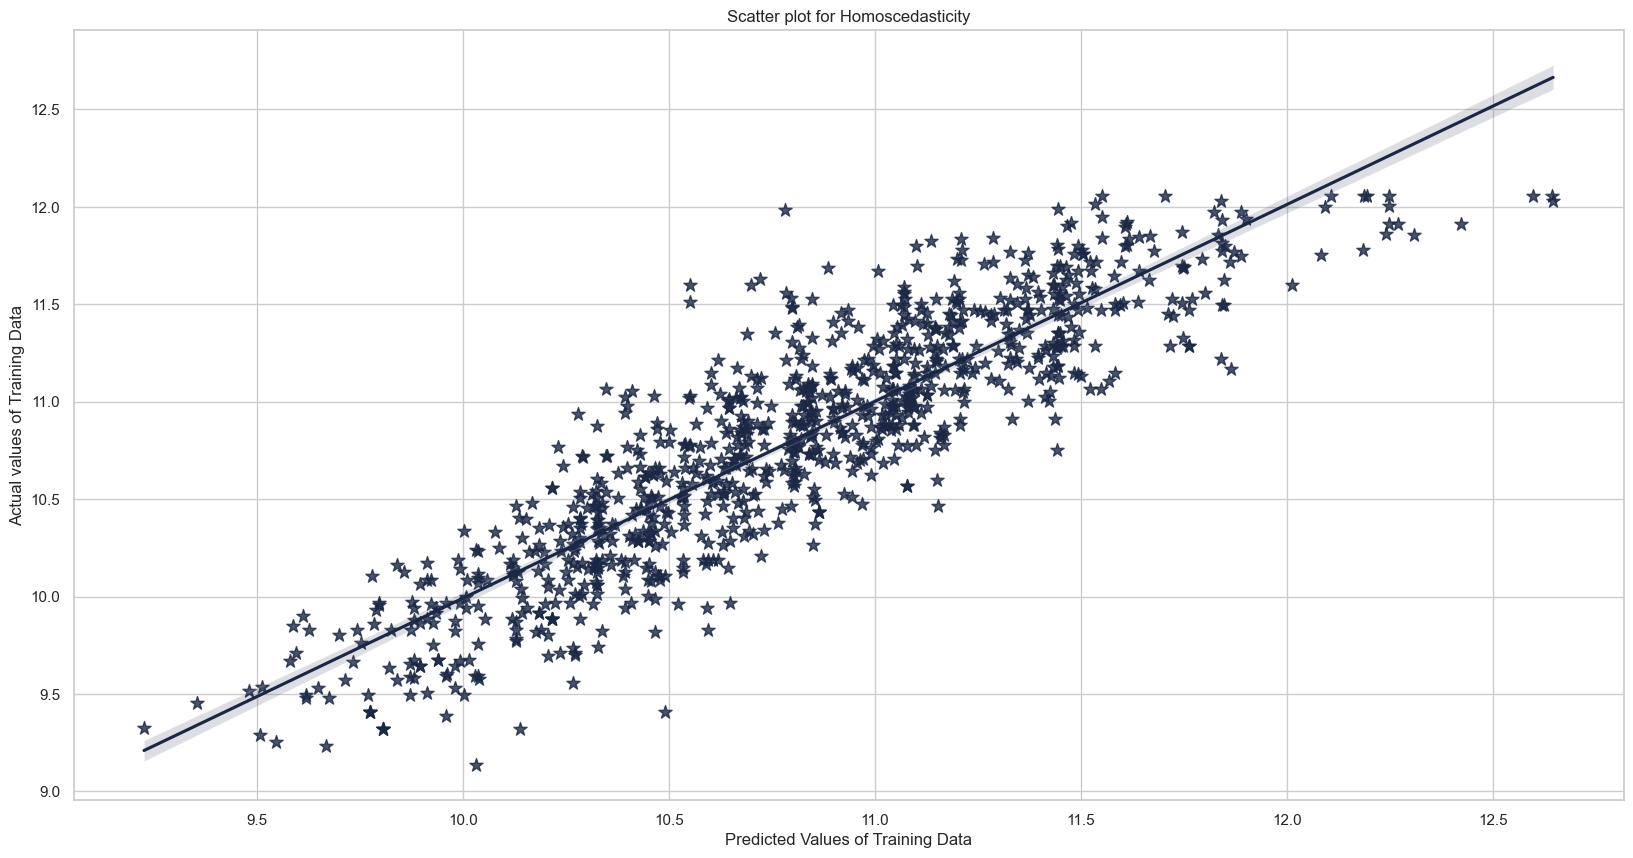

In [43]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_Train_R , y = Train_Y , color = '#1B2845' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Training Data" );
plt.ylabel ( "Actual values of Training Data" );
plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

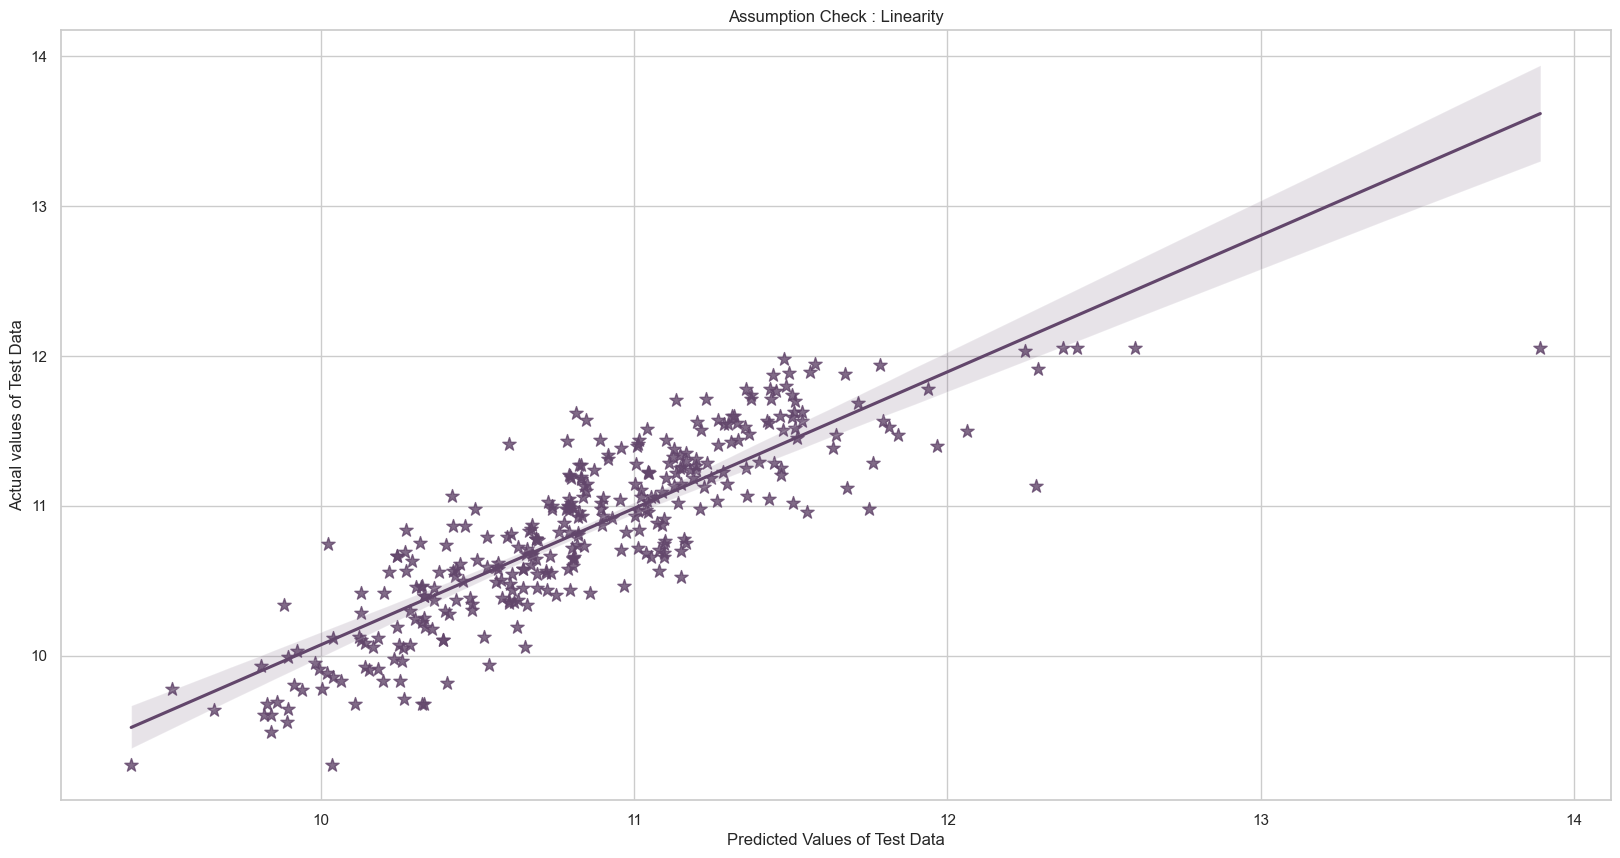

In [44]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_R , y = Test_Y , color = '#62466B' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Test Data" );
plt.ylabel ( "Actual values of Test Data" );
plt.title ( "Assumption Check : Linearity" );

### DECISION TREE REGRESSION 

In [45]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)
Step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(drop='first'), Columns)], remainder='passthrough')
DT = DecisionTreeRegressor ( )
Parameters = { 'criterion' : [ "squared_error", "friedman_mse", "absolute_error", "poisson" ] ,
              'max_depth' : [ 10 , 15 , 20 ] , 'max_features' : [ "auto", "sqrt", "log2" ] }
Step2 = GridSearchCV ( estimator = DT , param_grid = Parameters , cv = 5 )
Pipeline_DT = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )
Pipeline_DT.fit ( Train_X , Train_Y )
Parameters = Step2.best_params_
Step3 = DecisionTreeRegressor ( **Parameters )
Pipeline_DT = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )
Pipeline_DT.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3',
                 DecisionTreeRegressor(max_depth=15, max_features='sqrt'))])

In [46]:
Y_DT = Pipeline_DT.predict ( Test_X )
R2_DT = r2_score ( Test_Y , Y_DT ) * 100
N = Train_X.shape[0] 
P = Train_X.shape[1]
print ( "Nilai R2 atau Koefisien Determinasi adalah : " , R2_DT )
Adjusted_R2_DT = 1 - ( ( 1 - R2_DT ) * ( N - 1 ) / ( N - 1 - P ) )
MSE_DT = mean_squared_error ( Test_Y , Y_DT )
RMSE_DT = np.sqrt ( MSE_DT )
MAPE_DT = mean_absolute_percentage_error ( Test_Y , Y_DT ) * 100
MAE_DT = mean_absolute_error ( Test_Y , Y_DT )
print ( "\nNilai R² yang Disesuaikan adalah : " , Adjusted_R2_DT )

Nilai R2 atau Koefisien Determinasi adalah :  59.31822136274116

Nilai R² yang Disesuaikan adalah :  59.8609969493644


In [47]:
DT_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] ,         
           'Values' : [ R2_DT , Adjusted_R2_DT , MSE_DT , RMSE_DT , MAPE_DT , MAE_DT ] }
DT_Performance_Metrics = pd.DataFrame ( DT_PM )
DT_Performance_Metrics

Performance Metric     Values
0                 R2  59.318221
1        Adjusted_R2  59.860997
2                MSE   0.144035
3               RMSE   0.379520
4               MAPE   2.451663
5                MAE   0.265139

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

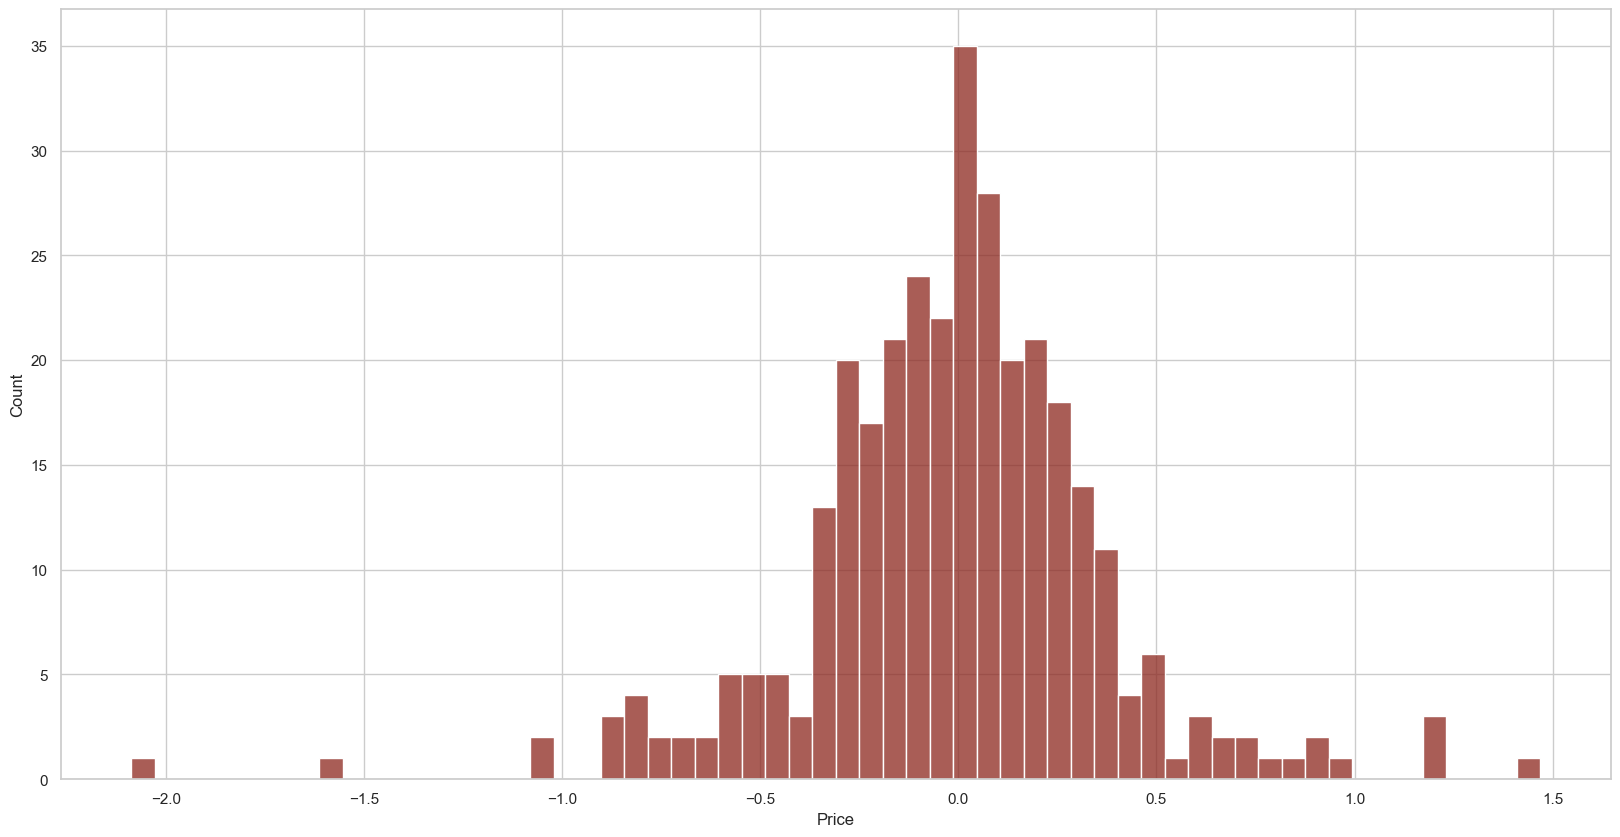

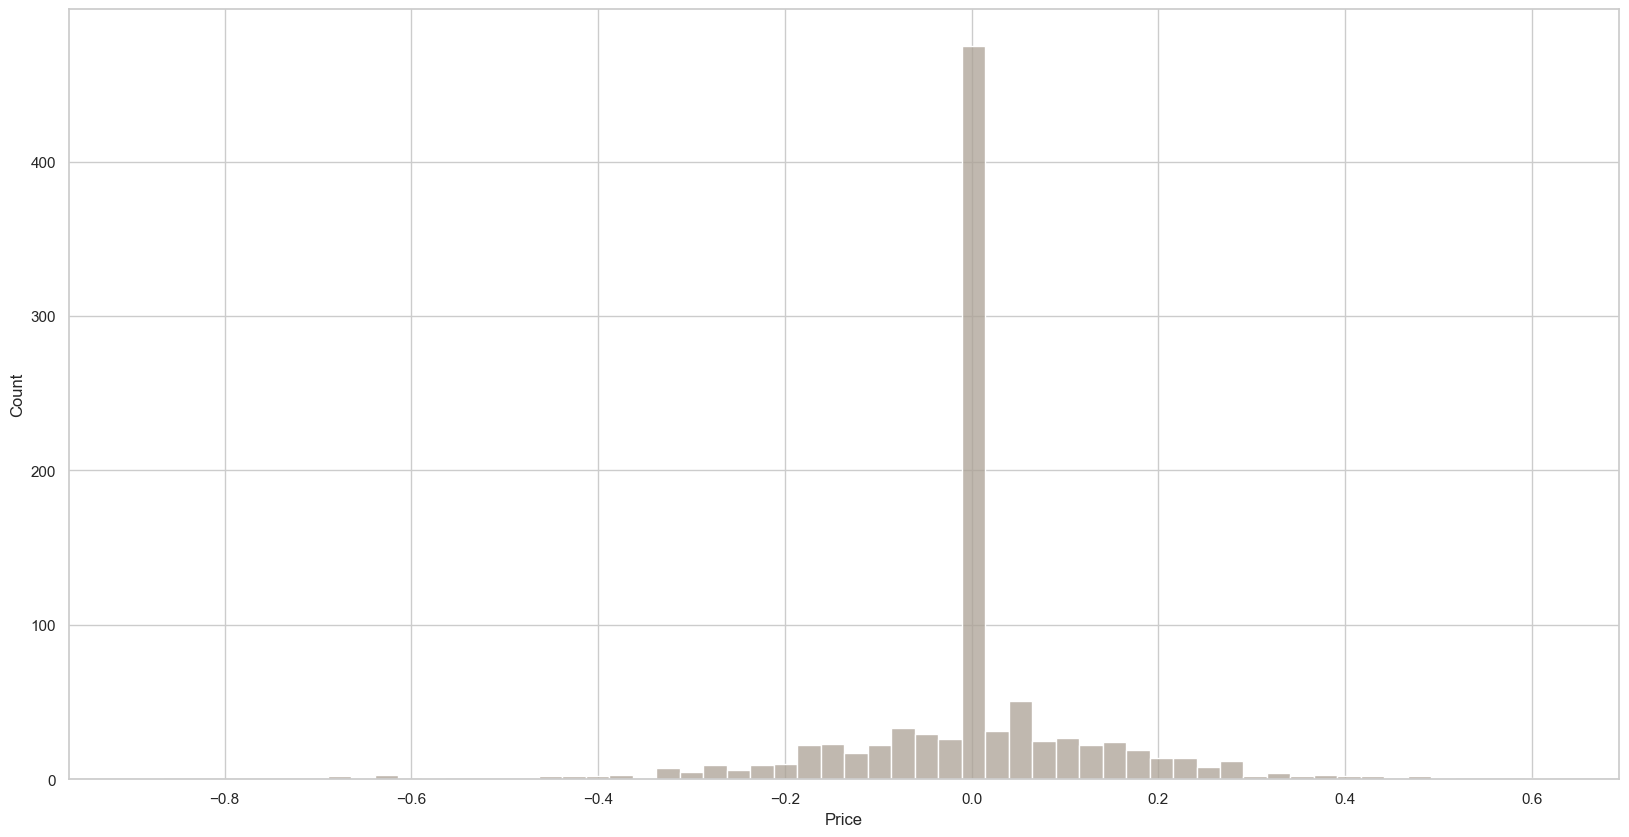

In [48]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_DT - Test_Y ) , bins = 60 , color = '#8C271E' )
Y_Train_DT = Pipeline_DT.predict ( Train_X )
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_Train_DT - Train_Y ) , bins = 60 , color = '#ABA194' );

In [49]:
Error_Train = Train_Y - Y_Train_DT
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Train.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  0.8

Nilai kurtosis dari data latih adalah :  9.31


In [50]:
Error_Test = Test_Y - Y_DT 
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Test.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  0.39

Nilai kurtosis dari data latih adalah :  7.42


##### HOMOSCEDASTICITY

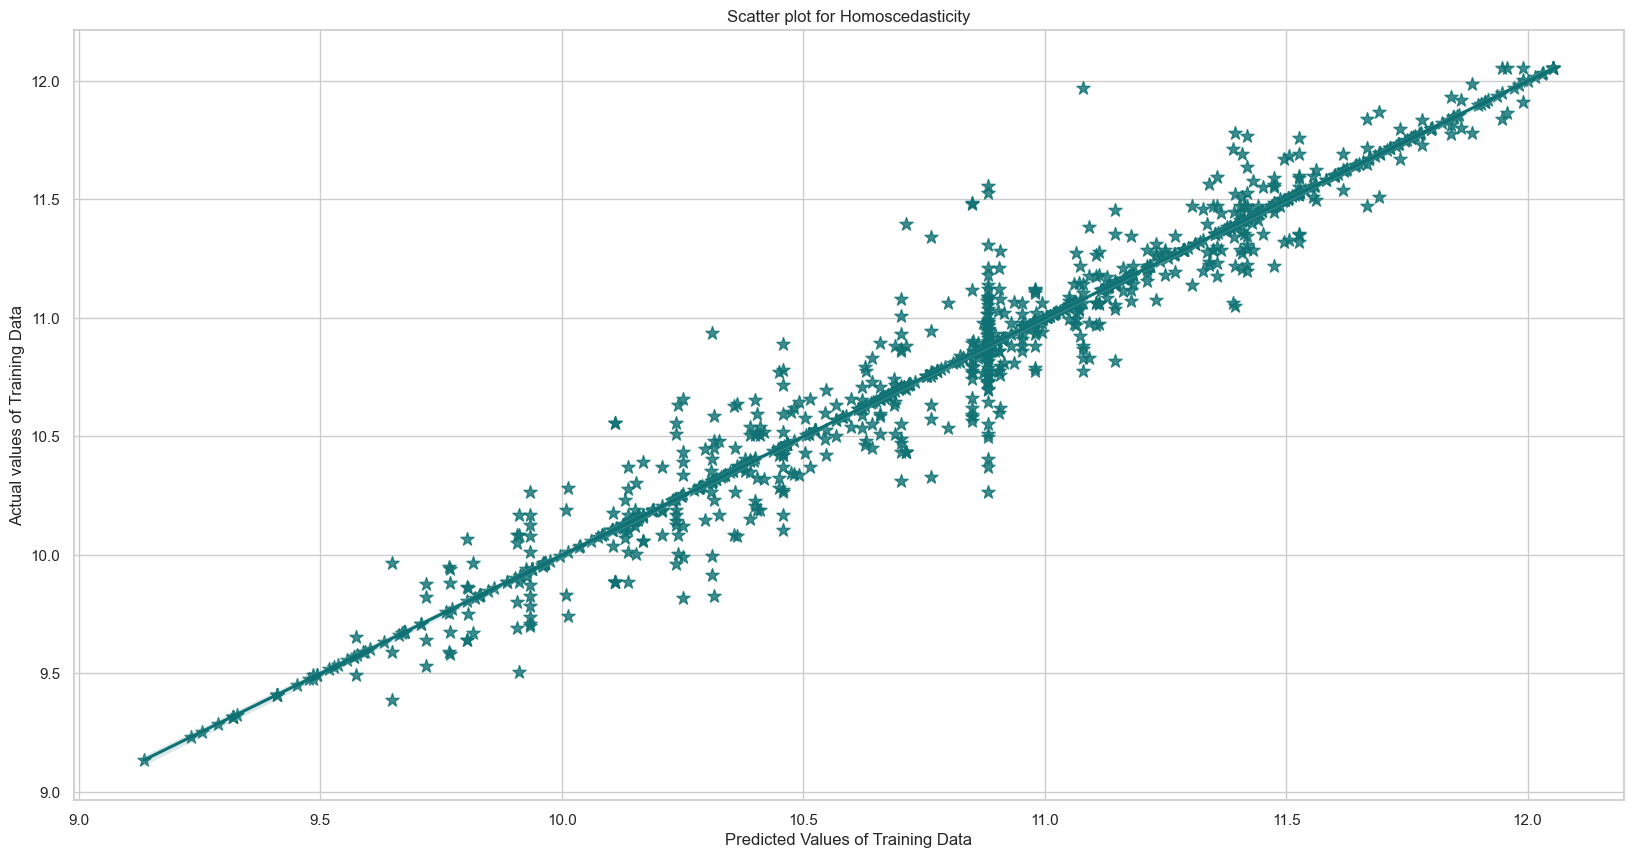

In [51]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_Train_DT , y = Train_Y , color = '#0F7173' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Training Data" );
plt.ylabel ( "Actual values of Training Data" );
plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

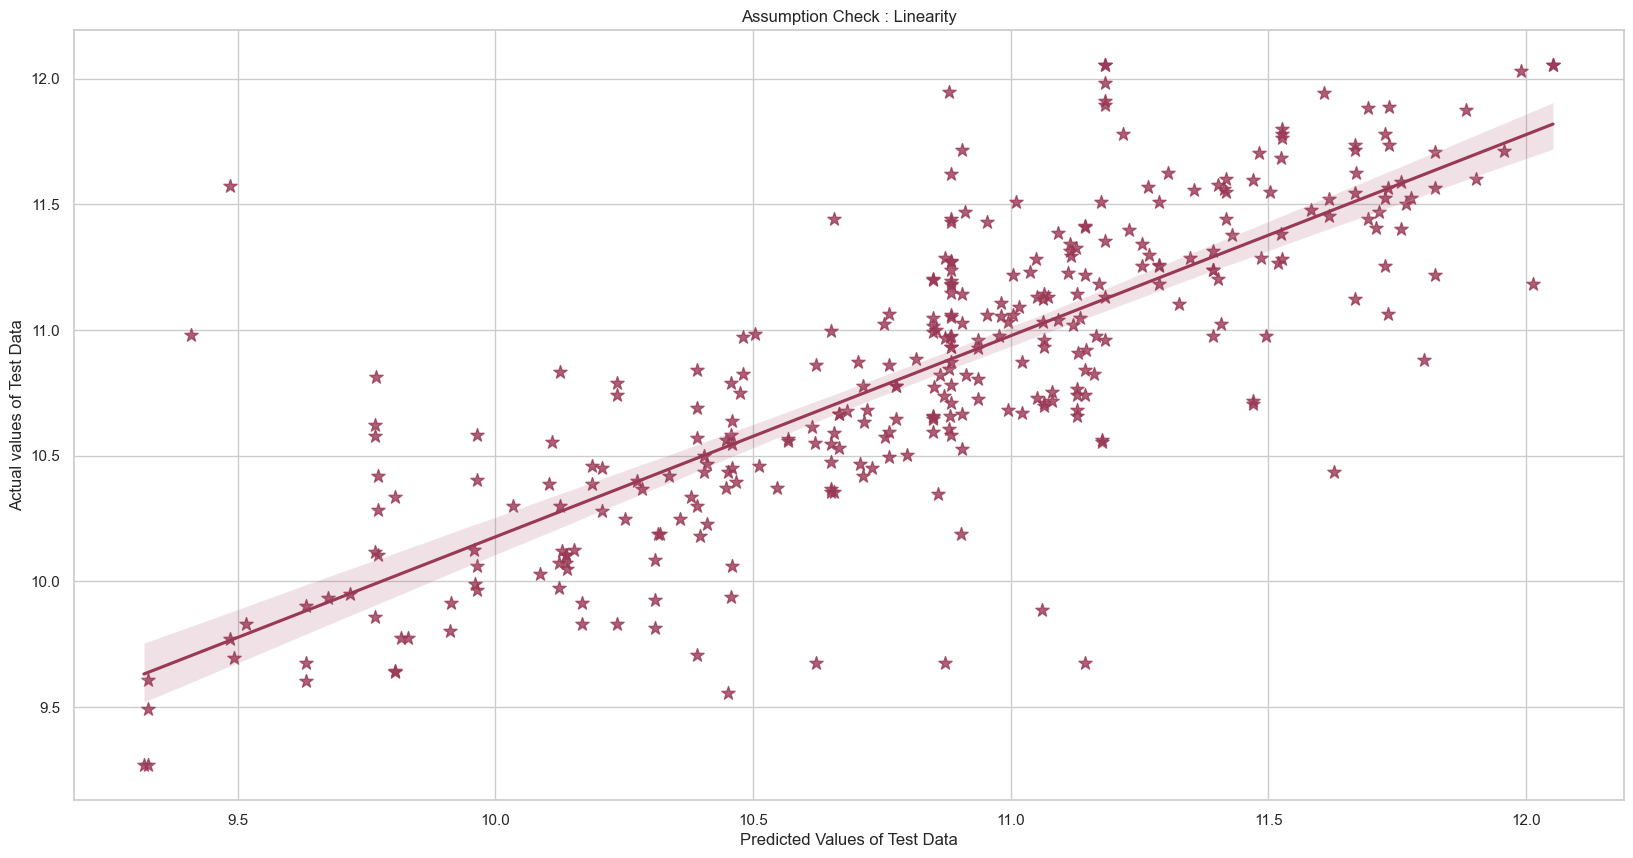

In [52]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_DT , y = Test_Y , color = '#993955' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Test Data" );
plt.ylabel ( "Actual values of Test Data" );
plt.title ( "Assumption Check : Linearity" );

### RANDOM FOREST REGRESSION 

In [53]:
Columns = list(Train_X.select_dtypes('object').columns)
Step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(drop='first'), Columns)], remainder='passthrough')
RF = RandomForestRegressor()
Parameters = {'n_estimators': [100, 200, 1000], 
              'max_depth': [10, 15, 20], 
              'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"]}
Step2 = GridSearchCV(estimator=RF, param_grid=Parameters, cv=5)
Pipeline_RF = Pipeline([('step1', Step1), ('step2', Step2)])
Pipeline_RF.fit(Train_X, Train_Y)
Parameters = Step2.best_params_
Step3 = RandomForestRegressor(**Parameters)
Pipeline_RF = Pipeline([('step1', Step1), ('step3', Step3)])
Pipeline_RF.fit(Train_X, Train_Y)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3',
                 RandomForestRegressor(criterion='absolute_error', max_depth=15,
                                       n_estimators=1000))])

In [54]:
Y_RF = Pipeline_RF.predict ( Test_X )
R2_RF = r2_score ( Test_Y , Y_RF ) * 100
N = Train_X.shape[0] 
P = Train_X.shape[1]
print ( "Nilai R2 atau Koefisien Determinasi adalah : " , R2_RF )
Adjusted_R2_RF = 1 - ( ( 1 - R2_RF ) * ( N - 1 ) / ( N - 1 - P ) )
MSE_RF = mean_squared_error ( Test_Y , Y_RF )
RMSE_RF = np.sqrt ( MSE_RF )
MAPE_RF = mean_absolute_percentage_error ( Test_Y , Y_RF ) * 100
MAE_RF = mean_absolute_error ( Test_Y , Y_RF )
print ( "\nNilai R² yang Disesuaikan adalah : " , Adjusted_R2_RF )

Nilai R2 atau Koefisien Determinasi adalah :  81.7439773462029

Nilai R² yang Disesuaikan adalah :  82.4954724817932


In [55]:
RF_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] ,         
           'Values' : [ R2_RF , Adjusted_R2_RF , MSE_RF , RMSE_RF , MAPE_RF , MAE_RF ] }
RF_Performance_Metrics = pd.DataFrame ( RF_PM )
RF_Performance_Metrics

Performance Metric     Values
0                 R2  81.743977
1        Adjusted_R2  82.495472
2                MSE   0.064636
3               RMSE   0.254236
4               MAPE   1.810082
5                MAE   0.195169

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

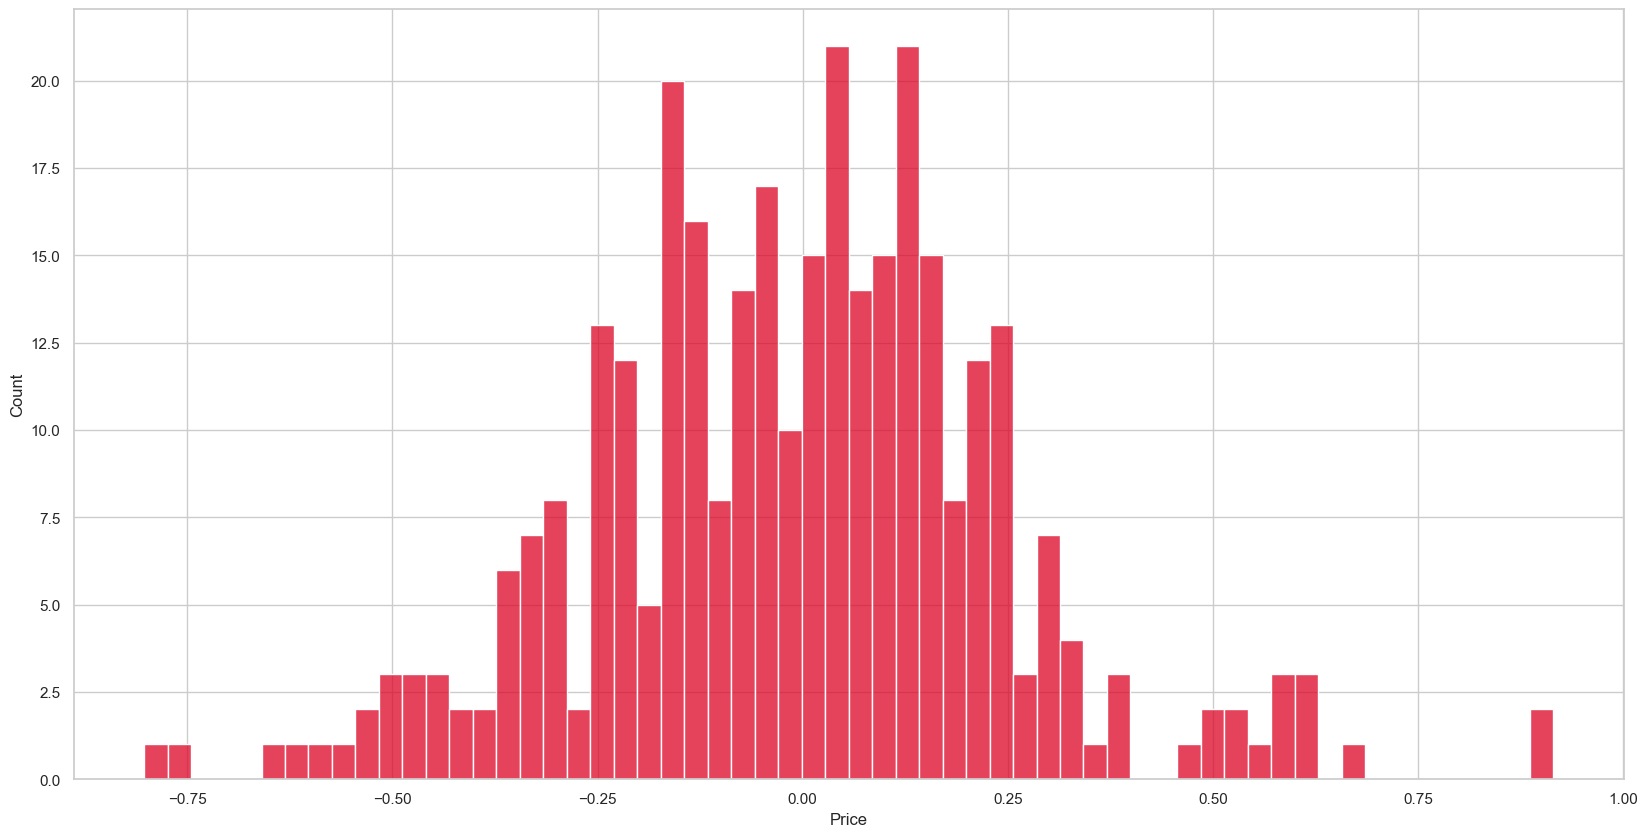

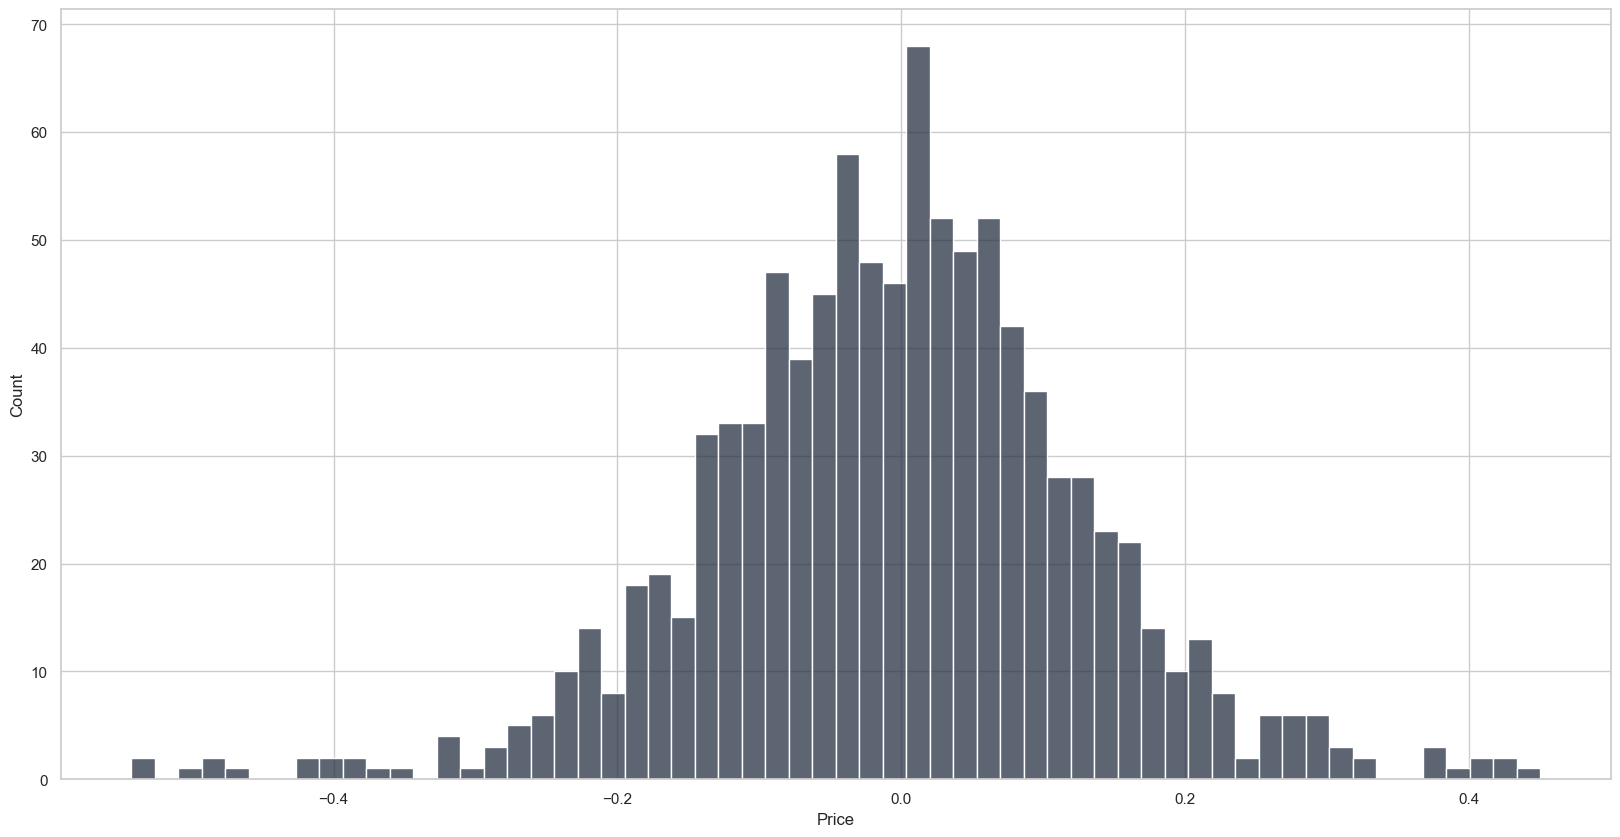

In [56]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_RF - Test_Y ) , bins = 60 , color = '#DD0426' )
Y_Train_RF = Pipeline_RF.predict ( Train_X )
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_Train_RF - Train_Y ) , bins = 60 , color = '#273043' );

In [57]:
Error_Train = Train_Y - Y_Train_RF 
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Train.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  0.18

Nilai kurtosis dari data latih adalah :  4.32


In [58]:
Error_Test = Test_Y - Y_RF 
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Test.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  -0.15

Nilai kurtosis dari data latih adalah :  4.02


##### HOMOSCEDASTICITY

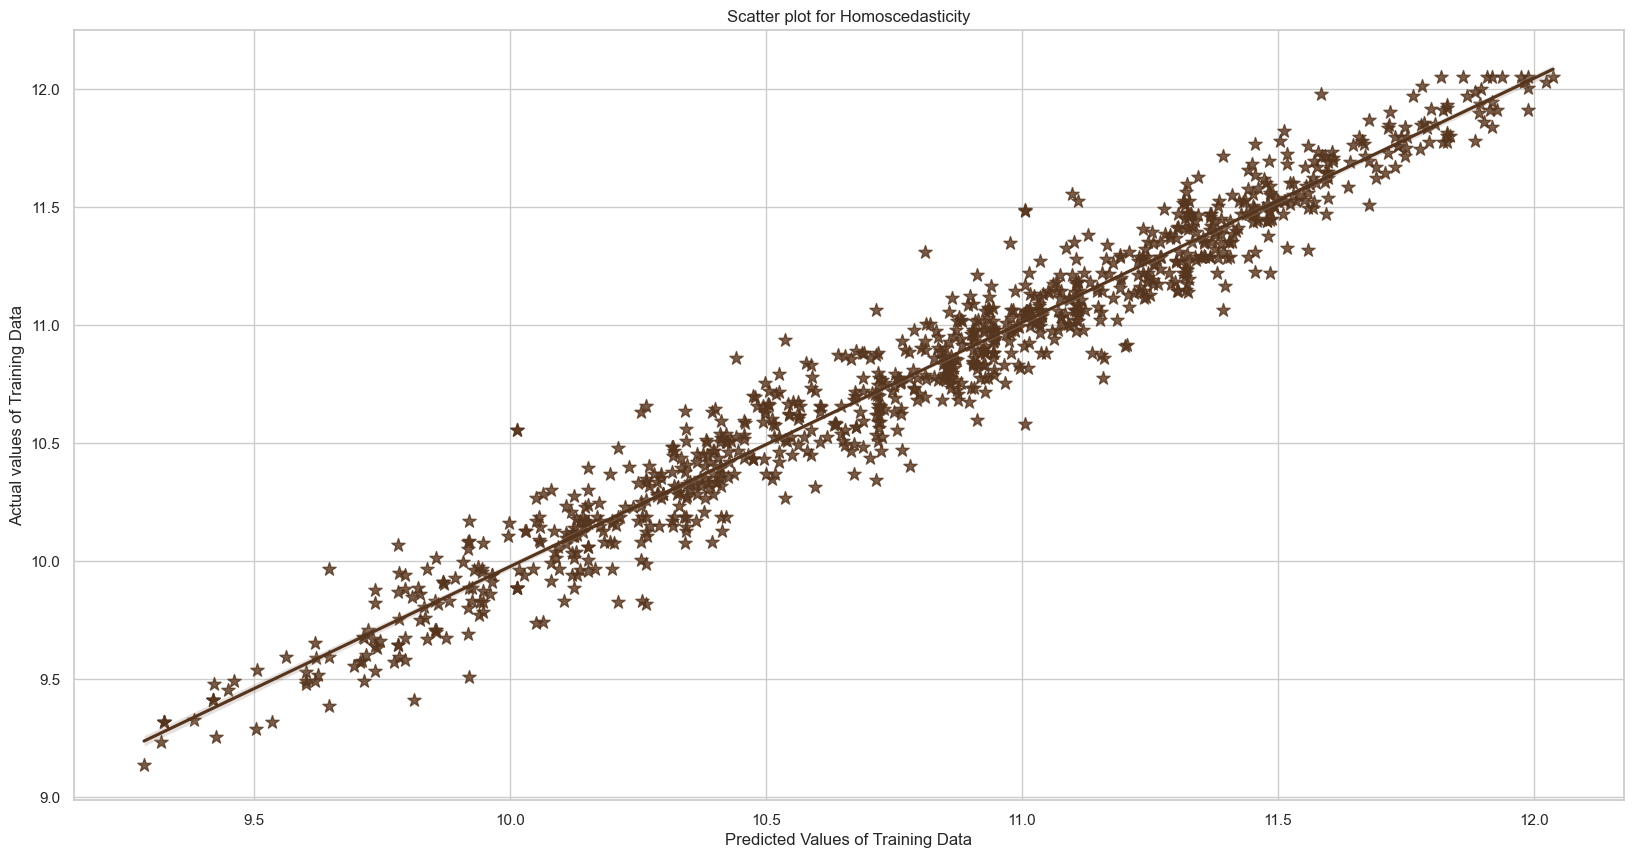

In [59]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_Train_RF , y = Train_Y , color = '#56351E' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Training Data" );
plt.ylabel ( "Actual values of Training Data" );
plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

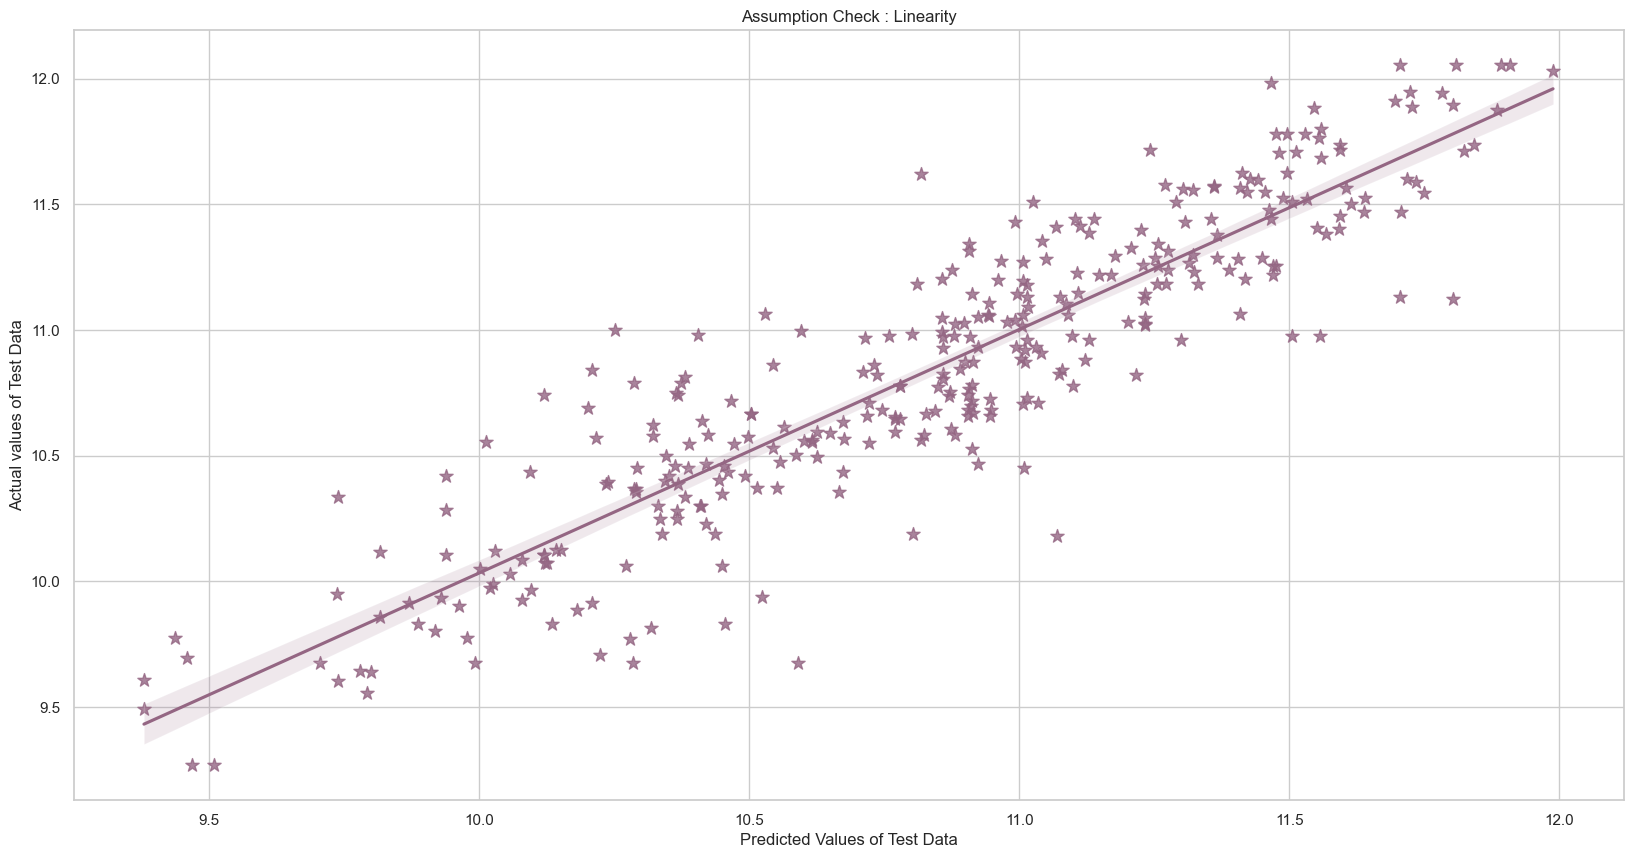

In [60]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_RF , y = Test_Y , color = '#946683' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Test Data" );
plt.ylabel ( "Actual values of Test Data" );
plt.title ( "Assumption Check : Linearity" );

### ADABOOST REGRESSOR

In [61]:
Columns = list(Train_X.select_dtypes('object').columns)
Step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(drop='first'), Columns)], remainder='passthrough')
RF = RandomForestRegressor()
AB = AdaBoostRegressor()
Parameters = {'n_estimators': [50, 100, 200], 
              'learning_rate': [0.1, 0.01, 1], 'estimator': [RF]}
Step2 = GridSearchCV(estimator=AB, param_grid=Parameters, cv=5)
Pipeline_AB = Pipeline([('step1', Step1), ('step2', Step2)])
Pipeline_AB.fit(Train_X, Train_Y)
Parameters = Step2.best_params_
Step3 = AdaBoostRegressor(**Parameters)
Pipeline_AB = Pipeline([('step1', Step1), ('step3', Step3)])
Pipeline_AB.fit(Train_X, Train_Y)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3',
                 AdaBoostRegressor(estimator=RandomForestRegressor(),
                                   learning_rate=0.1, n_estimators=200))])

In [62]:
Y_AB = Pipeline_AB.predict ( Test_X )
R2_AB = r2_score ( Test_Y , Y_AB ) * 100
N = Train_X.shape[0] 
P = Train_X.shape[1]
print ( "Nilai R2 atau Koefisien Determinasi adalah : " , R2_AB )
Adjusted_R2_AB = 1 - ( ( 1 - R2_AB ) * ( N - 1 ) / ( N - 1 - P ) )
MSE_AB = mean_squared_error ( Test_Y , Y_AB )
RMSE_AB = np.sqrt ( MSE_AB )
MAPE_AB = mean_absolute_percentage_error ( Test_Y , Y_AB ) * 100
MAE_AB = mean_absolute_error ( Test_Y , Y_AB )
print ( "\nNilai R2 yang Disesuaikan adalah: " , Adjusted_R2_AB )

Nilai R2 atau Koefisien Determinasi adalah :  81.64888385263917

Nilai R2 yang Disesuaikan adalah:  82.3994939402025


In [63]:
AB_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] ,         
           'Values' : [ R2_AB , Adjusted_R2_AB , MSE_AB , RMSE_AB , MAPE_AB , MAE_AB ] }
AB_Performance_Metrics = pd.DataFrame ( AB_PM )
AB_Performance_Metrics

Performance Metric     Values
0                 R2  81.648884
1        Adjusted_R2  82.399494
2                MSE   0.064973
3               RMSE   0.254898
4               MAPE   1.833566
5                MAE   0.197642

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

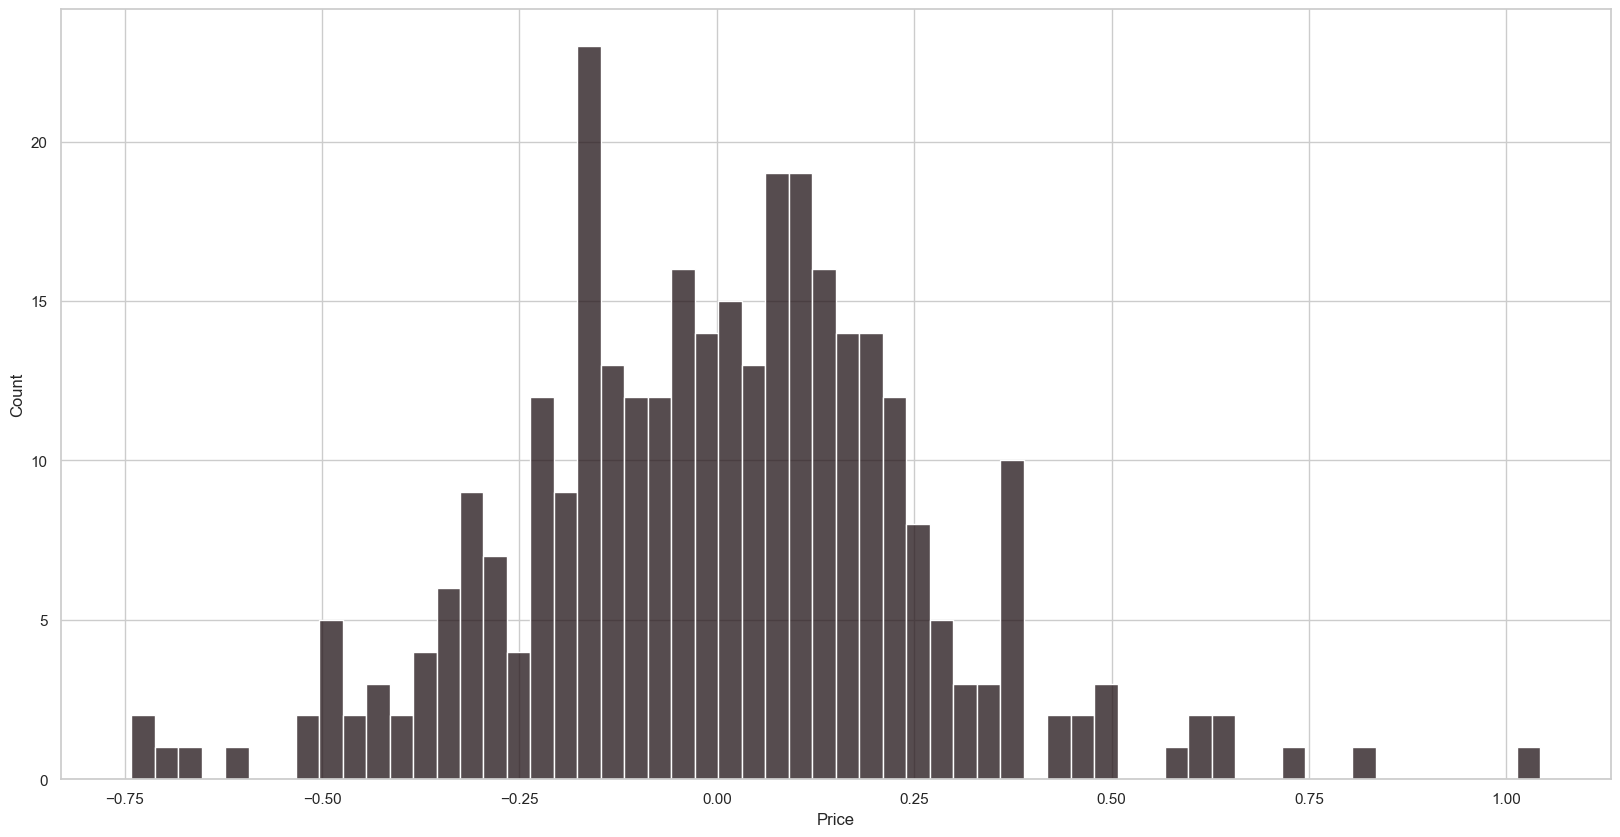

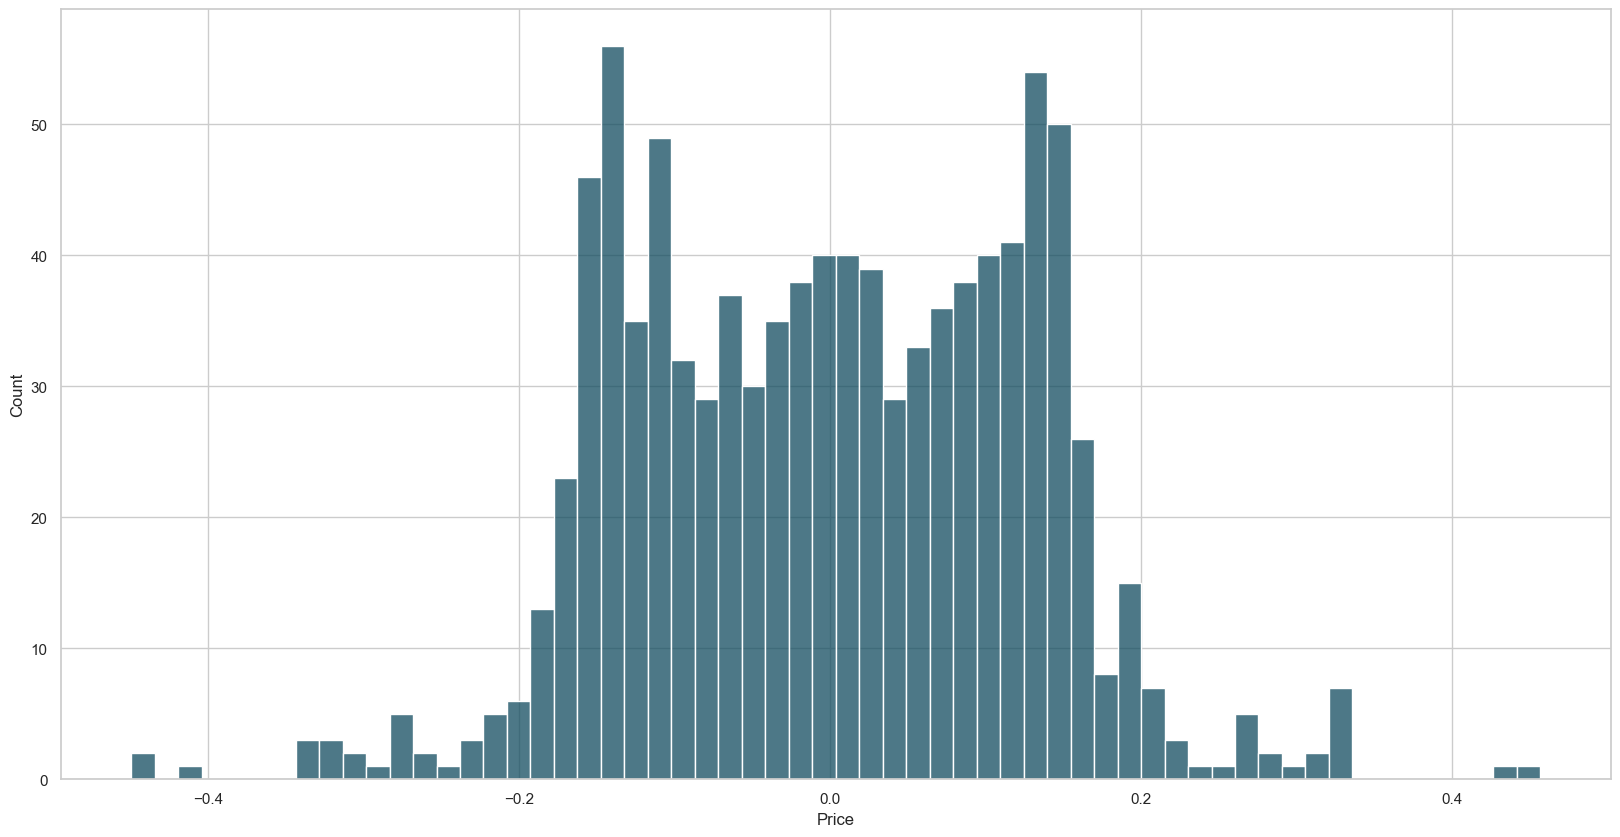

In [64]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_AB - Test_Y ) , bins = 60 , color = '#1E1014' )
Y_Train_AB = Pipeline_AB.predict ( Train_X )
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_Train_AB - Train_Y ) , bins = 60 , color = '#114B5F' );

In [65]:
Error_Train = Train_Y - Y_Train_AB
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Train.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  0.02

Nilai kurtosis dari data latih adalah :  2.96


In [66]:
Error_Test = Test_Y - Y_AB
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Test.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  -0.17

Nilai kurtosis dari data latih adalah :  4.11


##### HOMOSCEDASTICITY

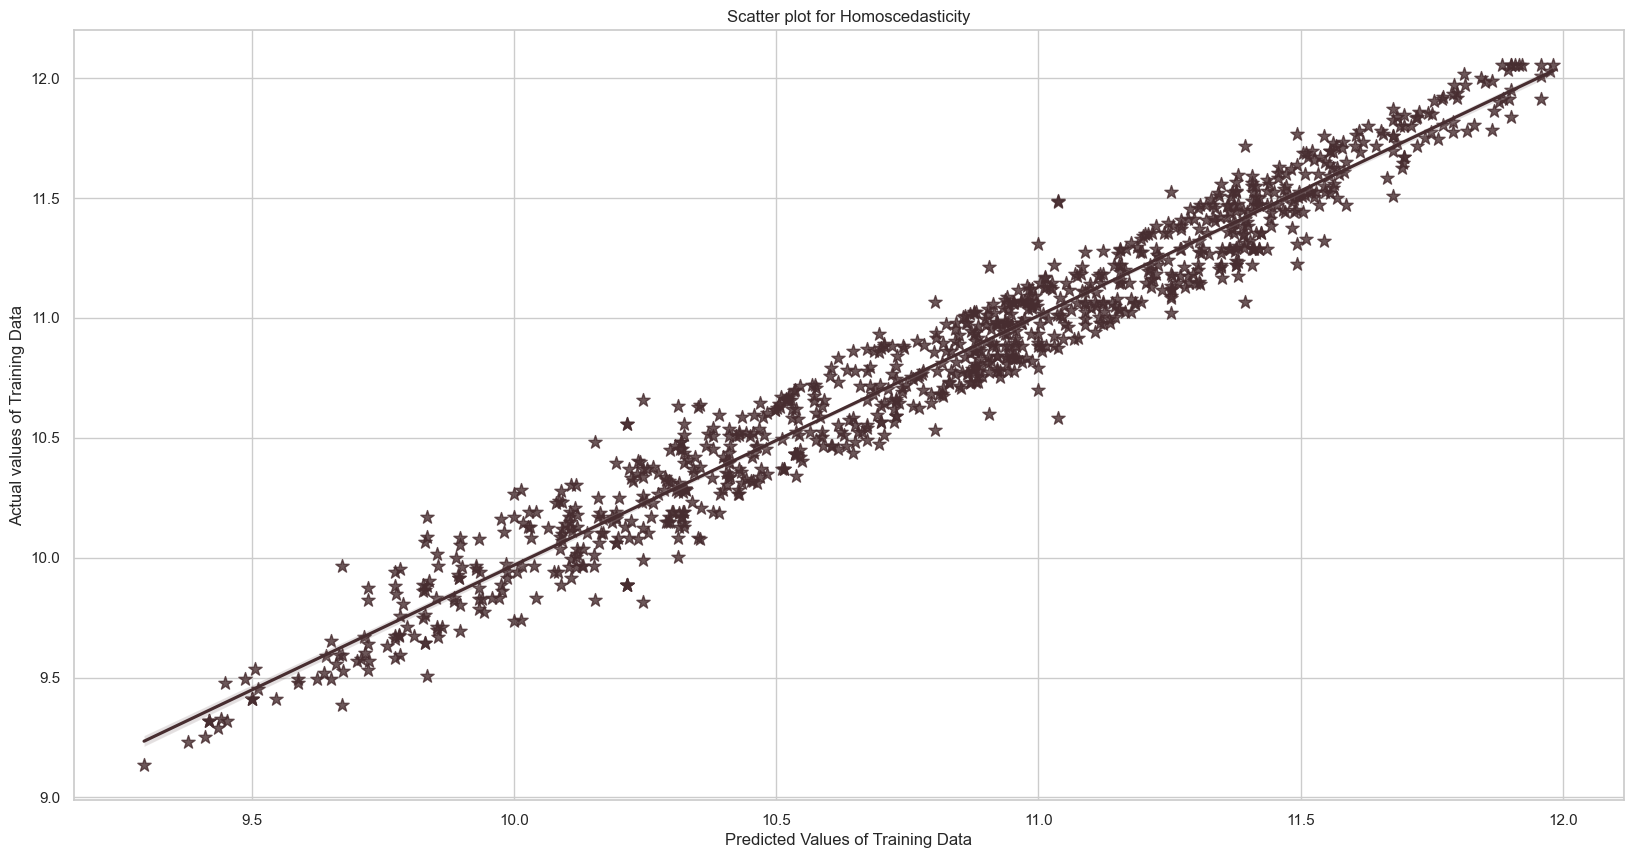

In [67]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_Train_AB , y = Train_Y , color = '#472D30' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Training Data" );
plt.ylabel ( "Actual values of Training Data" );
plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

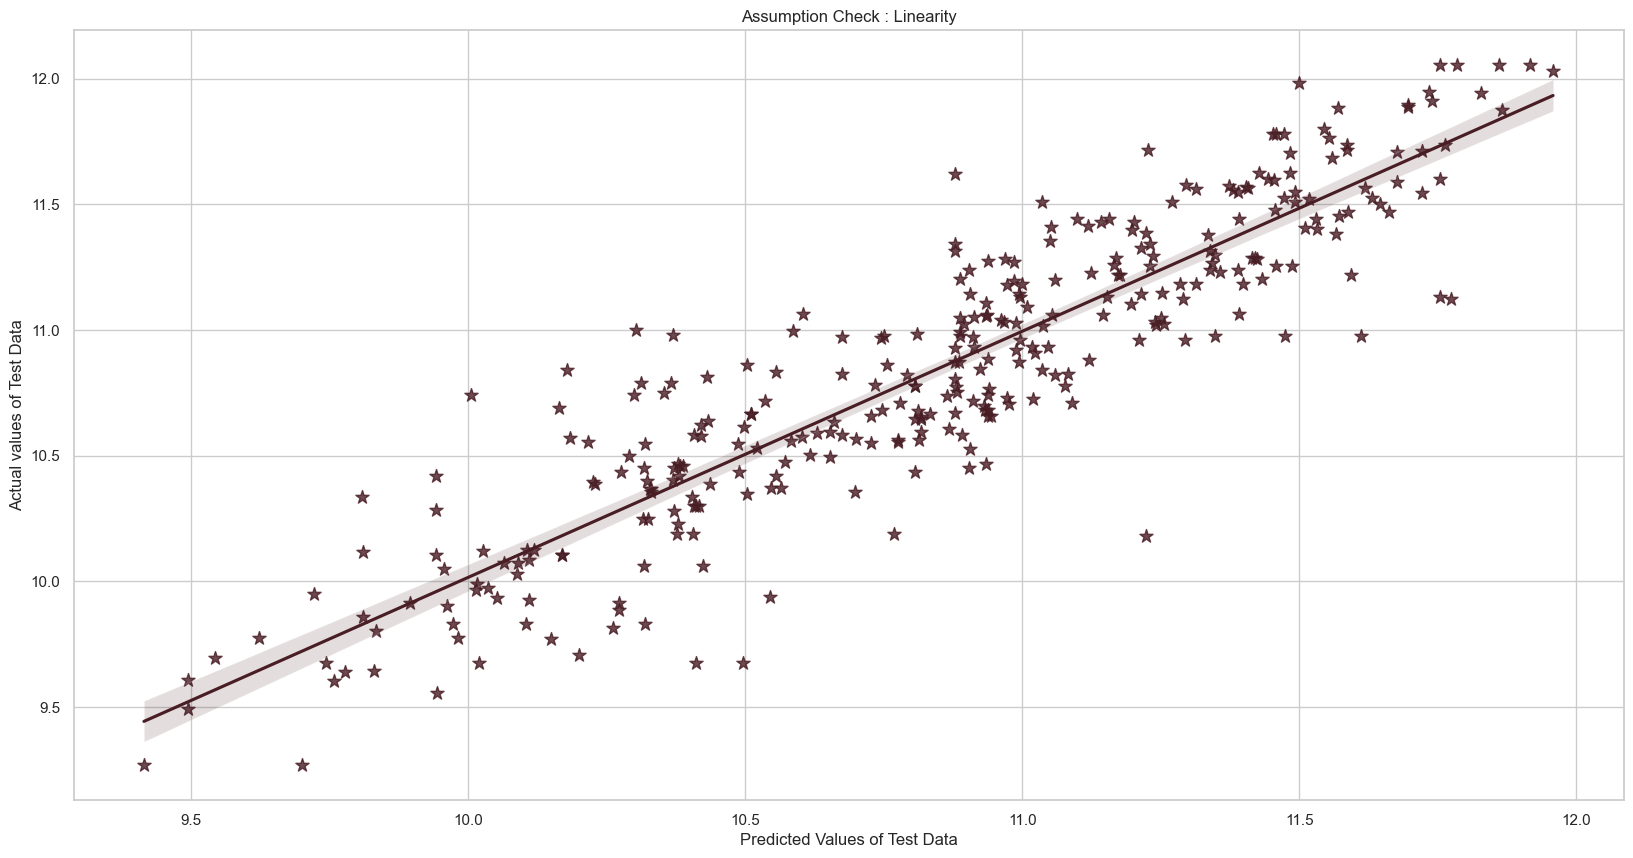

In [68]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_AB , y = Test_Y , color = '#481D24' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Test Data" );
plt.ylabel ( "Actual values of Test Data" );
plt.title ( "Assumption Check : Linearity" );

### GRADIENT BOOSTING

In [69]:
GB = GradientBoostingRegressor ( )
Parameters = { 'n_estimators' : [ 50 , 100 , 200 ] , 'learning_rate' : [ 0.1 , 0.01, 1 ] , 
              'loss' : [ 'squared_error', 'absolute_error', 'huber', 'quantile' ] }
Step2 = GridSearchCV ( estimator = GB , param_grid = Parameters , cv = 5 )
Pipeline_GB = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )
Pipeline_GB.fit ( Train_X , Train_Y )
Parameters = Step2.best_params_
Step3 = GradientBoostingRegressor ( **Parameters )
Pipeline_GB = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )
Pipeline_GB.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3', GradientBoostingRegressor(n_estimators=200))])

In [70]:
Y_GB = Pipeline_GB.predict ( Test_X )
R2_GB = r2_score ( Test_Y , Y_GB ) * 100
print ( "Nilai R² atau Koefisien Determinasi adalah : " , R2_GB )
Adjusted_R2_GB = 1 - ( ( 1 - R2_GB ) * ( N - 1 ) / ( N - 1 - P ) )
MSE_GB = mean_squared_error ( Test_Y , Y_GB )
RMSE_GB = np.sqrt ( MSE_GB )
MAPE_GB = mean_absolute_percentage_error ( Test_Y , Y_GB ) * 100
MAE_GB = mean_absolute_error ( Test_Y , Y_GB )
print ( "\nNilai R² yang Disesuaikan adalah : " , Adjusted_R2_GB )

Nilai R² atau Koefisien Determinasi adalah :  81.85565899931217

Nilai R² yang Disesuaikan adalah :  82.60819357117754


In [71]:
GB_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] ,         
           'Values' : [ R2_GB , Adjusted_R2_GB , MSE_GB , RMSE_GB , MAPE_GB , MAE_GB ] }
GB_Performance_Metrics = pd.DataFrame ( GB_PM )
GB_Performance_Metrics

Performance Metric     Values
0                 R2  81.855659
1        Adjusted_R2  82.608194
2                MSE   0.064241
3               RMSE   0.253457
4               MAPE   1.796782
5                MAE   0.194063

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

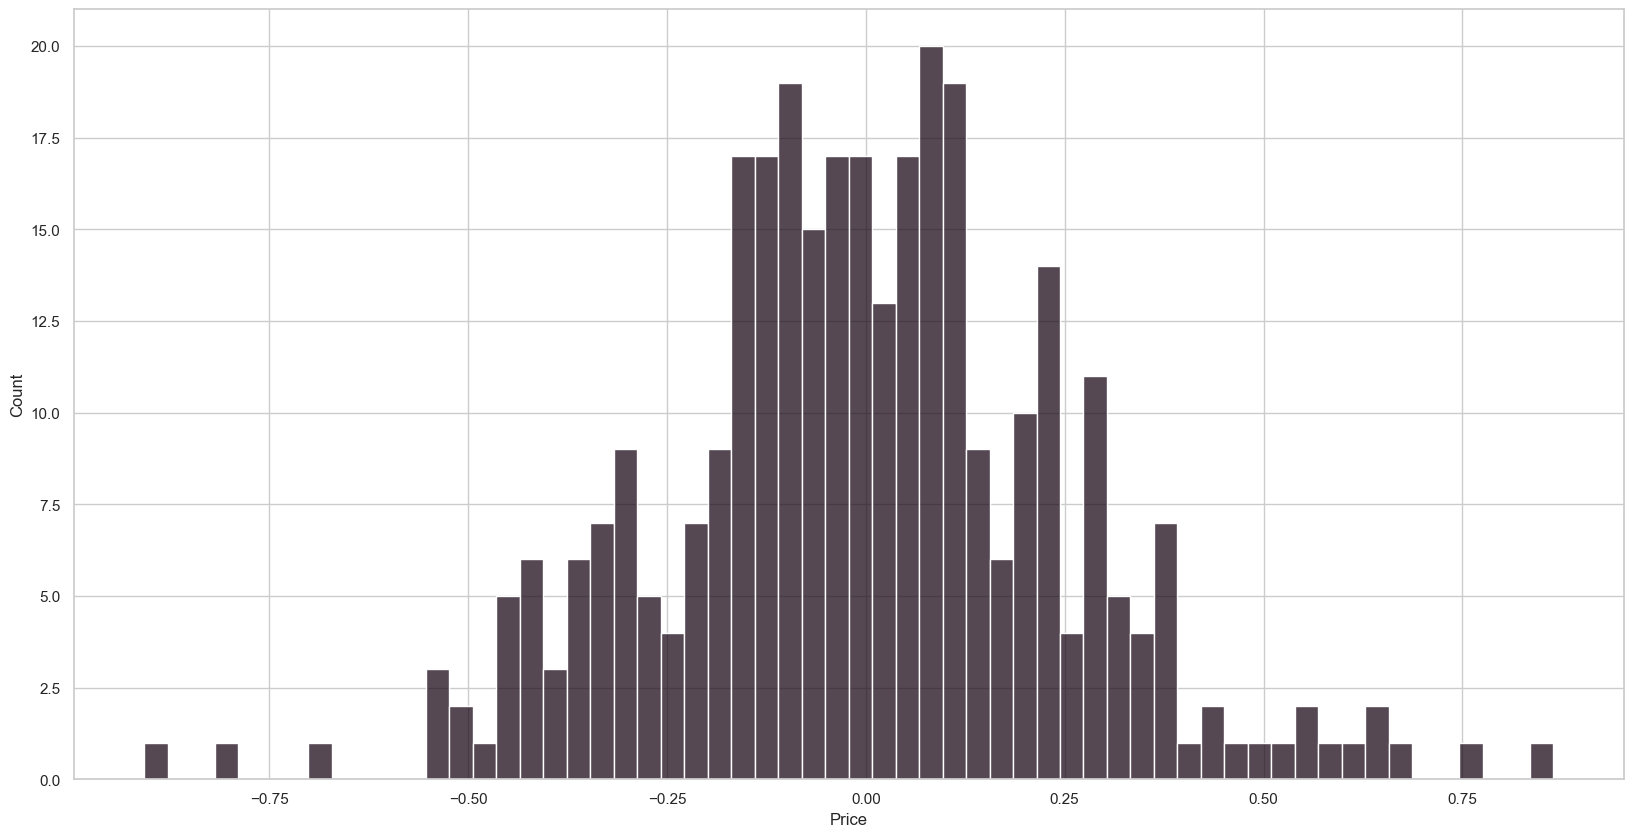

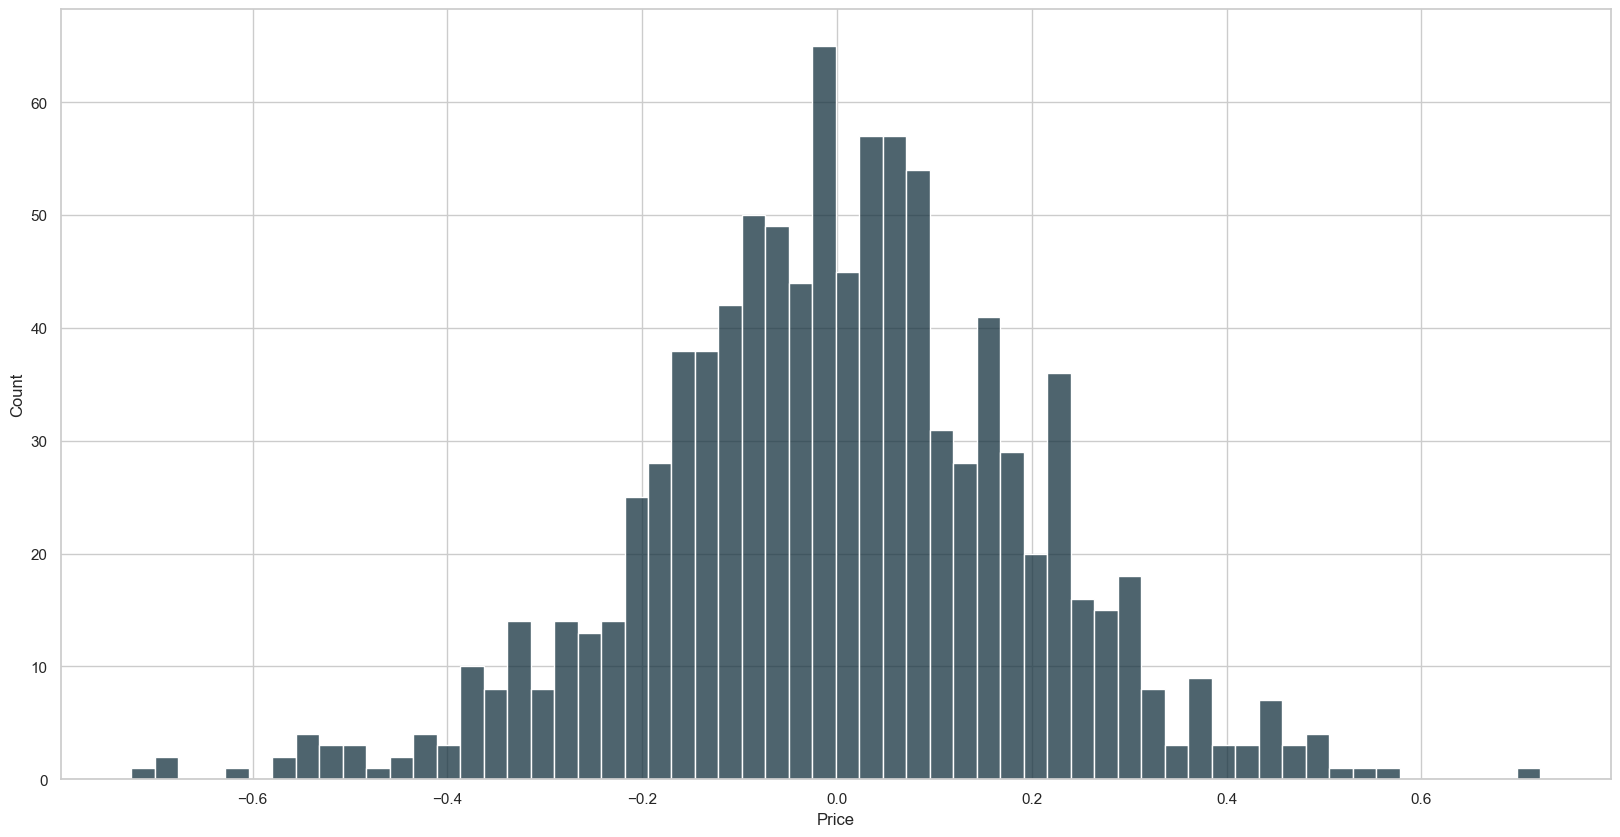

In [72]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_GB - Test_Y ) , bins = 60 , color = '#1C0B19' )
Y_Train_GB = Pipeline_GB.predict ( Train_X )
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_Train_GB - Train_Y ) , bins = 60 , color = '#13303D' );

In [73]:
Error_Train = Train_Y - Y_Train_GB
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Train.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  0.16

Nilai kurtosis dari data latih adalah :  3.72


In [74]:
Error_Test = Test_Y - Y_GB
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Test.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  -0.05

Nilai kurtosis dari data latih adalah :  3.89


##### HOMOSCEDASTICITY

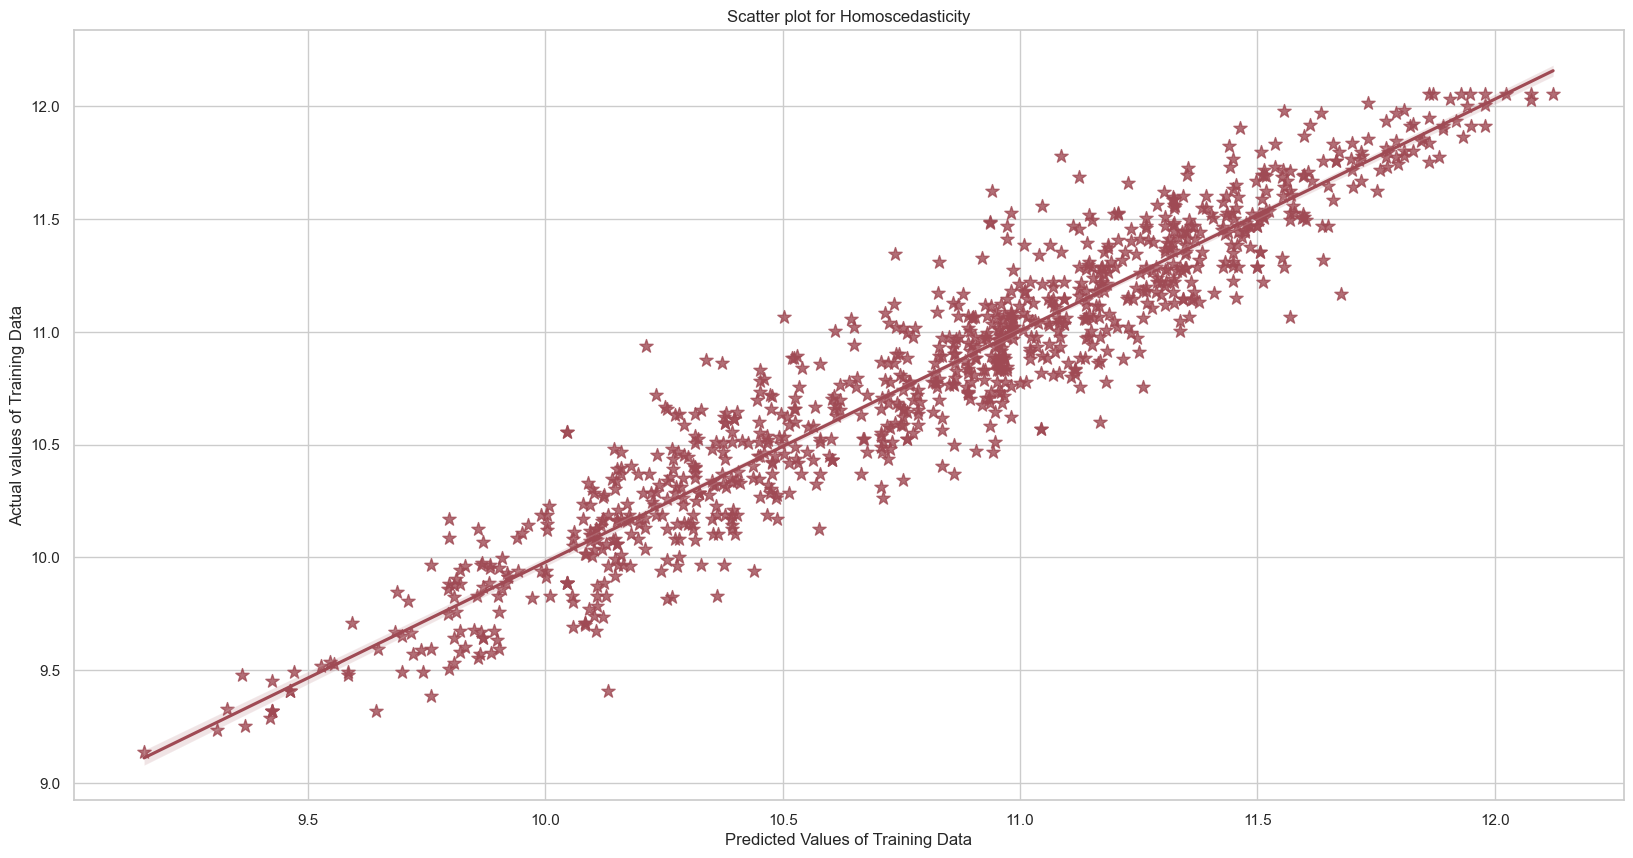

In [75]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_Train_GB , y = Train_Y , color = '#9F4A54' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Training Data" );
plt.ylabel ( "Actual values of Training Data" );
plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

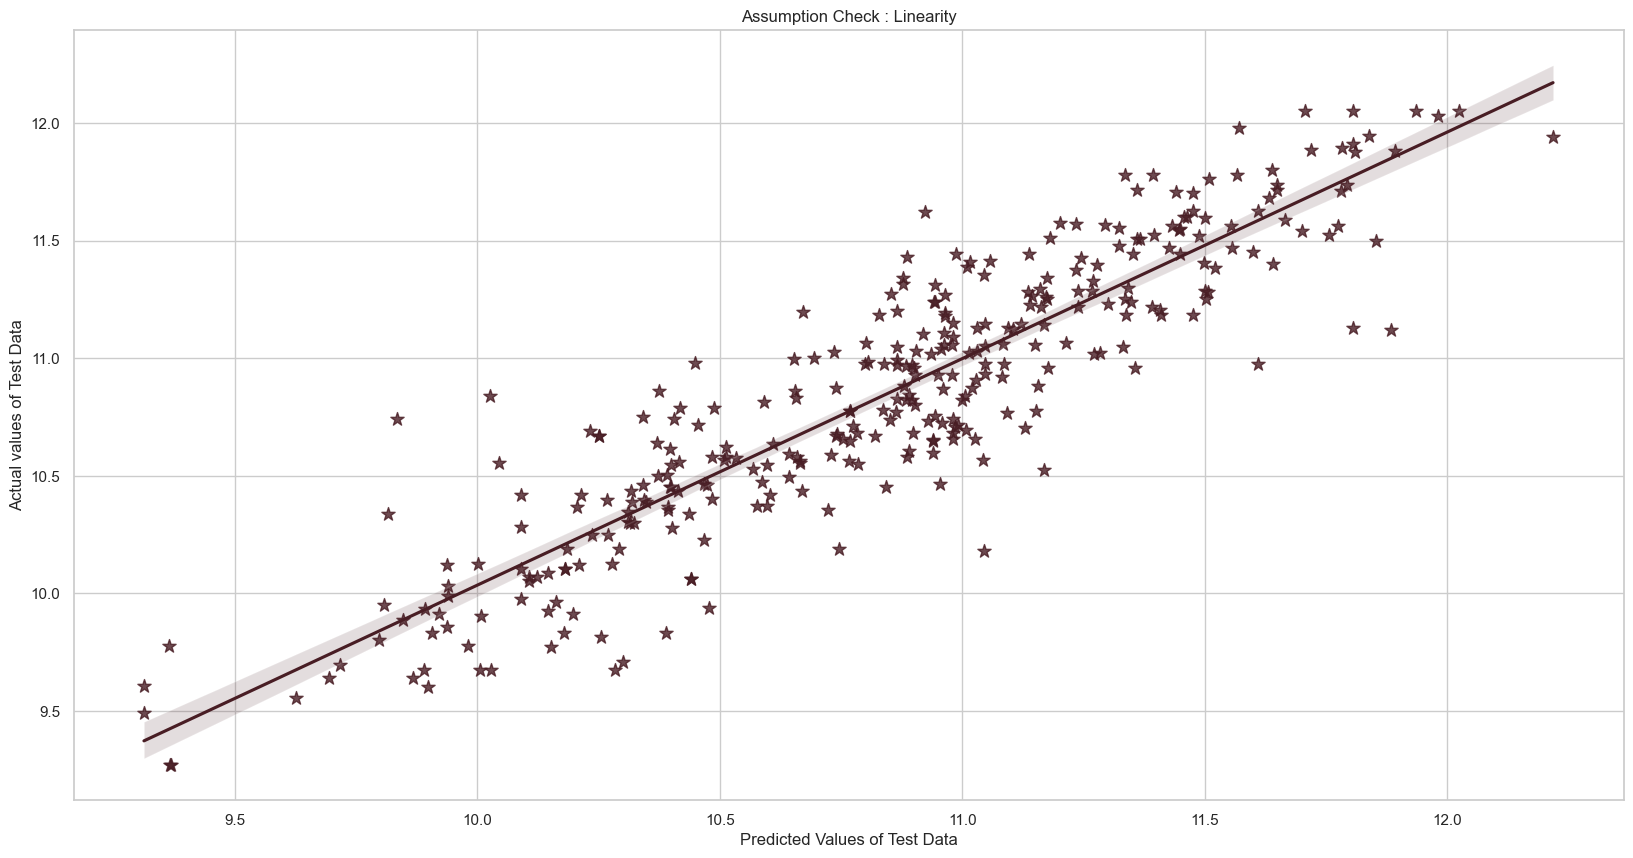

In [76]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_GB , y = Test_Y , color = '#481D24' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Test Data" );
plt.ylabel ( "Actual values of Test Data" );
plt.title ( "Assumption Check : Linearity" );

### EXTREME GRADIENT BOOSTING

In [77]:
XGB = XGBRFRegressor ( )
Parameters = { 'learning_rate' : [ 0.1 , 0.01, 1 ] , 'max_depth' : [ 10 , 15 , 20 ] }
Step2 = GridSearchCV ( estimator = XGB , param_grid = Parameters , cv = 5 )
Pipeline_XGB = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )
Pipeline_XGB.fit ( Train_X , Train_Y )
Parameters = Step2.best_params_
Step3 = XGBRFRegressor ( **Parameters )
Pipeline_XGB = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )
Pipeline_XGB.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3',
                 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bytree=None,
                                device=None, early_stopping_rounds=None,
                                enable_categoric...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=1,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=10, max_leaves=None,
                                min_child_weight=None, missing=nan,
                                monotone_constraints=None, multi_strategy=None,
                                n_estimators=None, n_jobs=None,
                                num_parallel_tree=None,
                                objective='reg:squarederror', random_state=None, ...))])

In [78]:
Y_XGB = Pipeline_XGB.predict ( Test_X )
R2_XGB = r2_score ( Test_Y , Y_XGB ) * 100
print ( "Nilai R² atau Koefisien Determinasi adalah : " , R2_XGB )
Adjusted_R2_XGB = 1 - ( ( 1 - R2_XGB ) * ( N - 1 ) / ( N - 1 - P ) )
MSE_XGB = mean_squared_error ( Test_Y , Y_XGB )
RMSE_XGB = np.sqrt ( MSE_XGB )
MAPE_XGB = mean_absolute_percentage_error ( Test_Y , Y_XGB ) * 100
MAE_XGB = mean_absolute_error ( Test_Y , Y_XGB )
print ( "\nNilai R² yang Disesuaikan adalah : " , Adjusted_R2_XGB )

Nilai R² atau Koefisien Determinasi adalah :  78.35340515851038

Nilai R² yang Disesuaikan adalah :  79.07334377942723


In [79]:
XGB_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] ,   
           'Values' : [ R2_XGB , Adjusted_R2_XGB , MSE_XGB , RMSE_XGB , MAPE_XGB , MAE_XGB ] }
XGB_Performance_Metrics = pd.DataFrame ( XGB_PM )
XGB_Performance_Metrics

Performance Metric     Values
0                 R2  78.353405
1        Adjusted_R2  79.073344
2                MSE   0.076641
3               RMSE   0.276840
4               MAPE   1.966545
5                MAE   0.211812

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

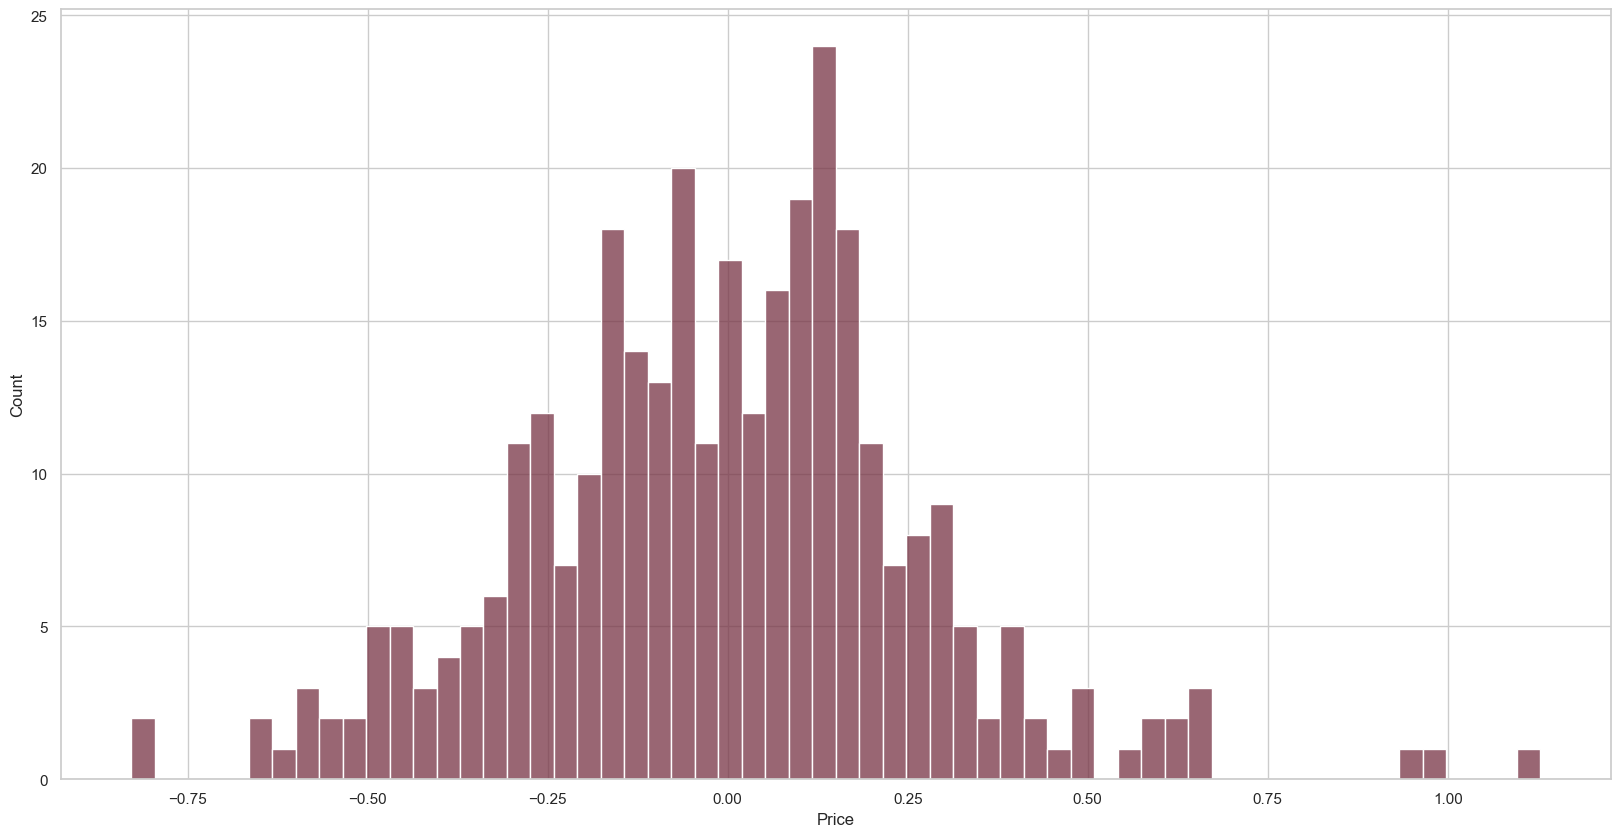

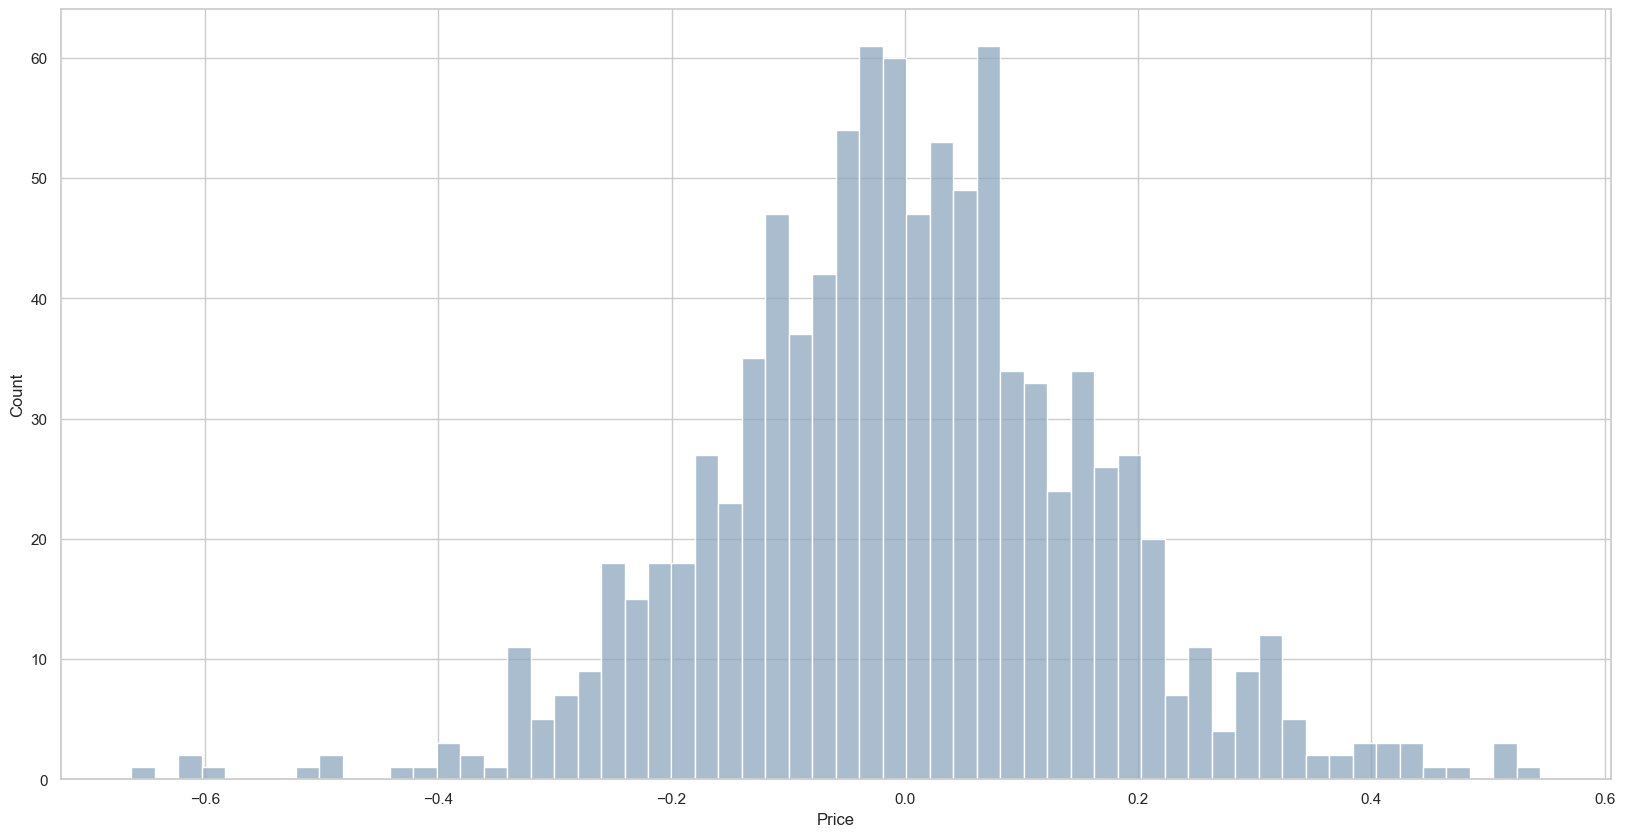

In [80]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_XGB - Test_Y ) , bins = 60 , color = '#773344' )
Y_Train_XGB = Pipeline_XGB.predict ( Train_X )
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( ( Y_Train_XGB - Train_Y ) , bins = 60 , color = '#8DA7BE' );

In [81]:
Error_Train = Train_Y - Y_Train_XGB
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Train.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  0.06

Nilai kurtosis dari data latih adalah :  4.03


In [82]:
Error_Test = Test_Y - Y_XGB
print ( "Nilai skewness dari data latih adalah : ", np.round ( Error_Test.skew ( ) , 2 ) )
print ( "\nNilai kurtosis dari data latih adalah : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

Nilai skewness dari data latih adalah :  -0.27

Nilai kurtosis dari data latih adalah :  4.38


##### HOMOSCEDASTICITY

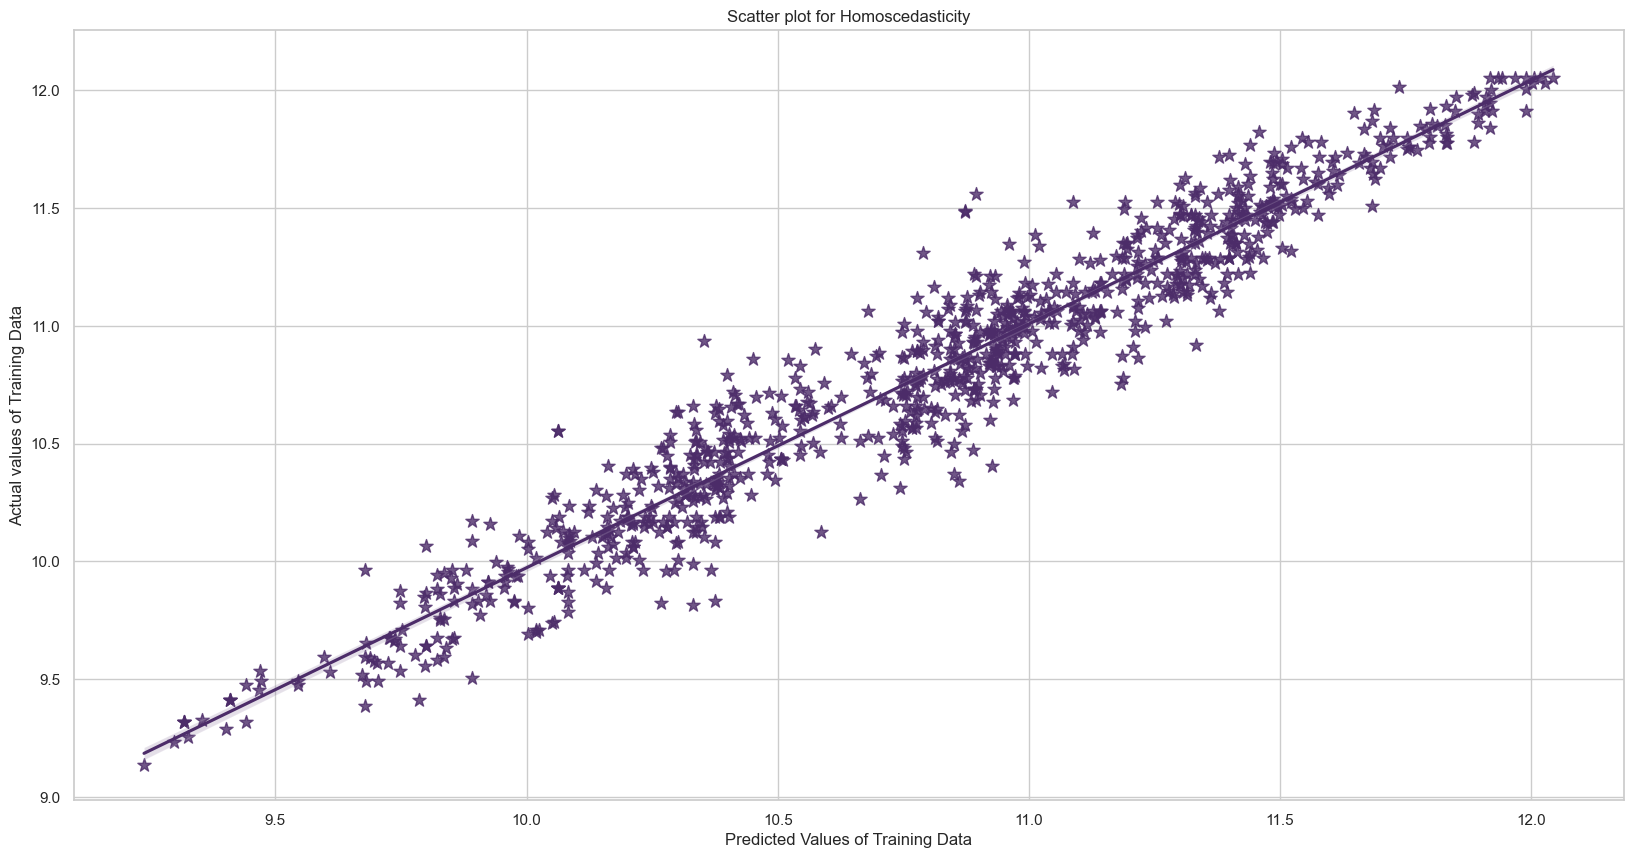

In [83]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_Train_XGB , y = Train_Y , color = '#4C2C69' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Training Data" );
plt.ylabel ( "Actual values of Training Data" );
plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

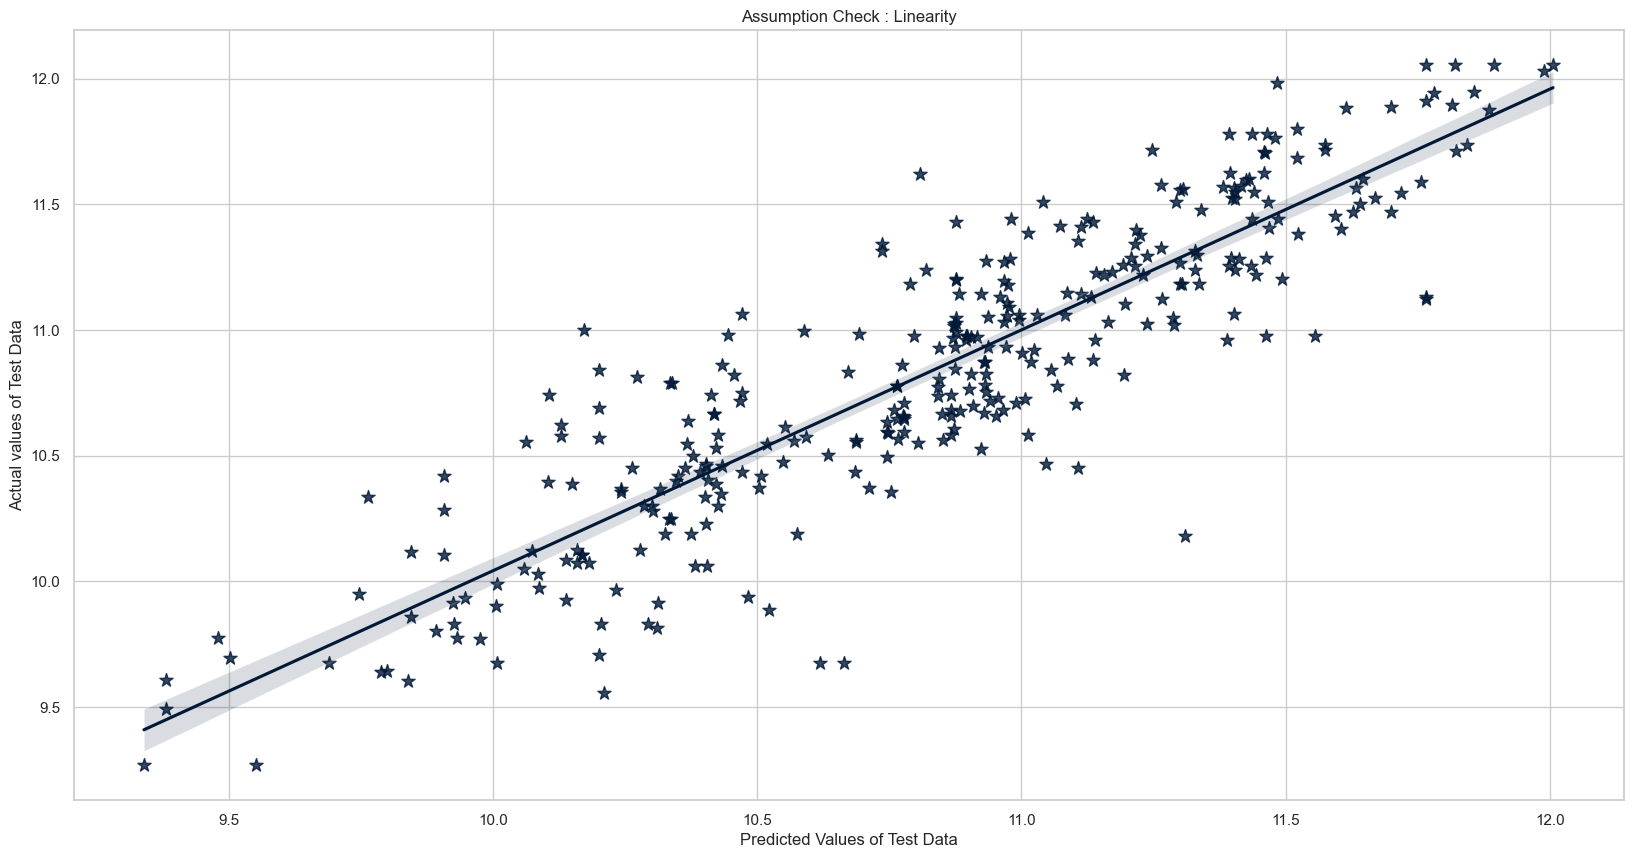

In [84]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Y_XGB , y = Test_Y , color = '#011936' , scatter_kws = { 's': 100 } , marker = '*' );
plt.xlabel ( "Predicted Values of Test Data" );
plt.ylabel ( "Actual values of Test Data" );
plt.title ( "Assumption Check : Linearity" );

## Diskusi Hasil Dan Kesimpulan

### GRAPHICAL COMPARISON

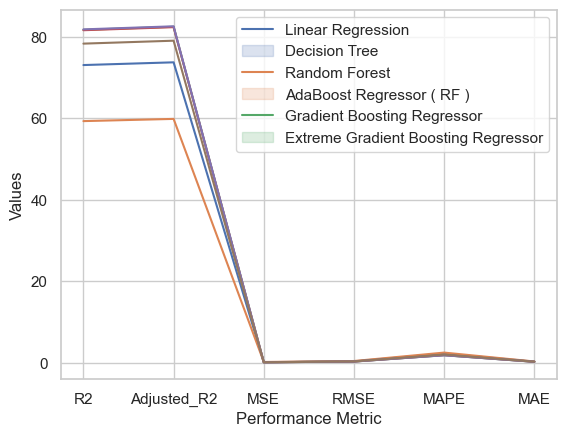

In [85]:
ax = plt.gca ( )
for i in [ LR_Performance_Metrics , DT_Performance_Metrics , RF_Performance_Metrics , AB_Performance_Metrics , GB_Performance_Metrics , XGB_Performance_Metrics ]:
    sns.lineplot ( x = 'Performance Metric'  , y =  'Values' , data = i , palette = 'twilight' , markers = '*' , ax = ax );
ax.legend ( [ 'Linear Regression' , 'Decision Tree' , 'Random Forest' , 'AdaBoost Regressor ( RF )' , 'Gradient Boosting Regressor' , 'Extreme Gradient Boosting Regressor' ] );

### COMPARISON OF R2

In [86]:
R2 = [ R2_LR , R2_R , R2_DT , R2_RF , R2_AB , R2_GB , R2_XGB ]
R2 = pd.DataFrame ( { 'R2_Names' : [ 'R2_LR' , 'R2_R' , 'R2_DT' , 'R2_RF' , 'R2_AB' , 'R2_GB' , 'R2_XGB' ] , 'R2_values' : R2 } )
R2.sort_values ( by = 'R2_values' , ascending = False )

R2_Names  R2_values
5    R2_GB  81.855659
3    R2_RF  81.743977
4    R2_AB  81.648884
6   R2_XGB  78.353405
0    R2_LR  73.089266
1     R2_R  72.453710
2    R2_DT  59.318221

#### BEST MODEL

Berdasarkan nilai R2 yang diperoleh dari model Random Forest, Gradient Boosting, dan AdaBoost Regressor, dapat disimpulkan bahwa ketiga model tersebut menunjukkan kinerja yang baik dalam menjelaskan variansi variabel target.

Model Random Forest mencapai nilai R2 tertinggi sebesar 82,00%, diikuti dengan model Gradient Boosting yang memperoleh nilai R2 sebesar 81,82%, dan model AdaBoost Regressor menunjukkan kinerja yang kuat dengan nilai R2 sebesar 81,64%.

Memprediksi sesuatu melalui penerapan pembelajaran mesin menggunakan algoritma Decision Tree memudahkan mahasiswa, terutama dalam menentukan pilihan spesifikasi laptop yang paling diinginkan untuk memenuhi kebutuhan mereka dan sesuai dengan daya beli mereka. Siswa tidak perlu lagi mencari berbagai sumber untuk menemukan spesifikasi laptop yang dibutuhkan, karena spesifikasi laptop dari hasil penerapan pembelajaran mesin telah menyediakan informasi yang diperlukan.

## PENGUJIAN

Dsini untuk implementasi/pengujiannya menggunakan Library Streamlit digunakan untuk membangun antarmuka WebApp. Streamlit adalah (library Python sumber terbuka) yang memudahkan untuk membuat dan berbagi aplikasi web khusus untuk pembelajaran mesin dan sains data. Hasil dengan kode backend ditunjukkan pada gambar berikut.
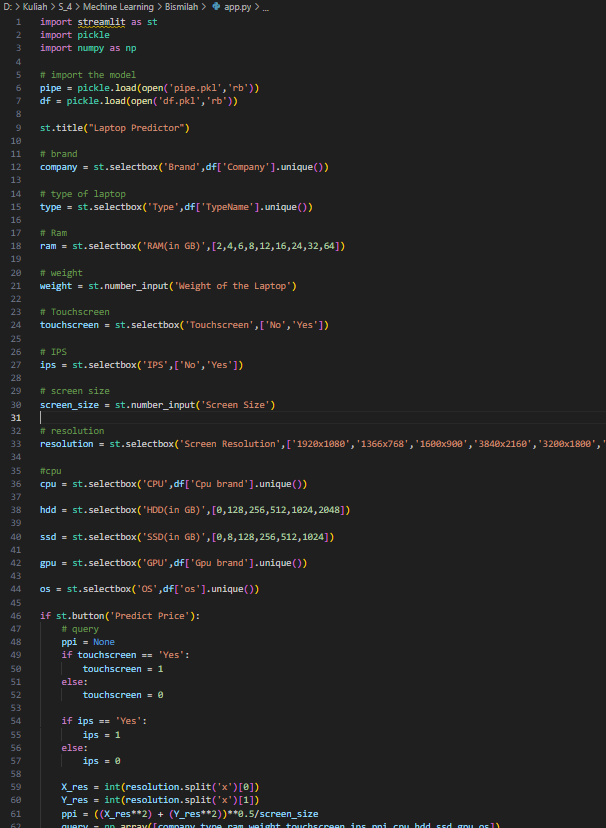